# Prediksi Cuaca dan Potensi Banjir di Kota Medan Menggunakan Metode CatBoost dan LSTM
Projek ini adalah penelitian yang dikerjakan oleh Filbert Leonardo (200416004) sebagai bagian dari persyaratan untuk menyelesaikan program studi dan mendapatkan gelar Sarjana Komputer di jurusan Sistem Informasi, Universitas Sari Mutiara Indonesia.

# A. Deskripsi Projek

## Latar Belakang

Kota Medan sering menghadapi tantangan besar terkait banjir, terutama selama musim hujan. Faktor-faktor seperti perubahan iklim global, kepadatan infrastruktur, dan sistem drainase yang buruk, meningkatkan kerentanan kota terhadap banjir. Perubahan iklim telah mengakibatkan cuaca yang lebih ekstrem dan tidak terduga, memperburuk situasi banjir di Medan. Selain itu, urbanisasi yang cepat tanpa perencanaan infrastruktur yang memadai telah memperburuk kondisi drainase, menyebabkan banjir lebih sering terjadi.

## Permasalahan

Kendala utama yang dihadapi Kota Medan adalah kurangnya sistem prediksi cuaca dan potensi banjir yang akurat dan andal. Tanpa sistem prediksi yang baik, penduduk dan pemerintah kota kesulitan dalam mempersiapkan dan merespons banjir dengan efektif. Sistem drainase yang ada sering kali tidak mampu menangani volume air hujan yang tinggi, dan infrastruktur yang ada tidak dirancang untuk mengatasi perubahan pola cuaca ekstrem yang disebabkan oleh perubahan iklim.

## Tujuan

Proyek ini bertujuan untuk mengembangkan model prediksi cuaca yang dapat mengidentifikasi pola cuaca yang berpotensi menyebabkan banjir. Dengan menggunakan teknologi Artificial Intelligence, khususnya metode CatBoost dan LSTM, model ini diharapkan mampu memberikan prediksi yang lebih akurat. Model ini kemudian akan diintegrasikan dengan dashboard interaktif yang menyediakan informasi prediksi cuaca dan potensi banjir kepada masyarakat dan pihak berwenang.

## Manfaat

Pengembangan sistem prediksi ini diharapkan memberikan beberapa manfaat, antara lain:

- **Peningkatan Kesiapsiagaan:** Masyarakat dan pemerintah kota dapat lebih siap menghadapi potensi banjir dengan informasi prediksi yang lebih akurat.
- **Pengurangan Risiko dan Kerugian:** Dengan adanya peringatan dini, langkah-langkah pencegahan dapat diambil lebih awal untuk mengurangi dampak banjir.
- **Pengelolaan Sumber Daya yang Lebih Baik:** Informasi prediksi cuaca yang akurat dapat membantu dalam perencanaan dan pengelolaan sumber daya kota, seperti penataan drainase dan infrastruktur.
- **Peningkatan Kesadaran Masyarakat:** Dashboard interaktif yang user-friendly dapat meningkatkan kesadaran dan pemahaman masyarakat mengenai risiko banjir dan cara-cara mitigasinya.


# B. Pengumpulan Dataset

Penelitian ini mengandalkan dua dataset utama yang mencakup periode dari Januari 2020 hingga Mei 2024:

1. **Dataset Cuaca**

   Dataset ini diperoleh dari Balai Besar Meteorologi, Klimatologi, dan Geofisika (BBMKG) Wilayah I Medan serta situs [Data Online BMKG](https://dataonline.bmkg.go.id/data_iklim). Dataset ini mencakup informasi harian mengenai berbagai parameter cuaca seperti suhu, curah hujan, kelembapan, kecepatan angin, dan tekanan udara. Data ini sangat penting untuk memprediksi pola cuaca yang dapat memicu terjadinya banjir.

2. **Dataset Bencana**

   Dataset ini diperoleh dari Badan Penanggulangan Bencana Daerah (BPBD) Kota Medan serta situs [Geoportal Data Bencana Indonesia BNPB](https://gis.bnpb.go.id/). Dataset ini mencakup informasi tentang bencana banjir yang pernah terjadi di Indonesia, termasuk Kota Medan. Informasi yang terkandung dalam dataset ini meliputi lokasi, tanggal kejadian, dan dampak dari setiap kejadian bencana, yang akan digunakan untuk mengidentifikasi korelasi antara kondisi cuaca dan kejadian banjir.

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import plotly.graph_objects as go

import calendar

# Mengabaikan semua peringatan
warnings.filterwarnings("ignore")

#untuk dapat melihat seluruh kolom dan baris
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset Cuaca
**Keterangan**:
- 8888: data tidak terukur
- 9999: Tidak Ada Data (tidak dilakukan pengukuran)
- Tn: Temperatur minimum	 (°C)
- Tx: Temperatur maksimum (°C)
- Tavg: Temperatur rata-rata (°C)
- RH_avg: Kelembapan rata-rata (%)
- RR: Curah hujan (mm)
- ss: Lamanya penyinaran matahari (jam)
- ddd_x: Arah angin saat kecepatan maksimum (°)
- ddd_car: Arah angin terbanyak (°)
- ff_x: Kecepatan angin maksimum (m/s)
- ff_avg: Kecepatan angin rata-rata (m/s)

In [ ]:
# Fungsi untuk membaca file CSV dan mengembalikan DataFrame
def read_csv(file_path):
    return pd.read_csv(file_path, sep=';')

# Fungsi untuk menggabungkan dua DataFrame
def merge_dataframes(df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12):
    return pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], ignore_index=True)

# List target kolom yang ingin digunakan
target_columns = ['Tanggal', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ddd_x', 'ddd_car', 'ff_x', 'ff_avg']

# List target kolom nurmerik yang ingin digunakan
numeric_columns = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ddd_x', 'ff_x', 'ff_avg']

### 2020

In [ ]:
# Ganti dengan nama file CSV yang ingin dibaca
df1 = read_csv('/content/drive/MyDrive/Skripsi/Dataset/2020/Jan2020.csv')
df2 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2020/Feb2020.csv")
df3 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2020/Mar2020.csv")
df4 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2020/Apr2020.csv")
df5 = read_csv('/content/drive/MyDrive/Skripsi/Dataset/2020/Mei2020.csv')
df6 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2020/Jun2020.csv")
df7 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2020/Jul2020.csv")
df8 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2020/Ags2020.csv")
df9 = read_csv('/content/drive/MyDrive/Skripsi/Dataset/2020/Sep2020.csv')
df10 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2020/Okt2020.csv")
df11 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2020/Nov2020.csv")
df12 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2020/Des2020.csv")

# Menggabungkan kedua DataFrame berdasarkan kolom target
df_2020 = merge_dataframes(df1, df2, df3, df4,
                           df5, df6, df7, df8,
                           df9, df10, df11, df12)

# Tampilkan DataFrame hasil penggabungan
df_2020

Tanggal    Tn    Tx  Tavg  RH_avg      RR   ss  ddd_x ddd_car  ff_x  \
0    01/01/2020  24.2  32.6  27.6      81     0.0  4.3    350      C      6   
1    02/01/2020  23.3  32.4  27.5      81     0.0  6.5    300      C      3   
2    03/01/2020  23.6  29.8  27.4      86  8888.0  3.0    300      W      5   
3    04/01/2020  24.1  29.4  26.0      90     3.5  0.5    270      C      3   
4    05/01/2020  23.0  32.1  27.0      85     1.7  0.2    290      C      3   
5    06/01/2020  20.2  31.2  27.0      83  8888.0  4.7    290      C      5   
6    07/01/2020  23.0  33.4  27.6      76     0.0  4.5    320      C      4   
7    08/01/2020  21.4  32.4  27.9      79     NaN  7.8    230      W      5   
8    09/01/2020  21.2  31.2  27.2      84     0.0  4.7     20      W      5   
9    10/01/2020  23.6  33.6  28.1      79     2.6  1.6    290      C      3   
10   11/01/2020  23.6  32.2  27.9      81     0.0  5.0    280      C      4   
11   12/01/2020  23.4  33.0  27.6      78     0.0  4.6    280      C      3   
12   13/01/2020  23.0  33.0  28.3      79     0.0  3.2     50      C      4   
13   14/01/2020  23.1  32.8  28.0      80     0.0  5.3     90      C      4   
14   15/01/2020  23.0  33.2  28.1      78     0.0  7.6    280      C      4   
15   16/01/2020  23.0  33.0  28.3      79     0.0  7.7     60      NE     4   
16   17/01/2020  24.0  32.4  27.9      81     NaN  5.8    350      C      5   
17   18/01/2020  23.8  32.6  27.8      82     0.0  3.6    290      C      4   
18   19/01/2020  24.0  33.8  27.9      87     0.0  5.7     50      C      5   
19   20/01/2020  23.4  33.4  28.0      85    20.1  5.0     20      C      5   
20   21/01/2020  24.2  31.6  27.2      84  8888.0  4.2     70      C      6   
21   22/01/2020  24.4  32.6  27.4      83  8888.0  3.6     50      C      6   
22   23/01/2020  22.8  32.0  27.7      80     3.0  4.3     50      C      4   
23   24/01/2020  22.8  33.4  28.2      83     0.0  5.0     30      C      3   
24   25/01/2020  23.8  34.2  29.1      76     0.0  4.4     80      C      4   
25   26/01/2020  24.0  33.0  28.6      79     0.0  6.4     20      C      3   
26   27/01/2020  25.6  34.2  27.6      82  8888.0  1.5     30      C      5   
27   28/01/2020  24.0  33.0  27.7      83     2.5  0.8    280      W      8   
28   29/01/2020  23.4  29.4  25.1      93    51.5  4.3    250      C      2   
29   30/01/2020  22.2  32.0  27.4      83     2.0  0.0    260      C      5   
30   31/01/2020  22.2  31.0  27.0      84     0.0  6.0    290      C      4   
31   01/02/2020  22.1  33.4  28.4      81  8888.0  0.3     70      E      6   
32   01/02/2020  22.1  33.4  28.4      81  8888.0  0.3     70      E      6   
33   02/02/2020  24.6  30.8  27.9      85     0.0  6.3    100      C      5   
34   03/02/2020  25.0  31.2  27.4      84     0.4  0.5    160      C      4   
35   04/02/2020  24.2  31.3  27.4      83     0.0  NaN    270      C      3   
36   05/02/2020  23.2  32.6  28.1      78     0.0  3.3    270      C      6   
37   06/02/2020  24.2  32.8  27.8      82     NaN  5.8     20      W      5   
38   07/02/2020  23.2  28.6  26.2      78  8888.0  2.7    280      W      4   
39   08/02/2020  23.2  32.0  27.7      79     0.0  0.2    280      C      2   
40   09/02/2020  23.2  32.6  27.9      76     0.0  0.5    310      C      3   
41   10/02/2020  23.2  32.3  28.1      82     0.0  7.8    310      C      3   
42   11/02/2020  24.2  33.6  28.0      83    23.0  3.8     20      C      4   
43   12/02/2020  24.6  32.0  27.2      89     0.8  3.2     50      C      3   
44   13/02/2020  24.6  33.4  28.0      86     7.8  2.0     40      C      5   
45   14/02/2020  25.0  32.8  28.4      84     3.3  5.3    270      C      3   
46   15/02/2020  25.0  29.6  25.8      92  8888.0  3.8    280      C      4   
47   16/02/2020  22.4  33.2  28.2      83    11.9  2.3     60      C      5   
48   17/02/2020  22.6   NaN  28.1      84     0.0  8.5     20      C      4   
49   18/02/2020  24.2  30.2  25.7      91     1.3  7.6    

In [ ]:
# Periksa nilai duplikat pada kolom 'Tanggal' di DataFrame
duplicate_rows = df_2020[df_2020.duplicated(subset=['Tanggal'], keep=False)]

# Tampilkan baris dengan nilai duplikat pada kolom 'Tanggal'
print("Baris dengan nilai duplikat pada kolom 'Tanggal':")
duplicate_rows

Baris dengan nilai duplikat pada kolom 'Tanggal':


Tanggal    Tn    Tx  Tavg  RH_avg      RR   ss  ddd_x ddd_car  ff_x  \
31   01/02/2020  22.1  33.4  28.4      81  8888.0  0.3     70      E      6   
32   01/02/2020  22.1  33.4  28.4      81  8888.0  0.3     70      E      6   
61   01/03/2020  24.4  32.8  28.1      84     0.0  5.4    300      C      3   
62   01/03/2020  24.4  32.8  28.1      84     0.0  5.4    300      C      3   
93   01/04/2020  24.6  33.2  29.0      82     0.0  6.5     80      C      3   
94   01/04/2020  24.6  33.2  29.0      82     0.0  6.5     80      C      3   
124  01/05/2020  23.8  32.0  26.7      87    11.4  NaN    200      C      7   
125  01/05/2020  23.8  32.0  26.7      87    11.4  NaN    200      C      7   
156  01/06/2020  24.8  34.4  28.8      84     4.9  0.9     80      C      4   
157  01/06/2020  24.8  34.4  28.8      84     4.9  0.9     80      C      4   
187  01/07/2020  24.2  32.4  27.0      86  8888.0  1.7    290      C      4   
188  01/07/2020  24.2  32.4  27.0      86  8888.0  1.7    290      C      4   
219  01/08/2020  24.6  35.2  28.2      84     NaN  2.2     40      C      4   
220  01/08/2020  24.6  35.2  28.2      84     NaN  2.2     40      C      4   
251  01/09/2020  24.2  35.4  29.0      80    30.0  2.7     20      C      3   
252  01/09/2020  24.2  35.4  29.0      80    30.0  2.7     20      C      3   
282  01/10/2020  24.0  30.4  27.4      88     NaN  1.5    250      C      3   
283  01/10/2020  24.0  30.4  27.4      88     NaN  1.5    250      C      3   
314  01/11/2020  24.0  32.2  27.0      87    19.5  3.0    200      C      2   
315  01/11/2020  24.0  32.2  27.0      87    19.5  3.0    200      C      2   
345  01/12/2020  24.0  31.9  27.6      83     5.5  1.6    230      C      6   
346  01/12/2020  24.0  31.9  27.6      83     5.5  1.6    230      C      6   

     ff_avg  
31        2  
32        2  
61        1  
62        1  
93        1  
94        1  
124       1  
125       1  
156       1  
157       1  
187       1  
188       1  
219       1  
220       1  
251       1  
252       1  
282       0  
283       0  
314       0  
315       0  
345       2  
346       2

In [ ]:
# Fungsi untuk menghapus nilai duplikat pada kolom 'Tanggal' dan mereset indeks
def drop_duplicates_and_reset_index(df):
    df.drop_duplicates(subset=['Tanggal'], keep='first', inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [ ]:
# Memanggil fungsi untuk menghapus nilai duplikat
df_cleaned_2020 = drop_duplicates_and_reset_index(df_2020)

# Tampilkan DataFrame setelah nilai duplikat dihapus
df_cleaned_2020.head()

Tanggal    Tn    Tx  Tavg  RH_avg      RR   ss  ddd_x ddd_car  ff_x  \
0  01/01/2020  24.2  32.6  27.6      81     0.0  4.3    350      C      6   
1  02/01/2020  23.3  32.4  27.5      81     0.0  6.5    300      C      3   
2  03/01/2020  23.6  29.8  27.4      86  8888.0  3.0    300      W      5   
3  04/01/2020  24.1  29.4  26.0      90     3.5  0.5    270      C      3   
4  05/01/2020  23.0  32.1  27.0      85     1.7  0.2    290      C      3   

   ff_avg  
0       2  
1       1  
2       2  
3       1  
4       1

In [ ]:
# Periksa jumlah data duplikat pada kolom 'Tanggal'
jumlah_duplikat = df_2020.duplicated(subset=['Tanggal']).sum()

# Tampilkan jumlah data duplikat pada kolom 'Tanggal'
print("Jumlah data duplikat pada kolom 'Tanggal':", jumlah_duplikat)

Jumlah data duplikat pada kolom 'Tanggal': 0


Dalam dataset, terdapat beberapa data dengan nilai 8888 dan 9999. Nilai 8888 menunjukkan bahwa data tersebut tidak terukur, sementara nilai 9999 berarti tidak ada data yang tersedia. Oleh karena itu, nilai-nilai tersebut diganti dengan nilai nan untuk menandai missing values.

In [ ]:
# Fungsi untuk melakukan penggantian nilai error (8888 dan 9999)
def replace_invalid_values(df, numeric_columns):
    print("Pengecekan nilai 8888 dan 9999 pada kolom target sebelum dan setelah penggantian:\n")

    # Menghitung jumlah nilai 8888 dan 9999 dalam kolom sebelum penggantian
    before_counts = {col: (df[col].isin([8888.0]).sum(), df[col].isin([9999.0]).sum()) for col in numeric_columns}

    # Mengganti nilai 8888.0 dan 9999.0 dengan NaN dalam kolom target
    df[numeric_columns] = df[numeric_columns].replace({8888.0: np.nan, 9999.0: np.nan})

    # Menghitung jumlah nilai 8888 dan 9999 dalam kolom setelah penggantian
    after_counts = {col: (df[col].isin([8888.0]).sum(), df[col].isin([9999.0]).sum()) for col in numeric_columns}

    # Menampilkan hasil perbandingan sebelum dan setelah penggantian
    for col in numeric_columns:
        print(f"Kolom '{col}': 8888 { {before_counts[col][0]} } -> { {after_counts[col][0]} } , 9999 { {before_counts[col][1]} }-> { {after_counts[col][1]} }")

    return df

In [ ]:
# Melakukan penggantian nilai 8888 dan 9999 ke nilai NAN
df_cleaned_2020 = replace_invalid_values(df_cleaned_2020, numeric_columns)

Pengecekan nilai 8888 dan 9999 pada kolom target sebelum dan setelah penggantian:

Kolom 'Tn': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'Tx': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'Tavg': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'RH_avg': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'RR': 8888 {36} -> {0} , 9999 {0}-> {0}
Kolom 'ss': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ddd_x': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ff_x': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ff_avg': 8888 {0} -> {0} , 9999 {0}-> {0}


In [ ]:
# Function to parse dates with multiple formats
def parse_dates(date_str):
    for fmt in ('%d-%m-%Y', '%d/%m/%Y'):
        try:
            return pd.to_datetime(date_str, format=fmt, dayfirst=True)
        except ValueError:
            continue
    return pd.NaT

# Apply the function to convert 'Tanggal' to datetime
df_cleaned_2020['Tanggal'] = df_cleaned_2020['Tanggal'].apply(parse_dates)

# Convert datetime to desired format 'YYYY-MM-DD'
df_cleaned_2020['Tanggal'] = df_cleaned_2020['Tanggal'].dt.strftime('%Y-%m-%d')
df_cleaned_2020['Tanggal'] = pd.to_datetime(df_cleaned_2020['Tanggal'])

df_cleaned_2020.head()

Tanggal    Tn    Tx  Tavg  RH_avg   RR   ss  ddd_x ddd_car  ff_x  ff_avg
0 2020-01-01  24.2  32.6  27.6      81  0.0  4.3    350      C      6       2
1 2020-01-02  23.3  32.4  27.5      81  0.0  6.5    300      C      3       1
2 2020-01-03  23.6  29.8  27.4      86  NaN  3.0    300      W      5       2
3 2020-01-04  24.1  29.4  26.0      90  3.5  0.5    270      C      3       1
4 2020-01-05  23.0  32.1  27.0      85  1.7  0.2    290      C      3       1

In [ ]:
# Fungsi untuk menyimpan DataFrame ke file CSV tanpa indeks
def save_to_csv(df, file_path):
    df.to_csv(file_path, index=False)

In [ ]:
# Ganti dengan nama file CSV yang ingin disimpan
save_to_csv(df_cleaned_2020, 'df_2020.csv')

### 2021

In [ ]:
# Ganti dengan nama file CSV yang ingin dibaca
df1 = read_csv('/content/drive/MyDrive/Skripsi/Dataset/2021/Jan2021.csv')
df2 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2021/Feb2021.csv")
df3 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2021/Mar2021.csv")
df4 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2021/Apr2021.csv")
df5 = read_csv('/content/drive/MyDrive/Skripsi/Dataset/2021/Mei2021.csv')
df6 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2021/Jun2021.csv")
df7 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2021/Jul2021.csv")
df8 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2021/Ags2021.csv")
df9 = read_csv('/content/drive/MyDrive/Skripsi/Dataset/2021/Sep2021.csv')
df10 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2021/Okt2021.csv")
df11 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2021/Nov2021.csv")
df12 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2021/Des2021.csv")

# Menggabungkan kedua DataFrame berdasarkan kolom target
df_2021 = merge_dataframes(df1, df2, df3, df4,
                           df5, df6, df7, df8,
                           df9, df10, df11, df12)

# Tampilkan DataFrame hasil penggabungan
df_2021.head()

Tanggal    Tn    Tx  Tavg  RH_avg      RR   ss  ff_x  ddd_x  ff_avg  \
0  01-01-2021  22.2  31.0  26.4      84     1.6  2.5     3    280       1   
1  02-01-2021  23.6  28.8  26.2      84    19.8  2.3     6    290       2   
2  03-01-2021  23.7  30.0  24.4      94     5.6  1.0     5    300       1   
3  04-01-2021  22.8  33.2  26.8      82     1.2  0.0     5     40       2   
4  05-01-2021  23.0  30.6  26.4      86  8888.0  2.8     5    340       2   

  ddd_car  
0      C   
1      W   
2      C   
3      C   
4      W

In [ ]:
# Memanggil fungsi untuk menghapus nilai duplikat
df_cleaned_2021 = drop_duplicates_and_reset_index(df_2021)

# Periksa jumlah data duplikat pada kolom 'Tanggal'
jumlah_duplikat = df_cleaned_2021.duplicated(subset=['Tanggal']).sum()

# Tampilkan jumlah data duplikat pada kolom 'Tanggal'
print("Jumlah data duplikat pada kolom 'Tanggal':", jumlah_duplikat)

Jumlah data duplikat pada kolom 'Tanggal': 0


In [ ]:
# Melakukan penggantian nilai 8888 dan 9999 ke nilai NAN
df_cleaned_2021 = replace_invalid_values(df_cleaned_2021, numeric_columns)

Pengecekan nilai 8888 dan 9999 pada kolom target sebelum dan setelah penggantian:

Kolom 'Tn': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'Tx': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'Tavg': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'RH_avg': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'RR': 8888 {24} -> {0} , 9999 {0}-> {0}
Kolom 'ss': 8888 {0} -> {0} , 9999 {1}-> {0}
Kolom 'ddd_x': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ff_x': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ff_avg': 8888 {0} -> {0} , 9999 {0}-> {0}


In [ ]:
# Apply the function to convert 'Tanggal' to datetime
df_cleaned_2021['Tanggal'] = df_cleaned_2021['Tanggal'].apply(parse_dates)

# Convert datetime to desired format 'YYYY-MM-DD'
df_cleaned_2021['Tanggal'] = df_cleaned_2021['Tanggal'].dt.strftime('%Y-%m-%d')
df_cleaned_2021['Tanggal'] = pd.to_datetime(df_cleaned_2021['Tanggal'])

df_cleaned_2021.head()

Tanggal    Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ddd_x  ff_avg ddd_car
0 2021-01-01  22.2  31.0  26.4      84   1.6  2.5     3    280       1      C 
1 2021-01-02  23.6  28.8  26.2      84  19.8  2.3     6    290       2      W 
2 2021-01-03  23.7  30.0  24.4      94   5.6  1.0     5    300       1      C 
3 2021-01-04  22.8  33.2  26.8      82   1.2  0.0     5     40       2      C 
4 2021-01-05  23.0  30.6  26.4      86   NaN  2.8     5    340       2      W

In [ ]:
# Ganti dengan nama file CSV yang ingin disimpan
save_to_csv(df_cleaned_2021, 'df_2021.csv')

### 2022

In [ ]:
# Ganti dengan nama file CSV yang ingin dibaca
df1 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2022/Jan2022.csv")
df2 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2022/Feb2022.csv")
df3 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2022/Mar2022.csv")
df4 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2022/Apr2022.csv")
df5 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2022/Mei2022.csv")
df6 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2022/Jun2022.csv")
df7 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2022/Jul2022.csv")
df8 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2022/Ags2022.csv")
df9 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2022/Sep2022.csv")
df10 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2022/Okt2022.csv")
df11 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2022/Nov2022.csv")
df12 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2022/Des2022.csv")

# Menggabungkan kedua DataFrame berdasarkan kolom target
df_2022 = merge_dataframes(df1, df2, df3, df4,
                           df5, df6, df7, df8,
                           df9, df10, df11, df12)

# Tampilkan DataFrame hasil penggabungan
df_2022.head()

Tanggal    Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ddd_x  ff_avg  \
0  01-01-2022  24.0  28.8  25.8      90  12.9  0.2     7    320       2   
1  02-01-2022  23.5  26.6  25.1      92  26.5  1.5     4    300       2   
2  03-01-2022  23.8  31.3  28.0      79   6.5  0.0     2    210       1   
3  04-01-2022  23.8  31.2  28.4      81   3.2  3.1     3    290       1   
4  05-01-2022  22.1  32.0  28.5      74  21.1  1.6     3    320       2   

  ddd_car  
0      C   
1      W   
2      C   
3      C   
4      NW

In [ ]:
# Memanggil fungsi untuk menghapus nilai duplikat
df_cleaned_2022 = drop_duplicates_and_reset_index(df_2022)

# Periksa jumlah data duplikat pada kolom 'Tanggal'
jumlah_duplikat = df_cleaned_2022.duplicated(subset=['Tanggal']).sum()

# Tampilkan jumlah data duplikat pada kolom 'Tanggal'
print("Jumlah data duplikat pada kolom 'Tanggal':", jumlah_duplikat)

Jumlah data duplikat pada kolom 'Tanggal': 0


In [ ]:
# Melakukan penggantian nilai 8888 dan 9999 ke nilai NAN
df_cleaned_2022 = replace_invalid_values(df_cleaned_2022, numeric_columns)

Pengecekan nilai 8888 dan 9999 pada kolom target sebelum dan setelah penggantian:

Kolom 'Tn': 8888 {0} -> {0} , 9999 {1}-> {0}
Kolom 'Tx': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'Tavg': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'RH_avg': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'RR': 8888 {24} -> {0} , 9999 {0}-> {0}
Kolom 'ss': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ddd_x': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ff_x': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ff_avg': 8888 {0} -> {0} , 9999 {0}-> {0}


In [ ]:
# Apply the function to convert 'Tanggal' to datetime
df_cleaned_2022['Tanggal'] = df_cleaned_2022['Tanggal'].apply(parse_dates)

# Convert datetime to desired format 'YYYY-MM-DD'
df_cleaned_2022['Tanggal'] = df_cleaned_2022['Tanggal'].dt.strftime('%Y-%m-%d')
df_cleaned_2022['Tanggal'] = pd.to_datetime(df_cleaned_2022['Tanggal'])

df_cleaned_2022.head()

Tanggal    Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ddd_x  ff_avg ddd_car
0 2022-01-01  24.0  28.8  25.8      90  12.9  0.2     7    320       2      C 
1 2022-01-02  23.5  26.6  25.1      92  26.5  1.5     4    300       2      W 
2 2022-01-03  23.8  31.3  28.0      79   6.5  0.0     2    210       1      C 
3 2022-01-04  23.8  31.2  28.4      81   3.2  3.1     3    290       1      C 
4 2022-01-05  22.1  32.0  28.5      74  21.1  1.6     3    320       2      NW

In [ ]:
# Ganti dengan nama file CSV yang ingin disimpan
save_to_csv(df_cleaned_2022, 'df_2022.csv')

### 2023

In [ ]:
# Ganti dengan nama file CSV yang ingin dibaca
df1 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2023/Jan2023.csv")
df2 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2023/Feb2023.csv")
df3 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2023/Mar2023.csv")
df4 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2023/Apr2023.csv")
df5 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2023/Mei2023.csv")
df6 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2023/Jun2023.csv")
df7 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2023/Jul2023.csv")
df8 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2023/Ags2023.csv")
df9 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2023/Sep2023.csv")
df10 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2023/Okt2023.csv")
df11 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2023/Nov2023.csv")
df12 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2023/Des2023.csv")

# Menggabungkan kedua DataFrame berdasarkan kolom target
df_2023 = merge_dataframes(df1, df2, df3, df4,
                           df5, df6, df7, df8,
                           df9, df10, df11, df12)

# Tampilkan DataFrame hasil penggabungan
df_2023

Tanggal    Tn    Tx  Tavg  RH_avg      RR     ss  ff_x ddd_x ff_avg  \
0    01-01-2023  21.7  31.0  28.5      71  8888.0    2.0     6   290      2   
1    02-01-2023  23.2  32.7  29.1      71     0.0    4.7     5   290      2   
2    03-01-2023  23.4  32.2  28.8      78     0.0    7.1     4   270      2   
3    04-01-2023  23.2  31.8  28.6      78    23.3    4.5     3   300      2   
4    05-01-2023  23.2  30.7  28.2      78     0.2    3.4     5   320      2   
5    06-01-2023  23.8  31.2  28.8      75  8888.0    2.6     5   300      2   
6    07-01-2023  23.6  30.8  28.0      78     0.7    3.0     4   260      3   
7    08-01-2023  23.8  30.4  27.7      77  8888.0    2.6     5   310      2   
8    09-01-2023  22.4  32.5  29.3      69     0.3    2.1     4   310      2   
9    10-01-2023  24.0  31.2  28.8      76     NaN    7.5     5   350      2   
10   11-01-2023  23.6  30.2  27.7      83    11.3    1.1     3   120      1   
11   12-01-2023  22.6  32.2  27.9      81     1.5    0.0     5    40      2   
12   13-01-2023  23.1  31.6  28.5      79     8.1    5.0     4    20      1   
13   14-01-2023  23.4  32.0  28.5      80     NaN    2.2     3    30      1   
14   15-01-2023  23.4  32.6  29.4      74     NaN    4.3     3   280      2   
15   16-01-2023  23.2  31.2  28.5      77     1.0    3.2     5   290      3   
16   17-01-2023  24.0  31.6  28.5      75  8888.0    5.0     4   290      3   
17   18-01-2023  21.8  31.4  28.4      72     NaN    3.1     2   280      1   
18   19-01-2023  22.0  29.4  27.6      80     0.0    4.0     4   320      2   
19   20-01-2023  22.8  31.0  28.7      74  8888.0    0.0     4   300      2   
20   21-01-2023  23.8  28.4  24.3      96    21.0    1.5     3   290      2   
21   22-01-2023  23.4  30.2  27.3      83    21.9    0.0     6   280      3   
22   23-01-2023  23.4  29.4  27.3      83  8888.0    2.3     5   270      2   
23   24-01-2023  23.4  29.3  25.6      89     3.5    0.2     4    10      2   
24   25-01-2023  22.2  32.8  27.8      80    49.5    0.2     6    70      2   
25   26-01-2023  23.3  31.8  28.5      79  8888.0    4.6     5    20      2   
26   27-01-2023  23.0  31.6  28.4      79     4.0    4.1     4   280      1   
27   28-01-2023  23.2  33.4  28.7      78     7.7    2.5     3   250      1   
28   29-01-2023  22.8  33.6  29.8      73     0.5    3.4     5    60      3   
29   30-01-2023  22.4  33.2  29.5      75    10.0    7.4     4    40      2   
30   31-01-2023  23.2  31.3  28.2      82     0.0    5.8     4    90      1   
31   01-02-2023  23.2  32.6  28.4      80     NaN    2.7     3   280      2   
32   01-02-2023  23.2  32.6  28.4      80     NaN    2.7     3   280      2   
33   02-02-2023  23.6  33.8  30.2      72     NaN    5.6     6    10      2   
34   03-02-2023  23.4  33.8  30.0      73     0.0    4.3     6   320      2   
35   04-02-2023  23.4  32.6  28.9      77     1.0    8.8     3    50      1   
36   05-02-2023  24.2  30.2  26.8      89  8888.0    1.0     3   300      1   
37   06-02-2023  23.2  29.8  27.2      84    24.5    0.5     3   130      1   
38   07-02-2023  23.6  32.6  29.6      75  8888.0    0.5     4   280      2   
39   08-02-2023  24.6  30.2  27.9      83     NaN    3.7     4   310      2   
40   09-02-2023  24.0  32.2  29.5      75  8888.0    0.8     4    30      2   
41   10-02-2023  24.2  33.4  28.8      81    11.3    3.5     4    50      1   
42   11-02-2023  24.4  31.2  29.1      76     4.8    3.3     3   280      1   
43   12-02-2023  24.3  32.8  29.6      76     0.0    0.8     4    50      2   
44   13-02-2023  23.6  32.8  28.4      81     2.1    6.2     6   300      1   
45   14-02-2023  23.0  31.0  28.7      77    32.8    5.1     6   300      3   
46   15-02-2023  23.2  32.0  28.8      77     0.0    3.0     5   270      2   
47   16-02-2023  22.8  34.2  30.0      71     0.4    3.4     6    50      2   
48   17-02-2023  23.0  34.2  30.6      69     NaN    8.5     4    80      2   
49   18-02-2023  23.4  33.0  29.9      72     2.5    8.2  

In [ ]:
# Memanggil fungsi untuk menghapus nilai duplikat
df_cleaned_2023 = drop_duplicates_and_reset_index(df_2023)

# Periksa jumlah data duplikat pada kolom 'Tanggal'
jumlah_duplikat = df_cleaned_2023.duplicated(subset=['Tanggal']).sum()

# Tampilkan jumlah data duplikat pada kolom 'Tanggal'
print("Jumlah data duplikat pada kolom 'Tanggal':", jumlah_duplikat)

Jumlah data duplikat pada kolom 'Tanggal': 0


In [ ]:
# Melakukan penggantian nilai 8888 dan 9999 ke nilai NAN
df_cleaned_2023 = replace_invalid_values(df_cleaned_2023, numeric_columns)

Pengecekan nilai 8888 dan 9999 pada kolom target sebelum dan setelah penggantian:

Kolom 'Tn': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'Tx': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'Tavg': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'RH_avg': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'RR': 8888 {30} -> {0} , 9999 {0}-> {0}
Kolom 'ss': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ddd_x': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ff_x': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ff_avg': 8888 {0} -> {0} , 9999 {0}-> {0}


In [ ]:
# Apply the function to convert 'Tanggal' to datetime
df_cleaned_2023['Tanggal'] = df_cleaned_2023['Tanggal'].apply(parse_dates)

# Convert datetime to desired format 'YYYY-MM-DD'
df_cleaned_2023['Tanggal'] = df_cleaned_2023['Tanggal'].dt.strftime('%Y-%m-%d')
df_cleaned_2023['Tanggal'] = pd.to_datetime(df_cleaned_2023['Tanggal'])

df_cleaned_2023.head()

Tanggal    Tn    Tx  Tavg  RH_avg    RR   ss  ff_x ddd_x ff_avg ddd_car
0 2023-01-01  21.7  31.0  28.5      71   NaN  2.0     6   290      2      NW
1 2023-01-02  23.2  32.7  29.1      71   0.0  4.7     5   290      2      W 
2 2023-01-03  23.4  32.2  28.8      78   0.0  7.1     4   270      2      W 
3 2023-01-04  23.2  31.8  28.6      78  23.3  4.5     3   300      2      NW
4 2023-01-05  23.2  30.7  28.2      78   0.2  3.4     5   320      2      W

In [ ]:
# Ganti dengan nama file CSV yang ingin disimpan
save_to_csv(df_cleaned_2023, 'df_2023.csv')

### 2024

In [ ]:
# Fungsi untuk menggabungkan dua DataFrame
def merge_2024(df1, df2, df3, df4, df5, df6):
    return pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

# Ganti dengan nama file CSV yang ingin dibaca
df1 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2024/Jan2024.csv")
df2 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2024/Feb2024.csv")
df3 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2024/Mar2024.csv")
df4 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2024/Apr2024.csv")
df5 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2024/Mei2024.csv")
df6 = read_csv("/content/drive/MyDrive/Skripsi/Dataset/2024/Jun2024.csv")

# Menggabungkan kedua DataFrame berdasarkan kolom target
df_2024 = merge_2024(df1, df2, df3, df4, df5, df6)

# Tampilkan DataFrame hasil penggabungan
df_2024

Tanggal    Tn    Tx  Tavg  RH_avg      RR    ss  ff_x  ddd_x  ff_avg  \
0    01-01-2024 25.00 32.40 29.00      79    0.00  3.80     2     70       1   
1    02-01-2024 24.80 31.70 29.60      79    0.00  0.60     4    270       2   
2    03-01-2024 25.40 30.00 28.50      82 8888.00  1.30     3    270       1   
3    04-01-2024 24.60 30.90 28.90      81    0.00  0.30     3    260       1   
4    05-01-2024 24.40 31.60 29.30      80    5.40  1.70     4     30       1   
5    06-01-2024 24.60 31.40 28.90      82    0.00  1.10     5    310       2   
6    07-01-2024 24.00 29.20 27.30      86   27.10  1.70     4    280       1   
7    08-01-2024 24.40 27.00 25.80      93    3.00  0.00     3    250       1   
8    09-01-2024 23.80 31.30 28.20      82   16.40  0.00     5    280       2   
9    10-01-2024 23.90 30.30 27.70      85    1.90  2.00     4    250       2   
10   11-01-2024 24.00 32.10 29.00      78   27.70  2.80     4    280       2   
11   12-01-2024 24.60 32.30 29.80      74     NaN  3.50     4    300       2   
12   13-01-2024 23.40 32.90 29.10      75    0.00  3.50     4     40       2   
13   14-01-2024 23.60 32.60 29.20      77    0.00  5.30     4    290       2   
14   15-01-2024 23.40 32.30 28.90      76     NaN  4.00     4    280       1   
15   16-01-2024 25.00 31.20 28.60      82    2.10  3.60     4    280       1   
16   17-01-2024 24.60 30.40 27.50      86   24.00  1.10     4    260       2   
17   18-01-2024 24.50 28.80 27.50      86    1.90  1.10     4    310       2   
18   19-01-2024 24.80 29.30 27.70      84    4.00  0.50     5     30       1   
19   20-01-2024 23.70 33.20 30.10      72    2.50  0.20     5     50       2   
20   21-01-2024 24.90 33.20 30.40      71     NaN  5.60     5    330       2   
21   22-01-2024 22.70 34.10 30.00      66     NaN  7.30     4    290       2   
22   23-01-2024 22.80 31.80 28.80      74    0.00  7.40     6    300       2   
23   24-01-2024 24.10 32.80 29.20      74     NaN  2.50     4    360       2   
24   25-01-2024 24.10 34.20 29.80      72    4.80  3.50     4    100       2   
25   26-01-2024 24.00 33.80 30.20      71   16.00  5.70     6     90       3   
26   27-01-2024 24.00 33.00 29.10      76     NaN  6.70     6     40       2   
27   28-01-2024 24.20 32.50 27.70      82    1.00  4.00     7     90       2   
28   29-01-2024 24.00 31.80 28.00      77   27.00  2.30     4     20       2   
29   30-01-2024 23.60 32.30 29.60      70     NaN  2.70     5     60       2   
30   31-01-2024 23.60 34.00 30.10      71     NaN  5.40     5    300       2   
31   01-02-2024 24.20 31.80 29.50      75 8888.00  6.40     4    280       1   
32   01-02-2024 24.20 31.80 29.50      75 8888.00  6.40     4    280       1   
33   02-02-2024 24.70 33.60 30.80      67    0.30  3.30     6     40       3   
34   03-02-2024 24.20 33.80 29.40      76    0.00  6.30     5    290       2   
35   04-02-2024 24.40 33.60 30.50      71    5.00  4.70     4    350       2   
36   05-02-2024 24.80 34.20 30.90      66     NaN  5.80     4    300       1   
37   06-02-2024 24.00 34.40 30.70      64    0.00  8.70     6    290       1   
38   07-02-2024 24.00 34.20 30.80      63    0.00  8.20     5    320       2   
39   08-02-2024 25.20 34.80 31.40      66     NaN  4.70     4    340       2   
40   09-02-2024 24.60 33.10 29.60      71    0.00  9.00     6    280       1   
41   10-02-2024 24.20 33.70 30.30      68 8888.00  2.80     4    280       1   
42   11-02-2024 24.20 30.80 28.60      78    0.00  4.60     5    330       2   
43   12-02-2024 23.80 29.40 26.60      80    0.60  4.50     3    250       2   
44   13-02-2024 23.20 32.10 29.50      69    5.20  0.00     4    270       1   
45   14-02-2024 23.20 31.90 29.70      73     NaN  5.20     5    280       2   
46   15-02-2024 26.00 31.80 28.50      82    1.00  5.50     5    300       1   
47   16-02-2024 24.20 32.80 30.30      70   31.00  5.50     4     10       2   
48   17-02-2024 24.30 31.70 29.50      74    0.00  4.40     4    270       2   
49   18-

In [ ]:
df_2024 = df_2024.iloc[:-1,]  # Hapus tgl pertama dari bulan selanjutnya
df_2024.tail()

Tanggal    Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ddd_x  ff_avg  \
182  26-06-2024 24.00 34.30 31.00      73 45.60 4.90     3    110       1   
183  27-06-2024 25.40 34.20 31.10      74   NaN 4.30     4    160       1   
184  28-06-2024 24.20 35.20 31.20      68  0.00 1.80     4    180       2   
185  29-06-2024 24.00 34.60 28.60      79 10.00 5.10     4    280       1   
186  30-06-2024 24.00 33.80 30.10      72 18.40 4.00     4     20       2   

    ddd_car  
182      C   
183      C   
184      C   
185      C   
186      N

In [ ]:
# Memanggil fungsi untuk menghapus nilai duplikat
df_cleaned_2024 = drop_duplicates_and_reset_index(df_2024)

# Periksa jumlah data duplikat pada kolom 'Tanggal'
jumlah_duplikat = df_cleaned_2024.duplicated(subset=['Tanggal']).sum()

# Tampilkan jumlah data duplikat pada kolom 'Tanggal'
print("Jumlah data duplikat pada kolom 'Tanggal':", jumlah_duplikat)

Jumlah data duplikat pada kolom 'Tanggal': 0


In [ ]:
# Melakukan penggantian nilai 8888 dan 9999 ke nilai NAN
df_cleaned_2024 = replace_invalid_values(df_cleaned_2024, numeric_columns)

Pengecekan nilai 8888 dan 9999 pada kolom target sebelum dan setelah penggantian:

Kolom 'Tn': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'Tx': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'Tavg': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'RH_avg': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'RR': 8888 {11} -> {0} , 9999 {0}-> {0}
Kolom 'ss': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ddd_x': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ff_x': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ff_avg': 8888 {0} -> {0} , 9999 {0}-> {0}


In [ ]:
# Apply the function to convert 'Tanggal' to datetime
df_cleaned_2024['Tanggal'] = df_cleaned_2024['Tanggal'].apply(parse_dates)

# Convert datetime to desired format 'YYYY-MM-DD'
df_cleaned_2024['Tanggal'] = df_cleaned_2024['Tanggal'].dt.strftime('%Y-%m-%d')
df_cleaned_2024['Tanggal'] = pd.to_datetime(df_cleaned_2024['Tanggal'])

df_cleaned_2024.head()

Tanggal    Tn    Tx  Tavg  RH_avg   RR   ss  ff_x  ddd_x  ff_avg ddd_car
0 2024-01-01 25.00 32.40 29.00      79 0.00 3.80     2     70       1      C 
1 2024-01-02 24.80 31.70 29.60      79 0.00 0.60     4    270       2      W 
2 2024-01-03 25.40 30.00 28.50      82  NaN 1.30     3    270       1      W 
3 2024-01-04 24.60 30.90 28.90      81 0.00 0.30     3    260       1      C 
4 2024-01-05 24.40 31.60 29.30      80 5.40 1.70     4     30       1      C

In [ ]:
df_cleaned_2024.tail()

Tanggal    Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ddd_x  ff_avg  \
179 2024-06-26 24.00 34.30 31.00      73 45.60 4.90     3    110       1   
180 2024-06-27 25.40 34.20 31.10      74   NaN 4.30     4    160       1   
181 2024-06-28 24.20 35.20 31.20      68  0.00 1.80     4    180       2   
182 2024-06-29 24.00 34.60 28.60      79 10.00 5.10     4    280       1   
183 2024-06-30 24.00 33.80 30.10      72 18.40 4.00     4     20       2   

    ddd_car  
179      C   
180      C   
181      C   
182      C   
183      N

In [ ]:
# Ganti dengan nama file CSV yang ingin disimpan
save_to_csv(df_cleaned_2024, 'df_2024.csv')

### Dataset Cuaca Kota Medan (2020-2024)

In [ ]:
# Fungsi untuk menggabungkan dua DataFrame
def merge_all_dataframes(df_2020, df_2021, df_2022, df_2023, df_2024):
    return pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)

# Ganti dengan nama file CSV yang ingin dibaca
df_2020 = df_cleaned_2020
df_2021 = df_cleaned_2021
df_2022 = df_cleaned_2022
df_2023 = df_cleaned_2023
df_2024 = df_cleaned_2024

# Menggabungkan kedua DataFrame berdasarkan kolom target
df_merged = merge_all_dataframes(df_2020, df_2021, df_2022, df_2023, df_2024)

# Tampilkan DataFrame hasil penggabungan
df_merged

Tanggal    Tn    Tx  Tavg  RH_avg     RR     ss ddd_x ddd_car  ff_x  \
0    2020-01-01 24.20 32.60 27.60      81   0.00   4.30   350      C      6   
1    2020-01-02 23.30 32.40 27.50      81   0.00   6.50   300      C      3   
2    2020-01-03 23.60 29.80 27.40      86    NaN   3.00   300      W      5   
3    2020-01-04 24.10 29.40 26.00      90   3.50   0.50   270      C      3   
4    2020-01-05 23.00 32.10 27.00      85   1.70   0.20   290      C      3   
5    2020-01-06 20.20 31.20 27.00      83    NaN   4.70   290      C      5   
6    2020-01-07 23.00 33.40 27.60      76   0.00   4.50   320      C      4   
7    2020-01-08 21.40 32.40 27.90      79    NaN   7.80   230      W      5   
8    2020-01-09 21.20 31.20 27.20      84   0.00   4.70    20      W      5   
9    2020-01-10 23.60 33.60 28.10      79   2.60   1.60   290      C      3   
10   2020-01-11 23.60 32.20 27.90      81   0.00   5.00   280      C      4   
11   2020-01-12 23.40 33.00 27.60      78   0.00   4.60   280      C      3   
12   2020-01-13 23.00 33.00 28.30      79   0.00   3.20    50      C      4   
13   2020-01-14 23.10 32.80 28.00      80   0.00   5.30    90      C      4   
14   2020-01-15 23.00 33.20 28.10      78   0.00   7.60   280      C      4   
15   2020-01-16 23.00 33.00 28.30      79   0.00   7.70    60      NE     4   
16   2020-01-17 24.00 32.40 27.90      81    NaN   5.80   350      C      5   
17   2020-01-18 23.80 32.60 27.80      82   0.00   3.60   290      C      4   
18   2020-01-19 24.00 33.80 27.90      87   0.00   5.70    50      C      5   
19   2020-01-20 23.40 33.40 28.00      85  20.10   5.00    20      C      5   
20   2020-01-21 24.20 31.60 27.20      84    NaN   4.20    70      C      6   
21   2020-01-22 24.40 32.60 27.40      83    NaN   3.60    50      C      6   
22   2020-01-23 22.80 32.00 27.70      80   3.00   4.30    50      C      4   
23   2020-01-24 22.80 33.40 28.20      83   0.00   5.00    30      C      3   
24   2020-01-25 23.80 34.20 29.10      76   0.00   4.40    80      C      4   
25   2020-01-26 24.00 33.00 28.60      79   0.00   6.40    20      C      3   
26   2020-01-27 25.60 34.20 27.60      82    NaN   1.50    30      C      5   
27   2020-01-28 24.00 33.00 27.70      83   2.50   0.80   280      W      8   
28   2020-01-29 23.40 29.40 25.10      93  51.50   4.30   250      C      2   
29   2020-01-30 22.20 32.00 27.40      83   2.00   0.00   260      C      5   
30   2020-01-31 22.20 31.00 27.00      84   0.00   6.00   290      C      4   
31   2020-02-01 22.10 33.40 28.40      81    NaN   0.30    70      E      6   
32   2020-02-02 24.60 30.80 27.90      85   0.00   6.30   100      C      5   
33   2020-02-03 25.00 31.20 27.40      84   0.40   0.50   160      C      4   
34   2020-02-04 24.20 31.30 27.40      83   0.00    NaN   270      C      3   
35   2020-02-05 23.20 32.60 28.10      78   0.00   3.30   270      C      6   
36   2020-02-06 24.20 32.80 27.80      82    NaN   5.80    20      W      5   
37   2020-02-07 23.20 28.60 26.20      78    NaN   2.70   280      W      4   
38   2020-02-08 23.20 32.00 27.70      79   0.00   0.20   280      C      2   
39   2020-02-09 23.20 32.60 27.90      76   0.00   0.50   310      C      3   
40   2020-02-10 23.20 32.30 28.10      82   0.00   7.80   310      C      3   
41   2020-02-11 24.20 33.60 28.00      83  23.00   3.80    20      C      4   
42   2020-02-12 24.60 32.00 27.20      89   0.80   3.20    50      C      3   
43   2020-02-13 24.60 33.40 28.00      86   7.80   2.00    40      C      5   
44   2020-02-14 25.00 32.80 28.40      84   3.30   5.30   270      C      3   
45   2020-02-15 25.00 29.60 25.80      92    NaN   3.80   280      C      4   
46   2020-02-16 22.40 33.20 28.20      83  11.90   2.30    60      C      5   
47   2020-02-17 22.60   NaN 28.10      84   0.00   8.50    20      C      4   
48   2020-02-18 24.20 30.20 25.70      91   1.30   7.60   130      C      3   
49   2020-02-19 23.00 31.60 26.40      87   5.50    NaN   

In [ ]:
# Periksa jumlah data duplikat pada kolom 'Tanggal'
jumlah_duplikat = df_merged.duplicated(subset=['Tanggal']).sum()

# Tampilkan jumlah data duplikat pada kolom 'Tanggal'
print("Jumlah data duplikat (sebelum) pada kolom 'Tanggal':", jumlah_duplikat)

Jumlah data duplikat (sebelum) pada kolom 'Tanggal': 14


In [ ]:
# Memanggil fungsi untuk menghapus nilai duplikat
df_cleaned_merged = drop_duplicates_and_reset_index(df_merged)

# Periksa jumlah data duplikat pada kolom 'Tanggal'
jumlah_duplikat = df_cleaned_merged.duplicated(subset=['Tanggal']).sum()

# Tampilkan jumlah data duplikat pada kolom 'Tanggal'
print("Jumlah data duplikat (sesudah) pada kolom 'Tanggal':", jumlah_duplikat)

Jumlah data duplikat (sesudah) pada kolom 'Tanggal': 0


In [ ]:
# Melakukan penggantian nilai 8888 dan 9999 ke nilai NAN
df_cleaned_merged = replace_invalid_values(df_cleaned_merged, numeric_columns)

Pengecekan nilai 8888 dan 9999 pada kolom target sebelum dan setelah penggantian:

Kolom 'Tn': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'Tx': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'Tavg': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'RH_avg': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'RR': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ss': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ddd_x': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ff_x': 8888 {0} -> {0} , 9999 {0}-> {0}
Kolom 'ff_avg': 8888 {0} -> {0} , 9999 {0}-> {0}


In [ ]:
# Load data
df = df_cleaned_merged.copy()

# Buat kolom baru untuk tahun dan bulan
df['Year'] = df['Tanggal'].dt.year
df['Month'] = df['Tanggal'].dt.month

df

Tanggal    Tn    Tx  Tavg  RH_avg     RR     ss ddd_x ddd_car  ff_x  \
0    2020-01-01 24.20 32.60 27.60      81   0.00   4.30   350      C      6   
1    2020-01-02 23.30 32.40 27.50      81   0.00   6.50   300      C      3   
2    2020-01-03 23.60 29.80 27.40      86    NaN   3.00   300      W      5   
3    2020-01-04 24.10 29.40 26.00      90   3.50   0.50   270      C      3   
4    2020-01-05 23.00 32.10 27.00      85   1.70   0.20   290      C      3   
5    2020-01-06 20.20 31.20 27.00      83    NaN   4.70   290      C      5   
6    2020-01-07 23.00 33.40 27.60      76   0.00   4.50   320      C      4   
7    2020-01-08 21.40 32.40 27.90      79    NaN   7.80   230      W      5   
8    2020-01-09 21.20 31.20 27.20      84   0.00   4.70    20      W      5   
9    2020-01-10 23.60 33.60 28.10      79   2.60   1.60   290      C      3   
10   2020-01-11 23.60 32.20 27.90      81   0.00   5.00   280      C      4   
11   2020-01-12 23.40 33.00 27.60      78   0.00   4.60   280      C      3   
12   2020-01-13 23.00 33.00 28.30      79   0.00   3.20    50      C      4   
13   2020-01-14 23.10 32.80 28.00      80   0.00   5.30    90      C      4   
14   2020-01-15 23.00 33.20 28.10      78   0.00   7.60   280      C      4   
15   2020-01-16 23.00 33.00 28.30      79   0.00   7.70    60      NE     4   
16   2020-01-17 24.00 32.40 27.90      81    NaN   5.80   350      C      5   
17   2020-01-18 23.80 32.60 27.80      82   0.00   3.60   290      C      4   
18   2020-01-19 24.00 33.80 27.90      87   0.00   5.70    50      C      5   
19   2020-01-20 23.40 33.40 28.00      85  20.10   5.00    20      C      5   
20   2020-01-21 24.20 31.60 27.20      84    NaN   4.20    70      C      6   
21   2020-01-22 24.40 32.60 27.40      83    NaN   3.60    50      C      6   
22   2020-01-23 22.80 32.00 27.70      80   3.00   4.30    50      C      4   
23   2020-01-24 22.80 33.40 28.20      83   0.00   5.00    30      C      3   
24   2020-01-25 23.80 34.20 29.10      76   0.00   4.40    80      C      4   
25   2020-01-26 24.00 33.00 28.60      79   0.00   6.40    20      C      3   
26   2020-01-27 25.60 34.20 27.60      82    NaN   1.50    30      C      5   
27   2020-01-28 24.00 33.00 27.70      83   2.50   0.80   280      W      8   
28   2020-01-29 23.40 29.40 25.10      93  51.50   4.30   250      C      2   
29   2020-01-30 22.20 32.00 27.40      83   2.00   0.00   260      C      5   
30   2020-01-31 22.20 31.00 27.00      84   0.00   6.00   290      C      4   
31   2020-02-01 22.10 33.40 28.40      81    NaN   0.30    70      E      6   
32   2020-02-02 24.60 30.80 27.90      85   0.00   6.30   100      C      5   
33   2020-02-03 25.00 31.20 27.40      84   0.40   0.50   160      C      4   
34   2020-02-04 24.20 31.30 27.40      83   0.00    NaN   270      C      3   
35   2020-02-05 23.20 32.60 28.10      78   0.00   3.30   270      C      6   
36   2020-02-06 24.20 32.80 27.80      82    NaN   5.80    20      W      5   
37   2020-02-07 23.20 28.60 26.20      78    NaN   2.70   280      W      4   
38   2020-02-08 23.20 32.00 27.70      79   0.00   0.20   280      C      2   
39   2020-02-09 23.20 32.60 27.90      76   0.00   0.50   310      C      3   
40   2020-02-10 23.20 32.30 28.10      82   0.00   7.80   310      C      3   
41   2020-02-11 24.20 33.60 28.00      83  23.00   3.80    20      C      4   
42   2020-02-12 24.60 32.00 27.20      89   0.80   3.20    50      C      3   
43   2020-02-13 24.60 33.40 28.00      86   7.80   2.00    40      C      5   
44   2020-02-14 25.00 32.80 28.40      84   3.30   5.30   270      C      3   
45   2020-02-15 25.00 29.60 25.80      92    NaN   3.80   280      C      4   
46   2020-02-16 22.40 33.20 28.20      83  11.90   2.30    60      C      5   
47   2020-02-17 22.60   NaN 28.10      84   0.00   8.50    20      C      4   
48   2020-02-18 24.20 30.20 25.70      91   1.30   7.60   130      C      3   
49   2020-02-19 23.00 31.60 26.40      87   5.50    NaN   

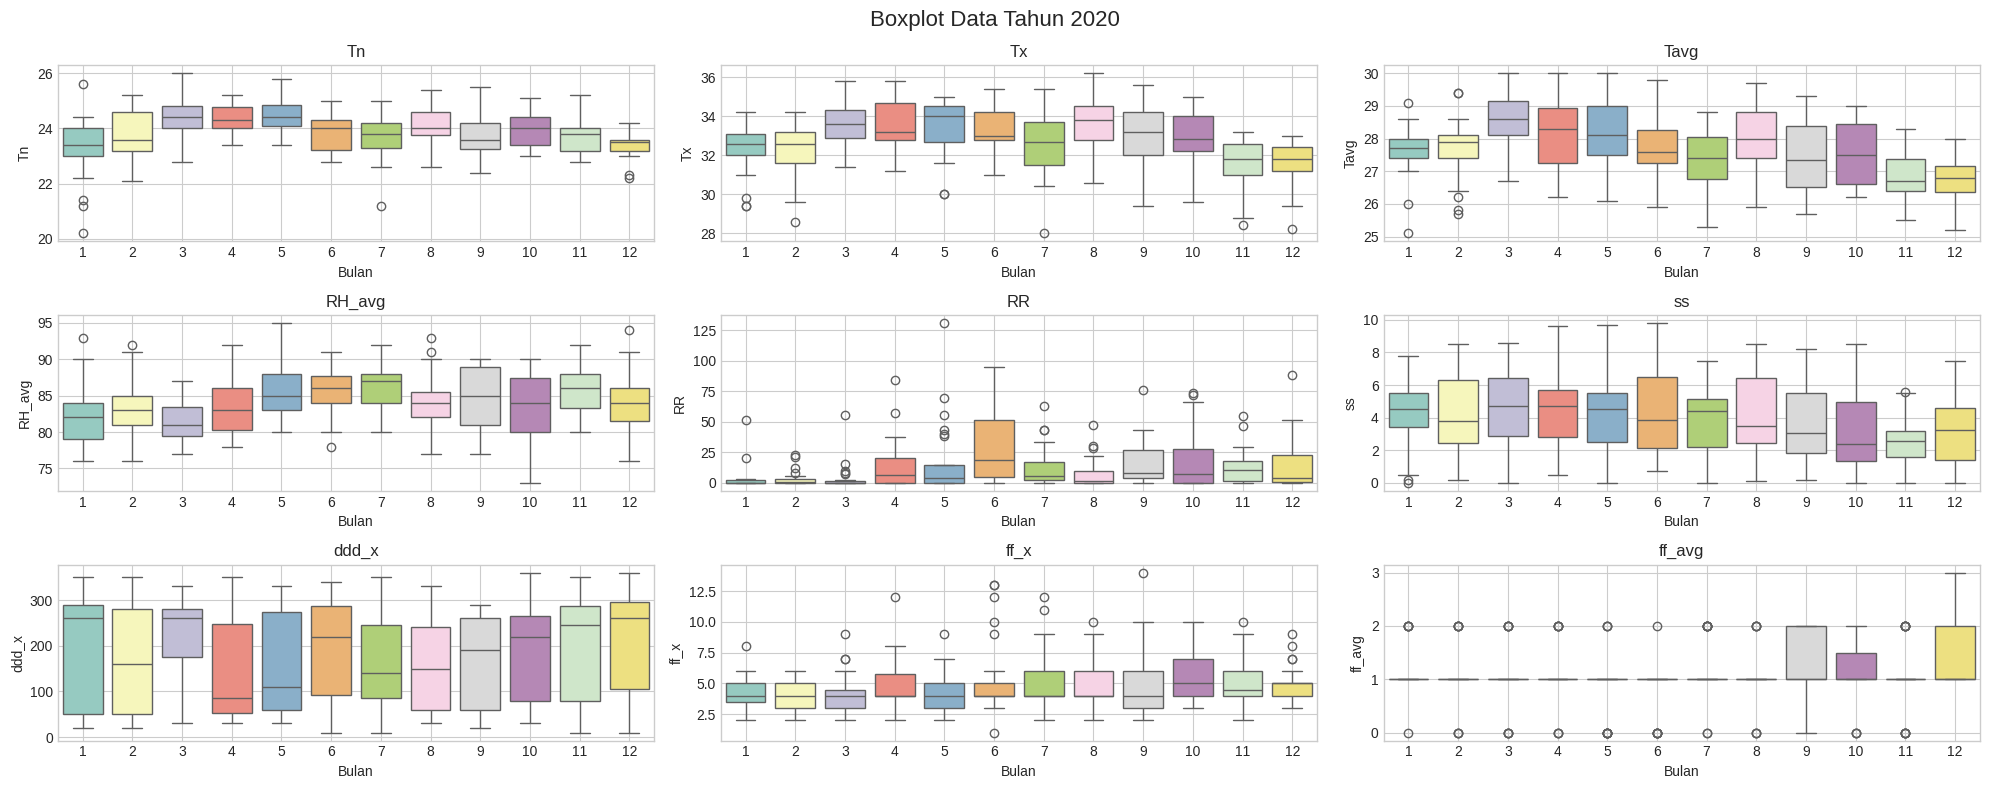

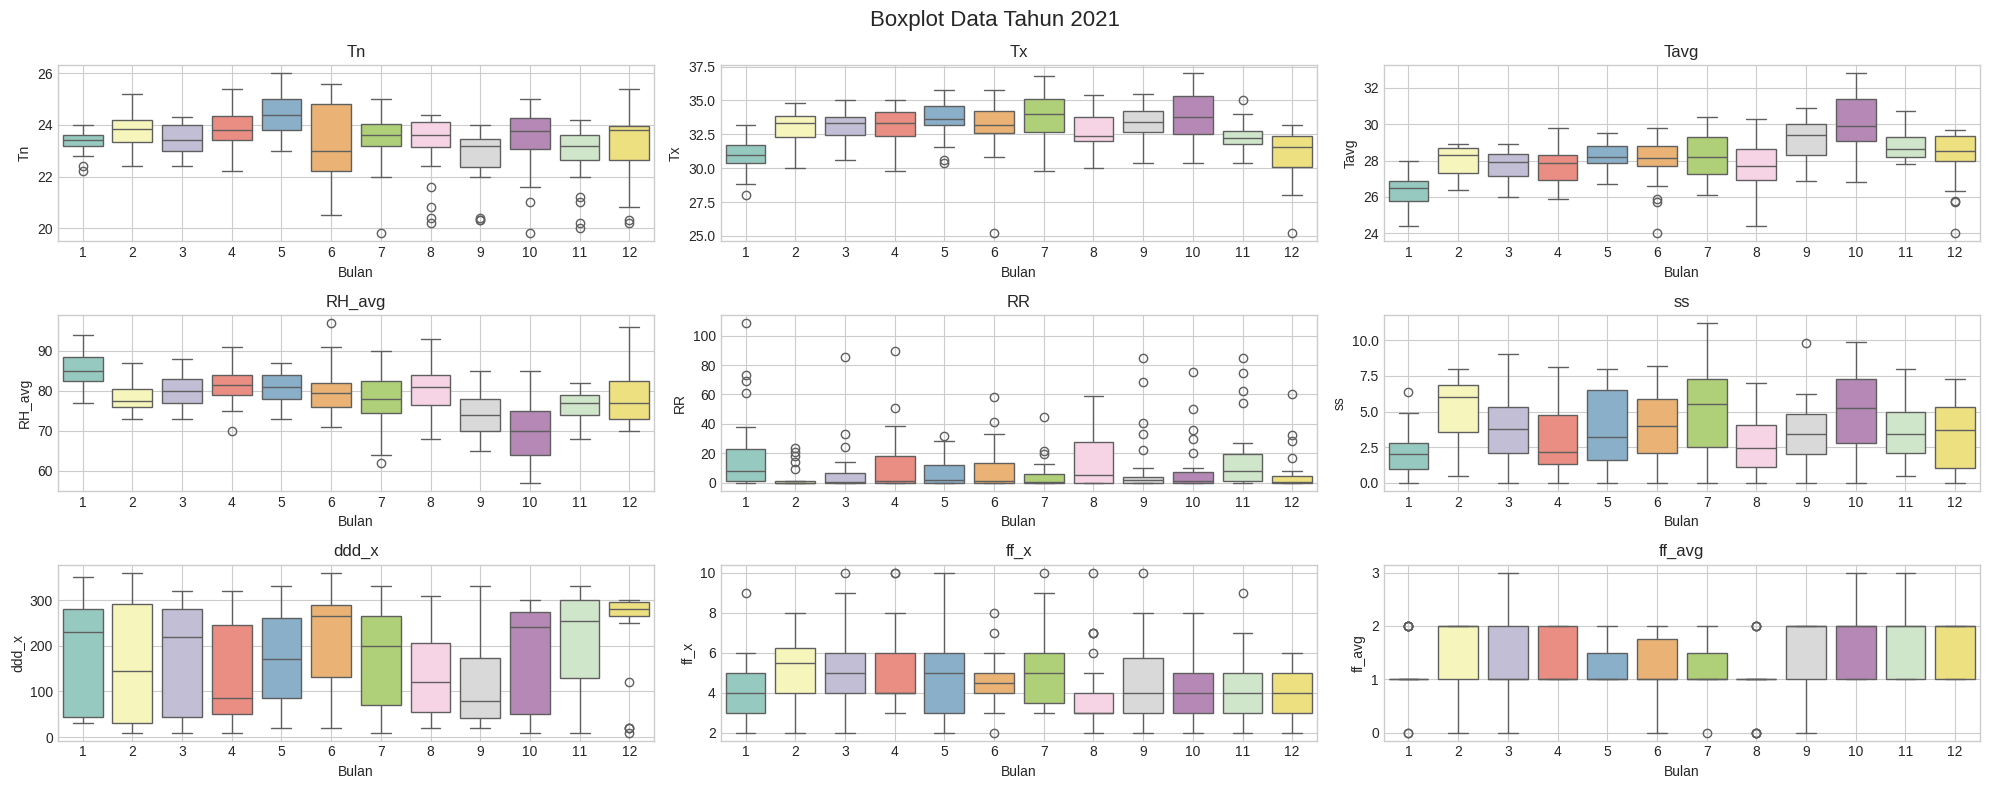

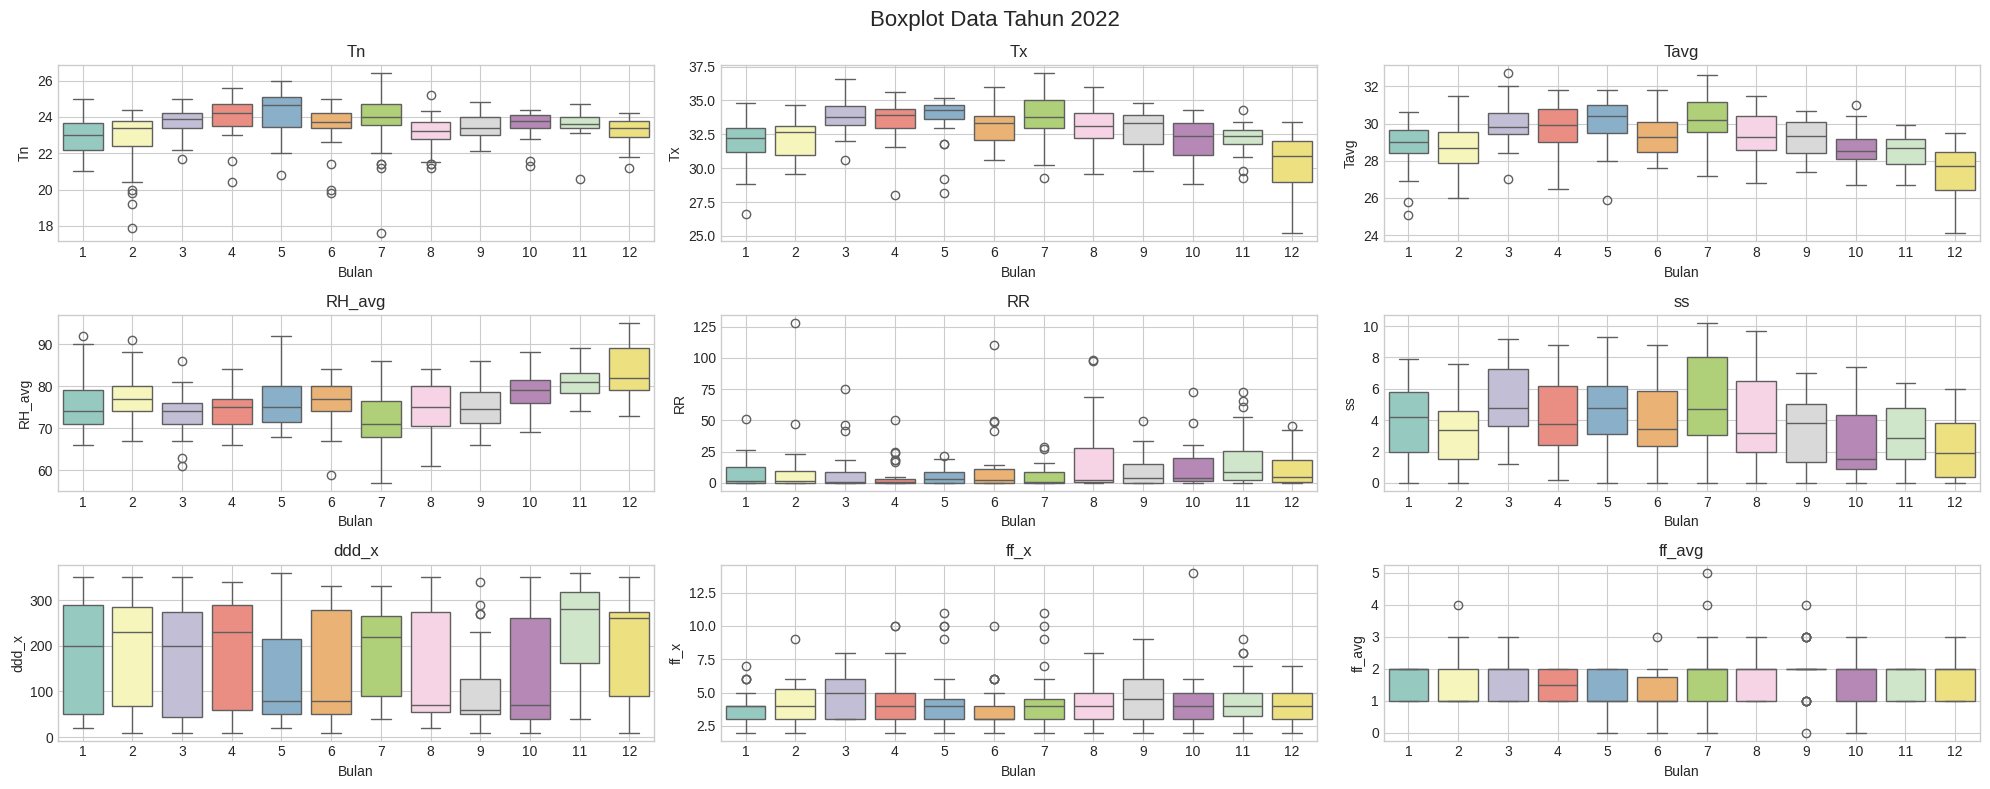

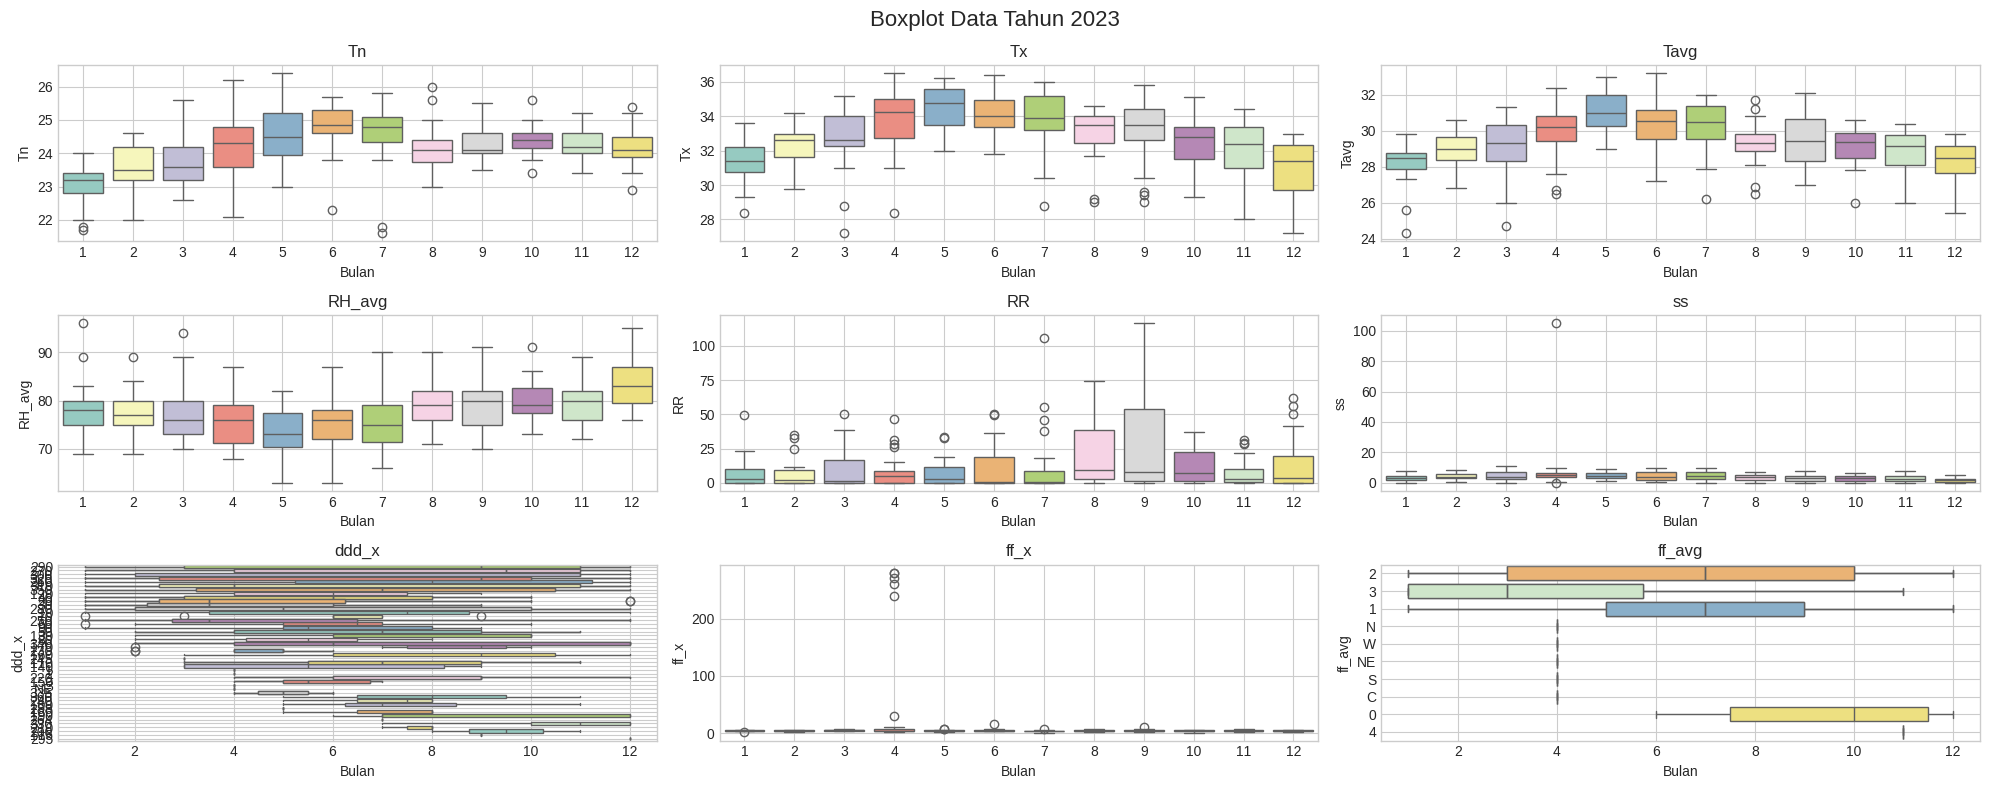

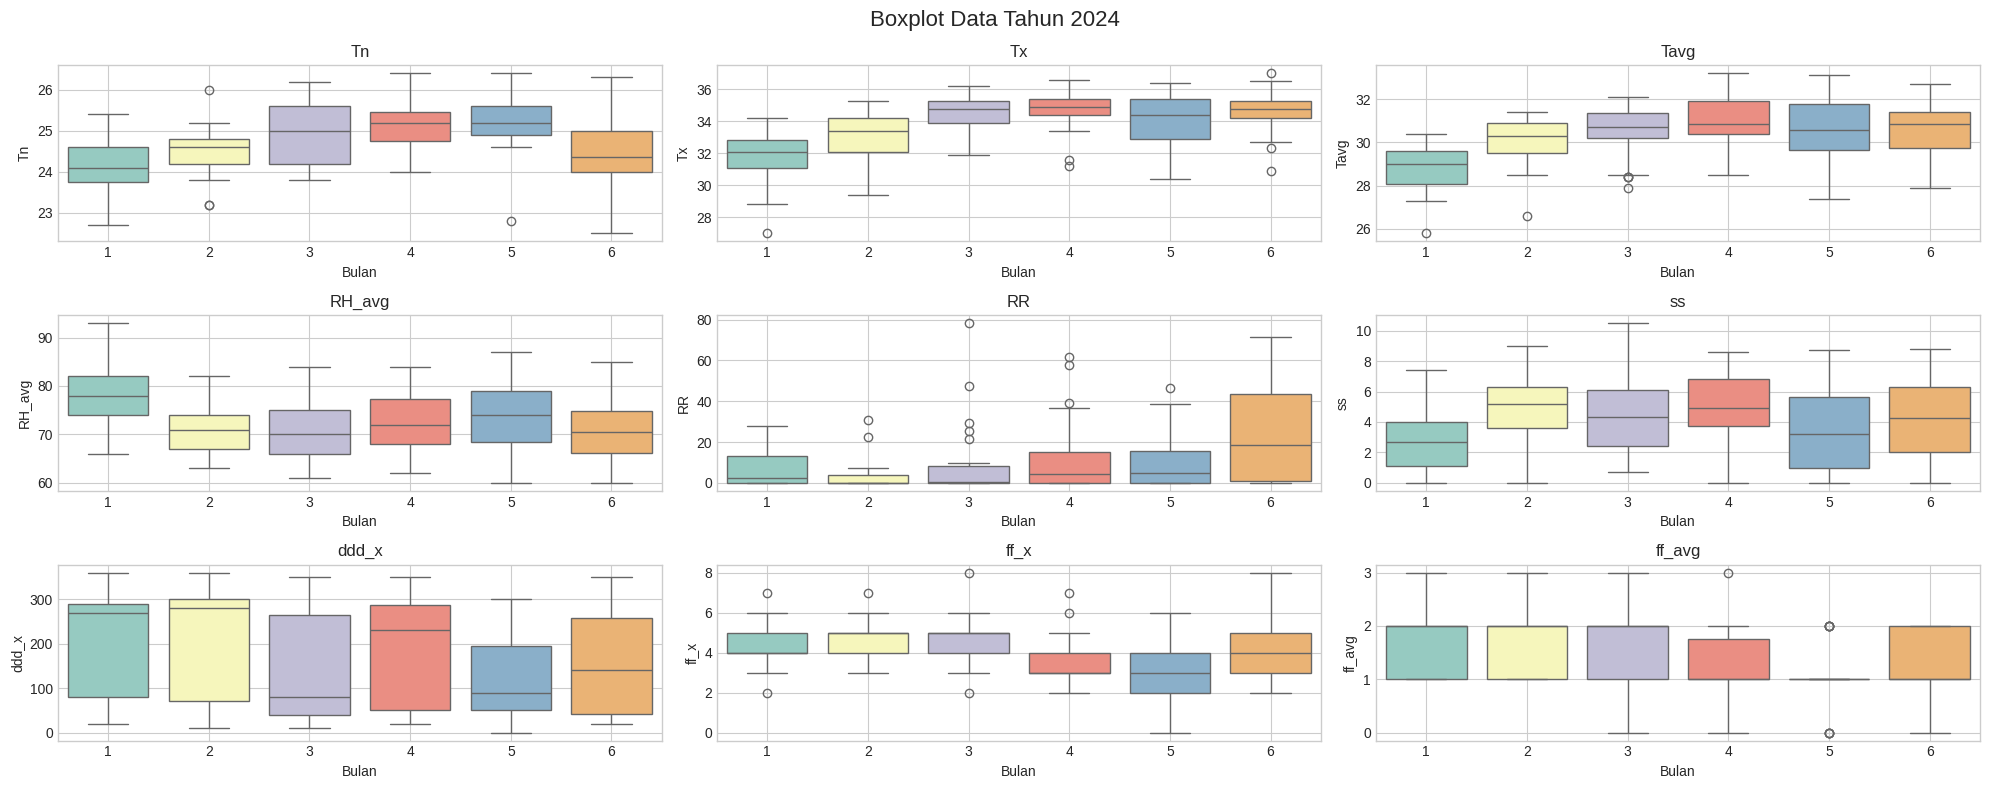

In [ ]:
# Loop untuk membuat boxplot untuk masing-masing kolom pada tiap tahun
for year in range(2020, 2025):
    plt.figure(figsize=(20, 8))
    plt.suptitle(f'Boxplot Data Tahun {year}', fontsize=16)

    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(3, 3, i)
        plt.title(column)
        sns.boxplot(x='Month', y=column, data=df[df['Year'] == year], palette='Set3')
        plt.xlabel('Bulan')
        plt.ylabel(column)
        plt.grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
# Hitung jumlah missing values pada masing-masing kolom
missing_values = df.isnull().sum()

# Hitung persentase missing values
total_values = len(df)
missing_percentage = (missing_values / total_values) * 100

# Tampilkan persentase missing values
print("Persentase Missing Values pada Masing-masing Kolom:")
print(missing_percentage)

Persentase Missing Values pada Masing-masing Kolom:
Tanggal    0.00
Tn         2.50
Tx         1.52
Tavg       0.00
RH_avg     0.00
RR        19.05
ss         0.97
ddd_x      0.00
ddd_car    0.49
ff_x       0.00
ff_avg     0.06
Year       0.00
Month      0.00
dtype: float64


In [ ]:
# Ubah semua nama kolom menjadi huruf kecil
df_cleaned_merged.columns = df_cleaned_merged.columns.str.lower()

# Ganti dengan nama file CSV yang ingin disimpan
save_to_csv(df_cleaned_merged, 'df_cuaca_medan.csv')

## Dataset Bencana
Dataset berisikan semua bencana yang terjadi di Indonesia, oleh karena itu perlu dilakukan pemfilteran untuk kejadian Banjir dan Kabupaten Kota Medan terlebih dahulu.

In [ ]:
# Ganti dengan nama file CSV yang ingin dibaca
df_bencana = pd.read_csv('/content/drive/MyDrive/Skripsi/Dataset/Data Bencana Indonesia.csv', sep=";")

# Konversi kolom 'Tanggal Kejadian' menjadi tipe datetime dengan format 'dayfirst=True'
df_bencana['Tanggal Kejadian'] = pd.to_datetime(df_bencana['Tanggal Kejadian'], dayfirst=True)

# Tampilkan DataFrame hasil penggabungan
df_bencana.head()

No. Kode Identitas Bencana  ID Kabupaten Tanggal Kejadian Kejadian  \
0    1    7210 101 20240630 1          7210       2024-06-30   BANJIR   
1    2    1603 101 20240629 1          1603       2024-06-29   BANJIR   
2    3    3202 101 20240629 1          3202       2024-06-29   BANJIR   
3    4    1111 101 20240628 1          1111       2024-06-28   BANJIR   
4    5    3311 101 20240627 1          3311       2024-06-27   BANJIR   

                                                                                                Lokasi  \
0                                                                                Kec. Gumbasa Ds. Tuva   
1                  Kec. Merapi Timur Kel. Lebuay Bandung Kec. Muara Enim Kel. Air Lintang Kel. Pasar 3   
2  Kec. Jampang Tengah Ds.Bantar Agung Kec. Ciemas Ds.Taman Jaya Kec. Lengkong Ds. Tegallega Ds. Ne...   
3  Kec. Peusangan Ds. Cot Nga Ds. Paya Meuneng Ds. Alue Puno Ds. Paloh Ds. Alue Udeung Ds. Mata Mam...   
4                                                                            Kec. Grogol Ds.Sanggrahan   

    Kabupaten          Provinsi Kronologi & Dokumentasi  \
0        SIGI   SULAWESI TENGAH             Dokumentasi   
1  MUARA ENIM  SUMATERA SELATAN             Dokumentasi   
2    SUKABUMI        JAWA BARAT             Dokumentasi   
3     BIREUEN              ACEH             Dokumentasi   
4   SUKOHARJO       JAWA TENGAH             Dokumentasi   

                                                                                              Penyebab  \
0                               ● intensitas hujan yang tinggi, mengakibatkan banjir dan tanah longsor   
1  ● Dipicu oleh intensitas hujan yang tinggi di Kabupaten Muara Enim mengakibatkan meluapnya air s...   
2  ● Dipicu hujan dengan intensitas sedang hingga lebat yang berangsur lama (± 4 Jam) disertai stru...   
3  ● Dipicu hujan deras disertai angin kencang yang mengguyur Kab. Bireuen sehingga mengakibatkan b...   
4  ● Banjir terjadi karena intensitas hujan tinggi dan membuat drainase yang tersumbat dan tidak la...   

   Meninggal  Hilang  Terluka  Rumah Rusak  Rumah Terendam  Fasum Rusak  
0       0.00    0.00     0.00         0.00            9.00            0  
1       0.00    0.00     0.00         0.00          216.00            0  
2       0.00    0.00     0.00         0.00           61.00            0  
3       0.00    0.00     0.00         0.00          143.00            0  
4       0.00    0.00     0.00         0.00            6.00            0

In [ ]:
# Filter data yang memiliki nilai 'BANJIR' di kolom 'Kejadian'
df_bencana_banjir = df_bencana[df_bencana['Kejadian'] == "BANJIR"]

# Filter data yang memiliki nilai 'SUMATERA UTARA' di kolom 'Provinsi'
df_banjir_sumut = df_bencana_banjir[df_bencana_banjir['Provinsi'] == 'SUMATERA UTARA']

# Reset indeks
df_banjir_sumut = df_banjir_sumut.reset_index(drop=True)

# Cetak data hasil filter
df_banjir_sumut.head()

No. Kode Identitas Bencana  ID Kabupaten Tanggal Kejadian Kejadian  \
0   29    1278 101 20240617 1          1278       2024-06-17   BANJIR   
1   30    1225 101 20240616 1          1225       2024-06-16   BANJIR   
2   38    1271 101 20240612 1          1271       2024-06-12   BANJIR   
3   42    1207 101 20240612 1          1207       2024-06-12   BANJIR   
4  118    1220 101 20240514 1          1220       2024-05-14   BANJIR   

                                                                                                Lokasi  \
0                               Kec. Gunungsitoli Idanoi Ds. Siwalubanua I Ds. Tetehosi I Ds. Hiliweto   
1  Kec. mandrehe Ds. Simae’asi Ds. Iraonogambo Ds. Sisobambowo Ds. Sisarahili I Kec. Mandrehe Barat...   
2  Kec. Medan Selayang Kel. Beringin Kec. Medan Johor Kel. Kwala Bekala Kec. Medan Baru Kel. Padang...   
3                                                            Kec. Pancur Batu Ds. Perumnas Simalingkar   
4                                                                Kec. Simangambat Ds. Simangambat Julu   

            Kabupaten        Provinsi Kronologi & Dokumentasi  \
0   KOTA GUNUNGSITOLI  SUMATERA UTARA             Dokumentasi   
1          NIAS BARAT  SUMATERA UTARA             Dokumentasi   
2          KOTA MEDAN  SUMATERA UTARA             Dokumentasi   
3        DELI SERDANG  SUMATERA UTARA             Dokumentasi   
4  PADANG LAWAS UTARA  SUMATERA UTARA             Dokumentasi   

                                                                                              Penyebab  \
0  ● Pada hari Minggu 17 Juni 2024 , Akibat curah hujan dengan intensitas tinggi dan lama mulai puk...   
1  ● Dpicu curah hujan yang tinggi di sertai angin kencang yang terus menerus mengakibatkan debit a...   
2  ● Curah Hujan Cukup Tinggi di wilayah pegunungan sehingga sungai Babura meluap dan memasuki pemu...   
3  ● Akibat curah Hujan yang tinggi dan berlangsung cukup lama, Menyebabkan air Sungai Gemuruh yang...   
4                                                         ● Dipicu oleh hujan dengan intensitas tinggi   

   Meninggal  Hilang  Terluka  Rumah Rusak  Rumah Terendam  Fasum Rusak  
0       0.00    0.00     0.00         0.00           23.00            0  
1       0.00    0.00     0.00         2.00             NaN            2  
2       0.00    0.00     0.00         0.00          310.00            0  
3       0.00    0.00     0.00         0.00          183.00            0  
4       0.00    0.00     0.00         0.00           70.00            0

In [ ]:
# Hitung frekuensi data masing-masing 'Kabupaten' pada kolom 'Kejadian'
kabupaten_freq = df_banjir_sumut['Kabupaten'].value_counts().reset_index()
kabupaten_freq.columns = ['Kabupaten', 'Frekuensi']

# Ambil 10 kabupaten teratas secara descending
top_kabupaten = kabupaten_freq.head(10)

In [ ]:
# Assuming 'top_kabupaten' is your DataFrame with top 10 kabupaten data
fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_kabupaten['Kabupaten'],
    y=top_kabupaten['Frekuensi'],
    marker_color='aquamarine',  # Using paleturquoise color palette
    text=top_kabupaten['Frekuensi'],  # Display values as text on hover
    textposition='outside',  # Display text outside the bars
))

fig.update_layout(
    title='Top 10 Kabupaten Sumatera Utara Berdasarkan Frekuensi Kejadian Banjir (2020-2024)',
    xaxis=dict(title='Kabupaten'),
    yaxis=dict(title='Frekuensi'),
    xaxis_tickangle=-45,  # Rotate x-axis labels
    plot_bgcolor='white',  # White plot background
    font=dict(family='Arial', size=12, color='black'),  # Font settings
    margin=dict(l=50, r=50, t=80, b=50),  # Adjust margins
    barmode='group',  # Display bars in groups
)

fig.show()

Terlihat bahwa Kota Medan memiliki jumlah kejadian banjir tertinggi, yaitu sebanyak 43 kejadian dari tahun 2020 hingga 2024. Hal ini membuat penelitian ini memberikan fokus yang lebih mendalam pada Kota Medan, dengan tujuan untuk memahami penyebab banjir, dampaknya, serta upaya mitigasi yang dapat dilakukan untuk mengurangi risiko banjir di kota tersebut.

In [ ]:
# Hitung banyaknya data berdasarkan bulan
data_per_month = df_banjir_sumut.groupby(
                          df_banjir_sumut['Tanggal Kejadian'].dt.month).size()

# Konversi Series data_per_month menjadi DataFrame
df_data_per_month = data_per_month.reset_index()
df_data_per_month.columns = ['Bulan', 'Jumlah Kejadian']

# Map numeric month to month names
df_data_per_month['Bulan'] = df_data_per_month['Bulan'].apply(
                                            lambda x: calendar.month_name[x])

In [ ]:
# Create Plotly bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_data_per_month['Bulan'],
    y=df_data_per_month['Jumlah Kejadian'],
    marker_color='aqua',  # Using viridis color palette
    text=df_data_per_month['Jumlah Kejadian'],  # Display values as text on hover
    textposition='outside',  # Display text outside the bars
))

fig.update_layout(
    title='Jumlah Kejadian Banjir Berdasarkan Bulan',
    xaxis=dict(title='Bulan'),
    yaxis=dict(title='Jumlah Data'),
    plot_bgcolor='white',  # White plot background
    font=dict(family='Arial', size=12, color='black'),  # Font settings
    margin=dict(l=50, r=50, t=80, b=50),  # Adjust margins
    barmode='group',  # Display bars in groups
    showlegend=False,  # Hide legend
)

fig.show()

Frekuensi kejadian banjir berdasarkan bulan menunjukkan peningkatan mulai dari bulan Agustus hingga Desember, mencapai puncak tertinggi pada bulan November sebanyak 92 kejadian banjir. Pola ini mencerminkan intensitas curah hujan yang umumnya meningkat menjelang akhir tahun di daerah tersebut.

### Dataset Banjir Kota Medan (2020-2024)

In [ ]:
# Filter data yang memiliki nilai 'KOTA MEDAN' di kolom 'Kabupaten'
df_banjir_medan = df_banjir_sumut[df_banjir_sumut['Kabupaten'] == 'KOTA MEDAN']

# Reset indeks
df_banjir_medan = df_banjir_medan.reset_index(drop=True)

# Ubah nama kolom 'Tanggal Kejadian' menjadi 'tanggal'
df_banjir_medan = df_banjir_medan.rename(columns={'Tanggal Kejadian': 'tanggal'})

# Cetak data hasil filter
df_banjir_medan

No.   Kode Identitas Bencana  ID Kabupaten    tanggal Kejadian  \
0     38      1271 101 20240612 1          1271 2024-06-12   BANJIR   
1    455      1271 101 20240219 1          1271 2024-02-19   BANJIR   
2    817   1271 101 2023 012 05 1          1271 2023-12-05   BANJIR   
3    864  1271 101 2023 011 026 1          1271 2023-11-26   BANJIR   
4    924   1271 101 2023 011 02 1          1271 2023-11-02   BANJIR   
5    950   1271 101 2023 010 06 1          1271 2023-10-06   BANJIR   
6    980   1271 101 2023 09 016 1          1271 2023-09-16   BANJIR   
7    994    1271 101 2023 09 03 1          1271 2023-09-03   BANJIR   
8   1013   1271 101 2023 08 019 1          1271 2023-08-19   BANJIR   
9   1014   1271 101 2023 08 018 1          1271 2023-08-18   BANJIR   
10  2098  1275 101 2022 011 018 1          1275 2022-11-18   BANJIR   
11  2216  1275 101 2022 010 030 1          1275 2022-10-30   BANJIR   
12  2327  1275 101 2022 010 014 1          1275 2022-10-14   BANJIR   
13  2587   1275 101 2022 08 018 1          1275 2022-08-18   BANJIR   
14  2814   1275 101 2022 05 028 1          1275 2022-05-28   BANJIR   
15  2859   1275 101 2022 05 020 1          1275 2022-05-20   BANJIR   
16  2933   1275 101 2022 04 029 1          1275 2022-04-29   BANJIR   
17  2988   1275 101 2022 04 017 1          1275 2022-04-17   BANJIR   
18  2994   1275 101 2022 04 016 1          1275 2022-04-16   BANJIR   
19  3004   1275 101 2022 04 011 1          1275 2022-04-11   BANJIR   
20  3006    1275 101 2022 04 08 1          1275 2022-04-08   BANJIR   
21  3024    1275 101 2022 04 03 1          1275 2022-04-03   BANJIR   
22  3095   1275 101 2022 03 017 1          1275 2022-03-17   BANJIR   
23  3152    1275 101 2022 03 09 1          1275 2022-03-09   BANJIR   
24  3205   1275 101 2022 02 027 1          1275 2022-02-27   BANJIR   
25  3466    1275 101 2022 01 05 1          1275 2022-01-05   BANJIR   
26  3560   1275 101 2021 012 21 1          1271 2021-12-21   BANJIR   
27  3714    1275 101 2021 012 6 1          1271 2021-12-06   BANJIR   
28  3734    1275 101 2021 012 4 1          1271 2021-12-04   BANJIR   
29  3847   1275 101 2021 011 23 1          1271 2021-11-23   BANJIR   
30  3941   1275 101 2021 011 11 1          1271 2021-11-11   BANJIR   
31  4065   1275 101 2021 010 31 1          1271 2021-10-31   BANJIR   
32  4157    1275 101 2021 010 7 1          1271 2021-10-07   BANJIR   
33  4163    1275 101 2021 010 5 1          1271 2021-10-05   BANJIR   
34  4358    1275 101 2021 08 22 1          1271 2021-08-22   BANJIR   
35  4374    1275 101 2021 08 20 1          1271 2021-08-20   BANJIR   
36  4423    1275 101 2021 01 18 1          1271 2021-07-29   BANJIR   
37  4647    1275 101 2021 05 12 1          1271 2021-05-12   BANJIR   
38  4789    1275 101 2021 03 30 1          1271 2021-03-30   BANJIR   
39  5570   1275 101 2020 012 03 1          1271 2020-12-03   BANJIR   
40  5652  1275 101 2020 011 021 1          1271 2020-11-21   BANJIR   
41  5781  1275 101 2020 010 016 1          1271 2020-10-16   BANJIR   
42  6073   1275 101 2020 06 018 1          1271 2020-06-18   BANJIR   
43  6858   1275 101 2020 01 029 1          1271 2020-01-29   BANJIR   

                                                                                                 Lokasi  \
0   Kec. Medan Selayang Kel. Beringin Kec. Medan Johor Kel. Kwala Bekala Kec. Medan Baru Kel. Padang...   
1                        kec. Medan Maimun kel. Aur kel. Sei Mati kec. Medan Selayang Kel. Sei Beringin   
2                                                      Kec. Medan Sunggal Kel. Tanjung Rejo Kec. Tobada   
3                                                              Kec. Medan Maimun Kel. Sei Mati Kel. Aur   
4                                                              Kec. Medan Maimun Kel. Aur Kel. Sei Mati   
5         Kec. Medan Helvetia Kel. Cinta Damai Kel. Sunggal Kec. Medan Sunggal Kel. Sunggal Kel. Lalang   
6   Kec. Medan Selayang Kel. Beringin Kec. Medan Johor Kel. 

In [ ]:
# Convert 'tanggal' column to datetime type
df_banjir_medan['tanggal'] = pd.to_datetime(df_banjir_medan['tanggal'])

# Sort by 'tanggal' column
df_banjir_medan = df_banjir_medan.sort_values(by='tanggal')

# Capitalize each word in the relevant columns
df_banjir_medan['Kejadian'] = df_banjir_medan['Kejadian'].str.title()
df_banjir_medan['Kabupaten'] = df_banjir_medan['Kabupaten'].str.title()
df_banjir_medan['Provinsi'] = df_banjir_medan['Provinsi'].str.title()

# Ubah semua nama kolom menjadi huruf kecil
df_banjir_medan.columns = df_banjir_medan.columns.str.lower()

df_banjir_medan = df_banjir_medan[['tanggal','kejadian','kabupaten','provinsi']]

# Reset the index
df_banjir_medan.reset_index(drop=True, inplace=True)

df_banjir_medan

tanggal kejadian   kabupaten        provinsi
0  2020-01-29   Banjir  Kota Medan  Sumatera Utara
1  2020-06-18   Banjir  Kota Medan  Sumatera Utara
2  2020-10-16   Banjir  Kota Medan  Sumatera Utara
3  2020-11-21   Banjir  Kota Medan  Sumatera Utara
4  2020-12-03   Banjir  Kota Medan  Sumatera Utara
5  2021-03-30   Banjir  Kota Medan  Sumatera Utara
6  2021-05-12   Banjir  Kota Medan  Sumatera Utara
7  2021-07-29   Banjir  Kota Medan  Sumatera Utara
8  2021-08-20   Banjir  Kota Medan  Sumatera Utara
9  2021-08-22   Banjir  Kota Medan  Sumatera Utara
10 2021-10-05   Banjir  Kota Medan  Sumatera Utara
11 2021-10-07   Banjir  Kota Medan  Sumatera Utara
12 2021-10-31   Banjir  Kota Medan  Sumatera Utara
13 2021-11-11   Banjir  Kota Medan  Sumatera Utara
14 2021-11-23   Banjir  Kota Medan  Sumatera Utara
15 2021-12-04   Banjir  Kota Medan  Sumatera Utara
16 2021-12-06   Banjir  Kota Medan  Sumatera Utara
17 2021-12-21   Banjir  Kota Medan  Sumatera Utara
18 2022-01-05   Banjir  Kota Medan  Sumatera Utara
19 2022-02-27   Banjir  Kota Medan  Sumatera Utara
20 2022-03-09   Banjir  Kota Medan  Sumatera Utara
21 2022-03-17   Banjir  Kota Medan  Sumatera Utara
22 2022-04-03   Banjir  Kota Medan  Sumatera Utara
23 2022-04-08   Banjir  Kota Medan  Sumatera Utara
24 2022-04-11   Banjir  Kota Medan  Sumatera Utara
25 2022-04-16   Banjir  Kota Medan  Sumatera Utara
26 2022-04-17   Banjir  Kota Medan  Sumatera Utara
27 2022-04-29   Banjir  Kota Medan  Sumatera Utara
28 2022-05-20   Banjir  Kota Medan  Sumatera Utara
29 2022-05-28   Banjir  Kota Medan  Sumatera Utara
30 2022-08-18   Banjir  Kota Medan  Sumatera Utara
31 2022-10-14   Banjir  Kota Medan  Sumatera Utara
32 2022-10-30   Banjir  Kota Medan  Sumatera Utara
33 2022-11-18   Banjir  Kota Medan  Sumatera Utara
34 2023-08-18   Banjir  Kota Medan  Sumatera Utara
35 2023-08-19   Banjir  Kota Medan  Sumatera Utara
36 2023-09-03   Banjir  Kota Medan  Sumatera Utara
37 2023-09-16   Banjir  Kota Medan  Sumatera Utara
38 2023-10-06   Banjir  Kota Medan  Sumatera Utara
39 2023-11-02   Banjir  Kota Medan  Sumatera Utara
40 2023-11-26   Banjir  Kota Medan  Sumatera Utara
41 2023-12-05   Banjir  Kota Medan  Sumatera Utara
42 2024-02-19   Banjir  Kota Medan  Sumatera Utara
43 2024-06-12   Banjir  Kota Medan  Sumatera Utara

In [ ]:
# Ganti dengan nama file CSV yang ingin disimpan
save_to_csv(df_banjir_medan, 'df_banjir_medan.csv')

## Dataset Akhir
Gabungan dataset cuaca dan dataset banjir di Kota Medan

In [ ]:
# Fungsi untuk membaca file CSV dan mengembalikan DataFrame
def read_csv(file_path):
    return pd.read_csv(file_path)

# Ganti dengan nama file CSV yang ingin dibaca
df_cuaca = read_csv('/content/drive/MyDrive/Skripsi/Dataset/df_cuaca_medan.csv')
df_bencana = read_csv('/content/drive/MyDrive/Skripsi/Dataset/df_banjir_medan.csv')

In [ ]:
# Melakukan penggabungan dataset berdasarkan kolom 'tanggal'
df_cuaca_banjir= pd.merge(df_cuaca, df_bencana, on='tanggal', how='left')
df_cuaca_banjir.head()

tanggal    tn    tx  tavg  rh_avg   rr   ss ddd_x ddd_car  ff_x ff_avg  \
0  2020-01-01 24.20 32.60 27.60      81 0.00 4.30   350      C      6      2   
1  2020-01-02 23.30 32.40 27.50      81 0.00 6.50   300      C      3      1   
2  2020-01-03 23.60 29.80 27.40      86  NaN 3.00   300      W      5      2   
3  2020-01-04 24.10 29.40 26.00      90 3.50 0.50   270      C      3      1   
4  2020-01-05 23.00 32.10 27.00      85 1.70 0.20   290      C      3      1   

  kejadian kabupaten provinsi  
0      NaN       NaN      NaN  
1      NaN       NaN      NaN  
2      NaN       NaN      NaN  
3      NaN       NaN      NaN  
4      NaN       NaN      NaN

In [ ]:
# Mengisi nilai yang kosong pada variabel kejadian, kabupaten dan provinsi
df_cuaca_banjir['kejadian'] = df_cuaca_banjir['kejadian'].fillna('Tidak Banjir')
df_cuaca_banjir['kabupaten'] = df_cuaca_banjir['kabupaten'].fillna('Kota Medan')
df_cuaca_banjir['provinsi'] = df_cuaca_banjir['provinsi'].fillna('Sumatera Utara')

df_cuaca_banjir.head()

tanggal    tn    tx  tavg  rh_avg   rr   ss ddd_x ddd_car  ff_x ff_avg  \
0  2020-01-01 24.20 32.60 27.60      81 0.00 4.30   350      C      6      2   
1  2020-01-02 23.30 32.40 27.50      81 0.00 6.50   300      C      3      1   
2  2020-01-03 23.60 29.80 27.40      86  NaN 3.00   300      W      5      2   
3  2020-01-04 24.10 29.40 26.00      90 3.50 0.50   270      C      3      1   
4  2020-01-05 23.00 32.10 27.00      85 1.70 0.20   290      C      3      1   

       kejadian   kabupaten        provinsi  
0  Tidak Banjir  Kota Medan  Sumatera Utara  
1  Tidak Banjir  Kota Medan  Sumatera Utara  
2  Tidak Banjir  Kota Medan  Sumatera Utara  
3  Tidak Banjir  Kota Medan  Sumatera Utara  
4  Tidak Banjir  Kota Medan  Sumatera Utara

In [ ]:
df_cuaca_banjir.tail()

tanggal    tn    tx  tavg  rh_avg    rr   ss ddd_x ddd_car  ff_x  \
1638  2024-06-26 24.00 34.30 31.00      73 45.60 4.90   110      C      3   
1639  2024-06-27 25.40 34.20 31.10      74   NaN 4.30   160      C      4   
1640  2024-06-28 24.20 35.20 31.20      68  0.00 1.80   180      C      4   
1641  2024-06-29 24.00 34.60 28.60      79 10.00 5.10   280      C      4   
1642  2024-06-30 24.00 33.80 30.10      72 18.40 4.00    20      N      4   

     ff_avg      kejadian   kabupaten        provinsi  
1638      1  Tidak Banjir  Kota Medan  Sumatera Utara  
1639      1  Tidak Banjir  Kota Medan  Sumatera Utara  
1640      2  Tidak Banjir  Kota Medan  Sumatera Utara  
1641      1  Tidak Banjir  Kota Medan  Sumatera Utara  
1642      2  Tidak Banjir  Kota Medan  Sumatera Utara

In [ ]:
# Ganti dengan nama file CSV yang ingin disimpan
save_to_csv(df_cuaca_banjir, 'df_cuaca_banjir_medan.csv')

# C. Prediksi Banjir (CatBoost Classifier)
Setelah berhasil menggabungkan dataset cuaca dan data kejadian banjir di Kota Medan, langkah selanjutnya adalah memprediksi potensi terjadinya banjir berdasarkan kondisi cuaca. Untuk melakukan prediksi ini, digunakan algoritma Machine Learning dengan metode klasifikasi, yaitu CatBoost Classifier. Metode ini dipilih karena kemampuannya yang baik dalam menangani data dengan fitur kategorikal dan kinerjanya yang unggul dalam berbagai jenis dataset.

Proses prediksi banjir dengan CatBoost Classifier meliputi beberapa tahap sebagai berikut:

1. **Preprocessing Data**:
   - Mengatasi missing, duplicate, dan outlier values dalam dataset.
   - Mengatasi ketidakseimbangan kelas dalam dataset.
   - Pembagian data menjadi data pelatihan dan pengujian.

2. **Pelatihan Model**:
   - Menggunakan data pelatihan untuk melatih model CatBoost Classifier.
   - Melakukan tuning hyperparameter untuk mendapatkan model dengan performa terbaik.

3. **Evaluasi Model**:
   - Menggunakan data pengujian untuk mengevaluasi kinerja model.
   - Mengukur metrik evaluasi seperti akurasi, precision, recall, dan F1-score untuk menilai efektivitas model.

4. **Prediksi dan Interpretasi**:
   - Menggunakan model terlatih untuk memprediksi potensi banjir berdasarkan data cuaca terbaru.
   - Menyajikan hasil prediksi dalam bentuk yang mudah dipahami, seperti dashboard interaktif, untuk mendukung pengambilan keputusan.

## Import Library

In [ ]:
%pip install CatBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
palette_color = sns.color_palette('pastel')

# Plotly
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pio.templates.default = "plotly_white"

#Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE

# Model
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold, StratifiedKFold
from catboost import CatBoostClassifier
from sklearn import svm, metrics
import pickle

# Evaluasi Metriks
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

#untuk dapat melihat seluruh kolom dan baris
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# The number of numbers that will be shown after the comma.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Mengabaikan peringatan
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

<ipython-input-2-8fac4c7c9661>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/df_cuaca_banjir_medan.csv")
df.head()

tanggal    tn    tx  tavg  rh_avg   rr   ss ddd_x ddd_car  ff_x ff_avg  \
0  2020-01-01 24.20 32.60 27.60      81 0.00 4.30   350      C      6      2   
1  2020-01-02 23.30 32.40 27.50      81 0.00 6.50   300      C      3      1   
2  2020-01-03 23.60 29.80 27.40      86  NaN 3.00   300      W      5      2   
3  2020-01-04 24.10 29.40 26.00      90 3.50 0.50   270      C      3      1   
4  2020-01-05 23.00 32.10 27.00      85 1.70 0.20   290      C      3      1   

       kejadian   kabupaten        provinsi  
0  Tidak Banjir  Kota Medan  Sumatera Utara  
1  Tidak Banjir  Kota Medan  Sumatera Utara  
2  Tidak Banjir  Kota Medan  Sumatera Utara  
3  Tidak Banjir  Kota Medan  Sumatera Utara  
4  Tidak Banjir  Kota Medan  Sumatera Utara

## Data Understanding
Pada tahap ini, kita fokus pada pemahaman data yang digunakan dalam prediksi banjir. Parameter cuaca yang digunakan dalam analisis ini meliputi tiga variabel utama:

1. **Curah Hujan (RR)**: Jumlah curah hujan harian, yang merupakan faktor utama dalam menentukan potensi banjir.
2. **Suhu Udara Rata-Rata (Tavg)**: Rata-rata suhu harian, yang dapat mempengaruhi kondisi atmosfer dan pola cuaca.
3. **Kelembapan Udara Rata-Rata (RH_avg)**: Tingkat kelembapan harian, yang juga berperan dalam proses pembentukan hujan.

Selain itu, kejadian digunakan sebagai variabel target dalam model prediksi. Kejadian ini menunjukkan apakah banjir terjadi atau tidak pada hari tertentu berdasarkan data historis kejadian banjir.


In [ ]:
# List target kolom yang ingin digunakan
target_columns = ['tanggal', 'rr', 'tavg', 'rh_avg', 'kejadian']

df = df[target_columns]

# Renaming the columns
df = df.rename(columns={
    'rr': 'curah_hujan',
    'tavg': 'suhu_udara',
    'rh_avg': 'kelembapan_udara',
    'kejadian': 'status_banjir'
})

# Convert 'tanggal' column to datetime format
df['tanggal'] = pd.to_datetime(df['tanggal'])

df.head()

tanggal  curah_hujan  suhu_udara  kelembapan_udara status_banjir
0 2020-01-01         0.00       27.60                81  Tidak Banjir
1 2020-01-02         0.00       27.50                81  Tidak Banjir
2 2020-01-03          NaN       27.40                86  Tidak Banjir
3 2020-01-04         3.50       26.00                90  Tidak Banjir
4 2020-01-05         1.70       27.00                85  Tidak Banjir

In [ ]:
df.tail()

tanggal  curah_hujan  suhu_udara  kelembapan_udara status_banjir
1638 2024-06-26        45.60       31.00                73  Tidak Banjir
1639 2024-06-27          NaN       31.10                74  Tidak Banjir
1640 2024-06-28         0.00       31.20                68  Tidak Banjir
1641 2024-06-29        10.00       28.60                79  Tidak Banjir
1642 2024-06-30        18.40       30.10                72  Tidak Banjir

In [ ]:
pd.options.display.max_colwidth = 100
params = [
    ['tanggal', 'Tanggal Kejadian',''],
    ['curah_hujan','Curah Hujan','mm'],
    ['suhu_udara','Suhu Udara Rata-Rata','℃'],
    ['kelembapan_udara','Kelembapan Udara Rata-Rata ','%'],
    ['status_banjir','Stasus Banjir',''],
]

params_df = pd.DataFrame(params, columns=['Fitur', 'Keterangan', 'Satuan'])
display(params_df)

Fitur                   Keterangan Satuan
0           tanggal             Tanggal Kejadian       
1       curah_hujan                  Curah Hujan     mm
2        suhu_udara         Suhu Udara Rata-Rata      ℃
3  kelembapan_udara  Kelembapan Udara Rata-Rata       %
4     status_banjir                Stasus Banjir

In [ ]:
# Checking some information of data
def check_data(df):
    List = []
    columns = df.columns
    for cols in columns:
        null_val = df[cols].isnull().sum()  # Checking the null values
        unique_val = df[cols].nunique()  # Checking the unique values
        dtypes = df[cols].dtypes  # Cheking the type of features
        List.append([cols, null_val, unique_val, dtypes])
    df_check = pd.DataFrame(List)
    df_check.columns = ["features", "null_val", "unique_val", "dtypes"]
    return df_check

check_data(df)

features  null_val  unique_val          dtypes
0           tanggal         0        1643  datetime64[ns]
1       curah_hujan       313         361         float64
2        suhu_udara         0          89         float64
3  kelembapan_udara         0          41           int64
4     status_banjir         0           2          object

In [ ]:
# Fungsi mengecek jumlah baris dan kolom
def check_row_col(df):
    n_rows, n_cols = df.shape
    print("Jumlah baris:", n_rows)
    print("Jumlah kolom:", n_cols)

check_row_col(df)

Jumlah baris: 1643
Jumlah kolom: 5


In [ ]:
# Check if columns are numeric
numeric_features = df.select_dtypes(include=['float','int']).columns.tolist()
print("Kolom numerik: ",numeric_features)

# Check if columns are categorical
categoric_features = df.select_dtypes(include=['object']).columns.tolist()
print("Kolom kategorik: ",categoric_features)

Kolom numerik:  ['curah_hujan', 'suhu_udara', 'kelembapan_udara']
Kolom kategorik:  ['status_banjir']


In [ ]:
# Deskripsi statistik
weather_stats = df[numeric_features].describe().T.round(3)
weather_stats

count  mean   std   min   25%   50%   75%    max
curah_hujan      1330.00 11.59 19.00  0.00  0.00  2.50 15.50 130.90
suhu_udara       1643.00 28.79  1.59 24.00 27.70 28.70 29.80  33.20
kelembapan_udara 1643.00 78.61  6.70 57.00 74.00 79.00 83.00  97.00

## Data Preparation / Preprocessing
Pada tahap ini, dilakukan beberapa langkah persiapan dan praproses data untuk memastikan data siap digunakan dalam model prediksi.

### Missing Value
Ditemukan variabel dalam dataset yang mengandung nilai yang hilang. Untuk menangani hal ini, dilakukan imputasi nilai hilang menggunakan nilai median dari masing-masing variabel. Pendekatan ini dipilih karena median tidak dipengaruhi oleh outlier, sehingga memberikan estimasi yang lebih robust untuk nilai yang hilang.

In [ ]:
def get_missing_values_table(df):
    # Calculate the number of missing values
    missing_values = df.isnull().sum()

    # Calculate the percentage of missing values
    missing_values_percentage = df.isnull().sum() * 100 / len(df)

    # Combine the results into a single DataFrame
    missing_values_table = pd.concat([missing_values,
                                      missing_values_percentage], axis=1)

    # Rename the columns for clarity
    missing_values_table = missing_values_table.rename(
        columns={0: 'Missing Values', 1: '% of Missing Values'})

    return missing_values_table

# Checking the missing value
get_missing_values_table(df)

Missing Values  % of Missing Values
tanggal                        0                 0.00
curah_hujan                  313                19.05
suhu_udara                     0                 0.00
kelembapan_udara               0                 0.00
status_banjir                  0                 0.00

In [ ]:
def handle_missing_with_median(df):
    # Calculate the median of each numeric column
    median_values = df[numeric_features].median()

    # Replace missing values with the median of each column
    df_filled = df.fillna(median_values)

    return df_filled

# Apply the function to handle missing values
df_filled = handle_missing_with_median(df)

# Checking the missing value
get_missing_values_table(df_filled)

Missing Values  % of Missing Values
tanggal                        0                 0.00
curah_hujan                    0                 0.00
suhu_udara                     0                 0.00
kelembapan_udara               0                 0.00
status_banjir                  0                 0.00

### Duplicate Value
Langkah selanjutnya adalah pengecekan terhadap data duplikat. Pengecekan dilakukan untuk memastikan tidak ada data yang tercatat lebih dari satu kali. Hasil pengecekan menunjukkan bahwa tidak ada data duplikat dalam dataset, sehingga tidak diperlukan tindakan lebih lanjut untuk mengatasi duplikasi data.

In [ ]:
# Check for Duplication
print("The number of duplicated value in data:\n",
      df_filled.duplicated().sum())

The number of duplicated value in data:
 0


### Outlier Value
Kemudian, dilakukan pengecekan terhadap nilai outlier dalam dataset. Pengecekan ini divisualisasikan menggunakan boxplot, yang memperlihatkan adanya beberapa titik outlier yang signifikan. Untuk mengatasi outlier ini, digunakan metode Interquartile Range (IQR). Dengan metode ini, nilai-nilai yang jatuh di luar rentang yang wajar (`Q1 - 1.5*IQR` dan `Q3 + 1.5*IQR`) dianggap sebagai outlier dan ditangani sesuai kebutuhan untuk mengurangi dampak negatifnya terhadap analisis.

In [ ]:
def create_boxplot(df, numeric_features, title='Boxplot of Weather in Medan',
                   height=500, width=1100):
    fig = go.Figure()

    for feature in numeric_features:
        fig.add_trace(go.Box(y=df[feature], name=feature))

    fig.update_layout(title=title,
                      height=height,
                      width=width)
    fig.show()

create_boxplot(df_filled, numeric_features)

In [ ]:
def handle_outliers_iqr(df, columns):
    for column_name in columns:
        if column_name in df.columns:
            Q1 = df[column_name].quantile(0.25)
            Q3 = df[column_name].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            df.loc[df[column_name] < lower_bound, column_name] = lower_bound
            df.loc[df[column_name] > upper_bound, column_name] = upper_bound
        else:
            print(f"Column '{column_name}' not found in DataFrame")

    return df

handled_df = handle_outliers_iqr(df_filled, numeric_features)
create_boxplot(handled_df, numeric_features)

Tahap ini melibatkan konversi nilai pada kolom status banjir dimana nilai Tidak Banjir diubah menjadi Tidak dan Banjir diubah menjadi Ya.


In [ ]:
# Create a new column 'status_banjir' based on conditions
handled_df['status_banjir'] = handled_df['status_banjir'].apply(lambda x: 'Ya' if x == 'Banjir' else 'Tidak')

# Print unique values of the 'status_banjir' column
print(handled_df['status_banjir'].unique())

handled_df.head()

['Tidak' 'Ya']


tanggal  curah_hujan  suhu_udara  kelembapan_udara status_banjir
0 2020-01-01         0.00       27.60             81.00         Tidak
1 2020-01-02         0.00       27.50             81.00         Tidak
2 2020-01-03         2.50       27.40             86.00         Tidak
3 2020-01-04         3.50       26.00             90.00         Tidak
4 2020-01-05         1.70       27.00             85.00         Tidak

In [ ]:
def download_csv(df, filename):
  df.to_csv(filename, index=False)
  print(f"CSV file '{filename}' berhasil disimpan.")

download_csv(handled_df, 'df_classifier.csv')

CSV file 'df_classifier.csv' berhasil disimpan.


## Exploratory Data Analysis (EDA)
Pada tahap ini, dilakukan eksplorasi data untuk memahami distribusi dan hubungan antara variabel dalam dataset.

In [ ]:
df = handled_df.copy()

# Separate numeric and categorical features
df_numeric = df[numeric_features]
df_categoric = df[categoric_features]

### Analisis Numerikal
Analisis numerikal melibatkan pemeriksaan distribusi dan statistik deskriptif dari variabel numerik dalam dataset.

In [ ]:
df_numeric.head()

curah_hujan  suhu_udara  kelembapan_udara
0         0.00       27.60             81.00
1         0.00       27.50             81.00
2         2.50       27.40             86.00
3         3.50       26.00             90.00
4         1.70       27.00             85.00

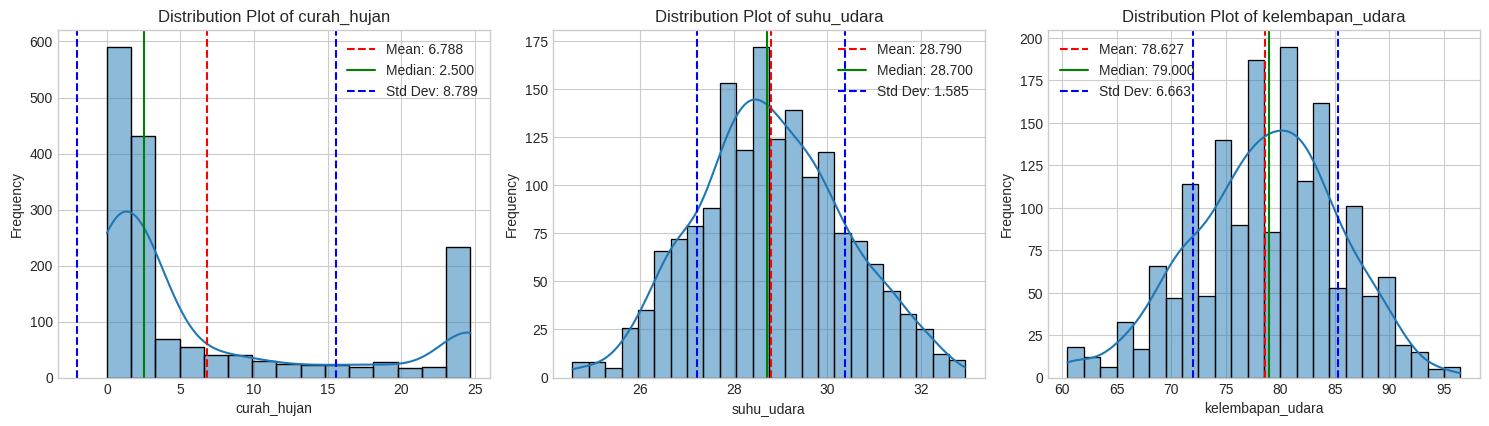

In [ ]:
def plot_histograms_with_stats(df, num_cols, nrows=3, ncols=3, figsize=(15, 12)):

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)

    # Flatten the axes for easy iteration
    axes = axes.flatten()

    # Plot histograms for each numeric feature
    for i, column in enumerate(num_cols):
        # Plot the histogram with KDE
        sns.histplot(df[column], kde=True, ax=axes[i])

        # Calculate statistics
        mean = df[column].mean()
        median = df[column].median()
        std = df[column].std()

        # Add annotations for statistics
        axes[i].axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.3f}')
        axes[i].axvline(median, color='g', linestyle='-', label=f'Median: {median:.3f}')
        axes[i].axvline(mean + std, color='b', linestyle='--', label=f'Std Dev: {std:.3f}')
        axes[i].axvline(mean - std, color='b', linestyle='--')

        # Add title and labels
        axes[i].set_title(f'Distribution Plot of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

        # Add legend
        axes[i].legend()

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()

plot_histograms_with_stats(df, df_numeric.columns)

 Pada Gambar diatas, ditampilkan distribusi curah hujan, suhu udara rata-rata, dan kelembapan udara rata-rata. Gambar tersebut menunjukkan beberapa informasi penting:
- **Curah Hujan (RR)**: Distribusi curah hujan menunjukkan adanya data yang sangat condong ke kiri atau tidak normal.
- **Suhu Udara Rata-Rata (Tavg)**: Distribusi suhu udara rata-rata tampak normal.
- **Kelembapan Udara Rata-Rata (RH_avg)**: Distribusi kelembapan udara rata-rata juga tampak normal.

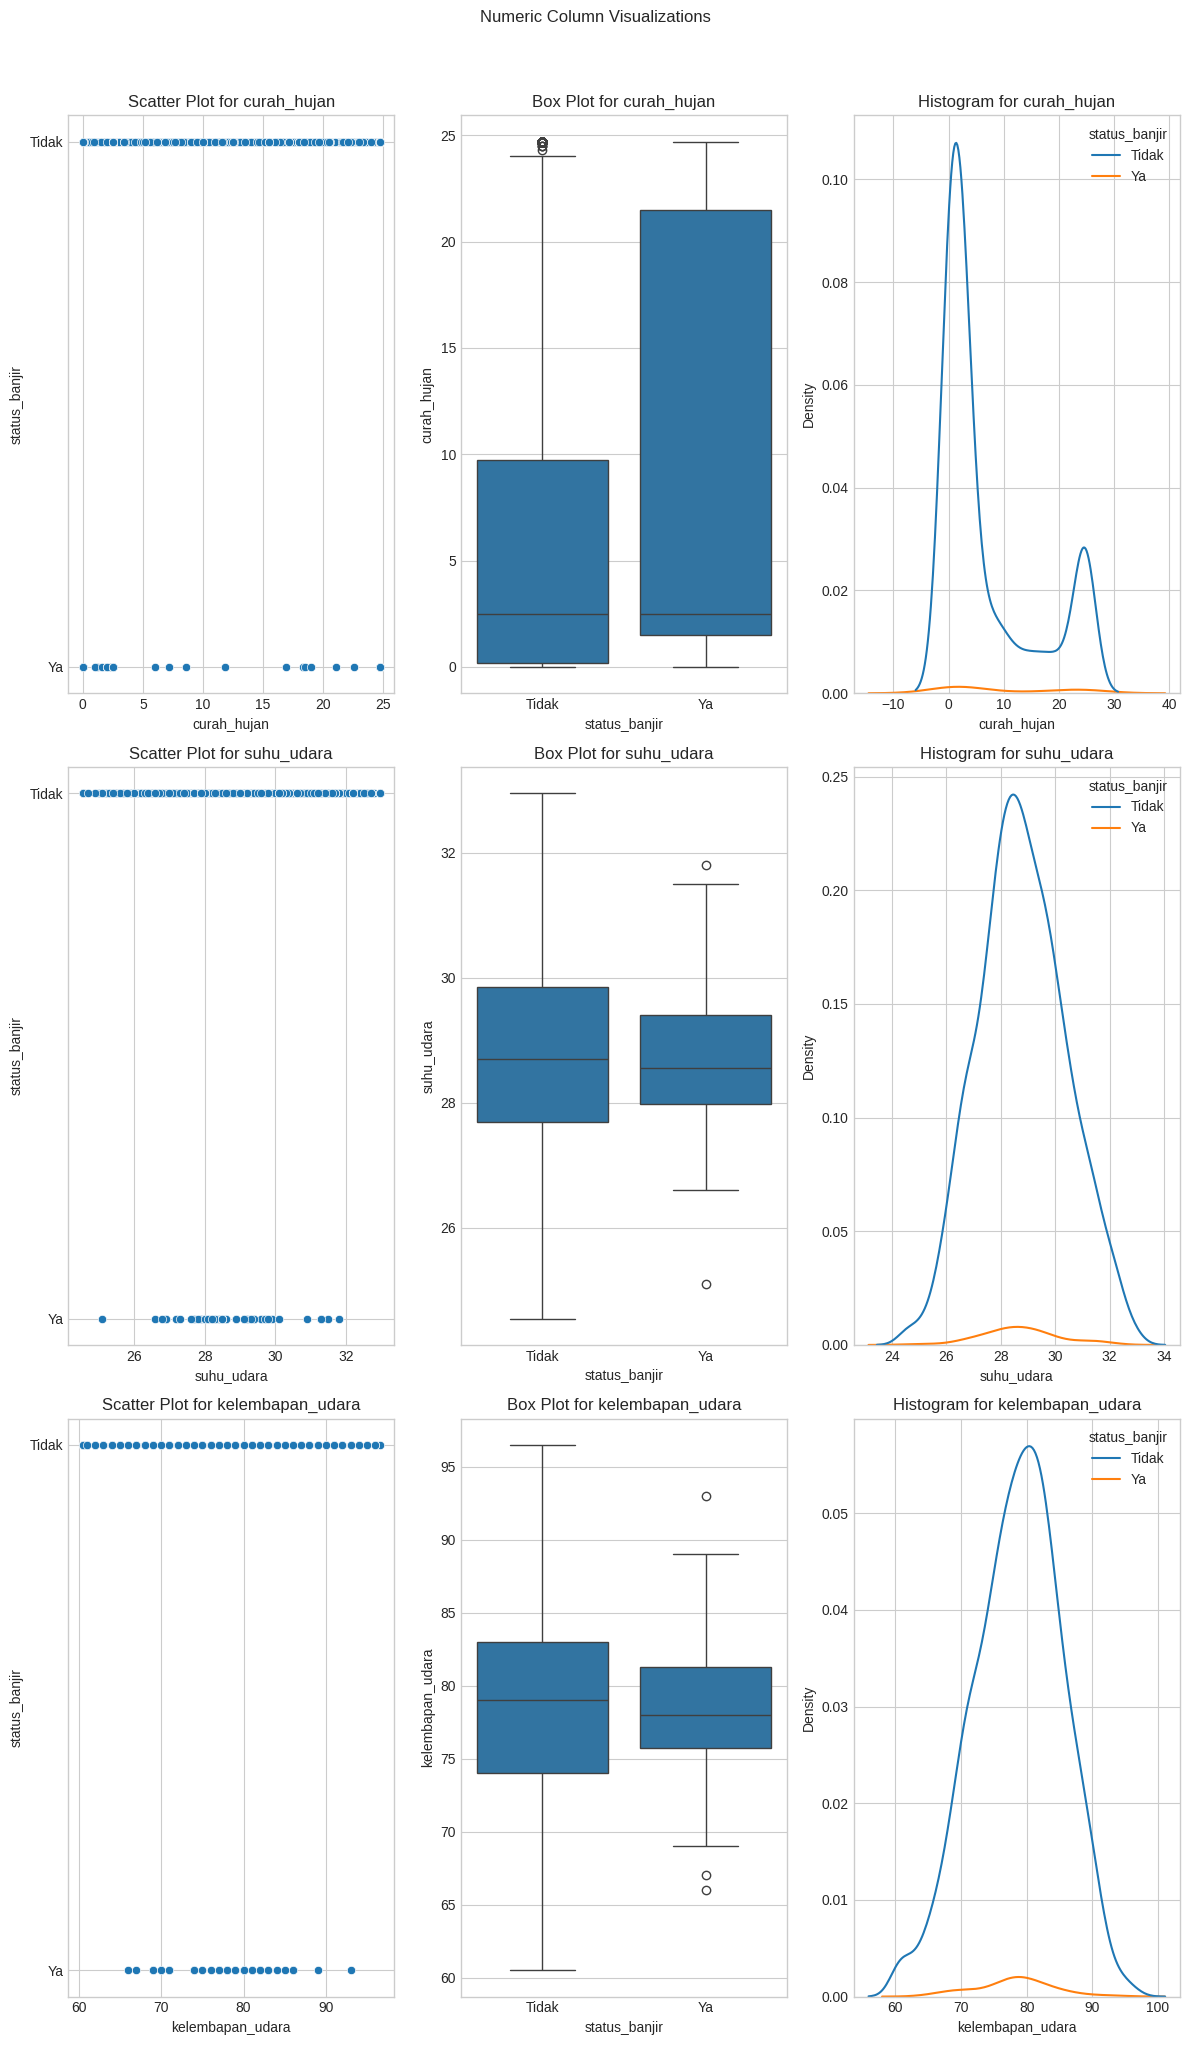

In [ ]:
def plot_numeric_visualizations(df, numeric_columns):

    # Create subplots
    fig, axes = plt.subplots(len(numeric_columns), 3, figsize=(12, 20))
    fig.suptitle('Numeric Column Visualizations', y=1.02)

    for i, column in enumerate(numeric_columns):
        # Scatter Plot
        sns.scatterplot(x=column, y='status_banjir', data=df, ax=axes[i, 0])
        axes[i, 0].set_title(f'Scatter Plot for {column}')

        # Box Plot
        sns.boxplot(x='status_banjir', y=column, data=df, ax=axes[i, 1])
        axes[i, 1].set_title(f'Box Plot for {column}')

        # Histogram
        sns.kdeplot(data=df, x=column,hue='status_banjir',ax=axes[i, 2])
        axes[i, 2].set_title(f'Histogram for {column}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

plot_numeric_visualizations(df, df_numeric.columns)

### Analisis Kategorikal
Analisis kategorikal melibatkan pemeriksaan distribusi dari variabel kategorikal dalam dataset.

In [ ]:
df_categoric.head()

status_banjir
0         Tidak
1         Tidak
2         Tidak
3         Tidak
4         Tidak

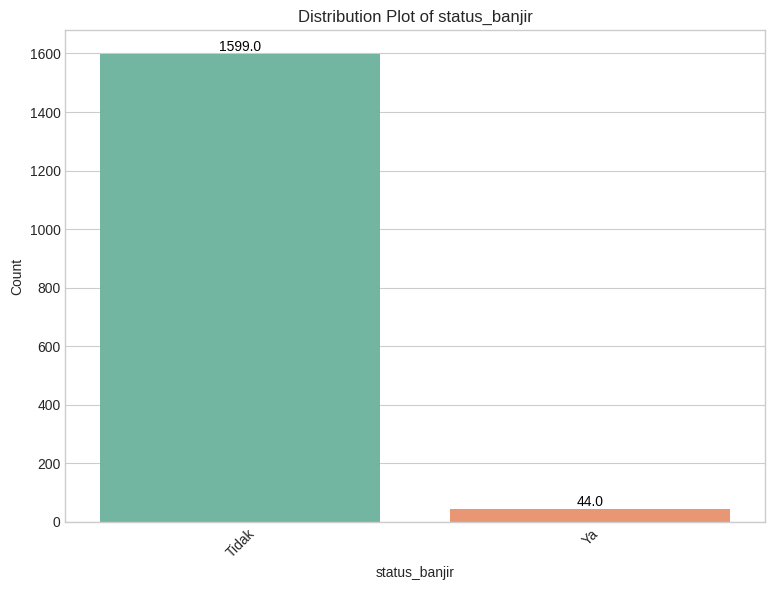

In [ ]:
def plot_categorical_distributions(df, cat_cols, nrows=1, ncols=2, figsize=(15, 6)):

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)

    # Flatten axes if necessary
    if nrows * ncols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    # Plot bar plots for each categorical feature
    for i, column in enumerate(cat_cols):
        if i < len(axes):
            sns.countplot(data=df, x=column, ax=axes[i], palette='Set2')
            axes[i].set_title(f'Distribution Plot of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Count')
            axes[i].tick_params(axis='x', rotation=45)

            # Add annotations on the bars
            for p in axes[i].patches:
                axes[i].annotate(f'{p.get_height()}',
                                 (p.get_x() + p.get_width() / 2., p.get_height()),
                                 ha='center', va='center', fontsize=10, color='black',
                                 xytext=(0, 5), textcoords='offset points')

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()

plot_categorical_distributions(df, df_categoric.columns, nrows=1, ncols=2)

Terlihat bahwa distribusi kelas pada variabel status banjir ini tidak seimbang, ketidakseimbangan ini perlu diperhatikan karena dapat mempengaruhi kemampuan model untuk memprediksi kelas minoritas secara akurat.

## Modelling
Pada tahap ini, dilakukan proses pemodelan untuk memprediksi potensi banjir berdasarkan data cuaca yang telah dikumpulkan dan diproses.

### Feature Engineering
Pada tahap ini, dilakukan pemilihan fitur yang relevan untuk pemodelan. Variabel `tanggal` dihapus karena yang akan digunakan sebagai fitur hanyalah tiga variabel cuaca (`curah_hujan`, `suhu_udara`, `kelembapan_udara`) dan `status_banjir` sebagai target klasifikasi.


In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Skripsi/Dataset/df_cleaned.csv')

# Drop the 'tanggal' column from the DataFrame
df = df.drop('tanggal', axis=1)  # Specify axis=1 for column drop

# Display the first five rows of the modified DataFrame
df.head()

curah_hujan  suhu_udara  kelembapan_udara status_banjir
0         0.00       27.60             81.00         Tidak
1         0.00       27.50             81.00         Tidak
2         2.50       27.40             86.00         Tidak
3         3.50       26.00             90.00         Tidak
4         1.70       27.00             85.00         Tidak

### Feature Encoding
Untuk mengubah variabel target `status_banjir` menjadi format numerik, digunakan `LabelEncoder`. Hasil encoding menghasilkan nilai biner dengan 0 untuk `tidak` (tidak banjir) dan 1 untuk `ya` (banjir).

In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengubah data kategorikal menjadi data numerik
df['status_banjir'] = label_encoder.fit_transform(df['status_banjir'])
df.head()

curah_hujan  suhu_udara  kelembapan_udara  status_banjir
0         0.00       27.60             81.00              0
1         0.00       27.50             81.00              0
2         2.50       27.40             86.00              0
3         3.50       26.00             90.00              0
4         1.70       27.00             85.00              0

In [ ]:
# Melihat label-label yang terkait dengan setiap nilai numerik
label_mapping = dict(zip(label_encoder.classes_,
                         label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Tidak': 0, 'Ya': 1}


### Correlation Analysis
Analisis korelasi dilakukan untuk memahami hubungan antara variabel cuaca dan status banjir.

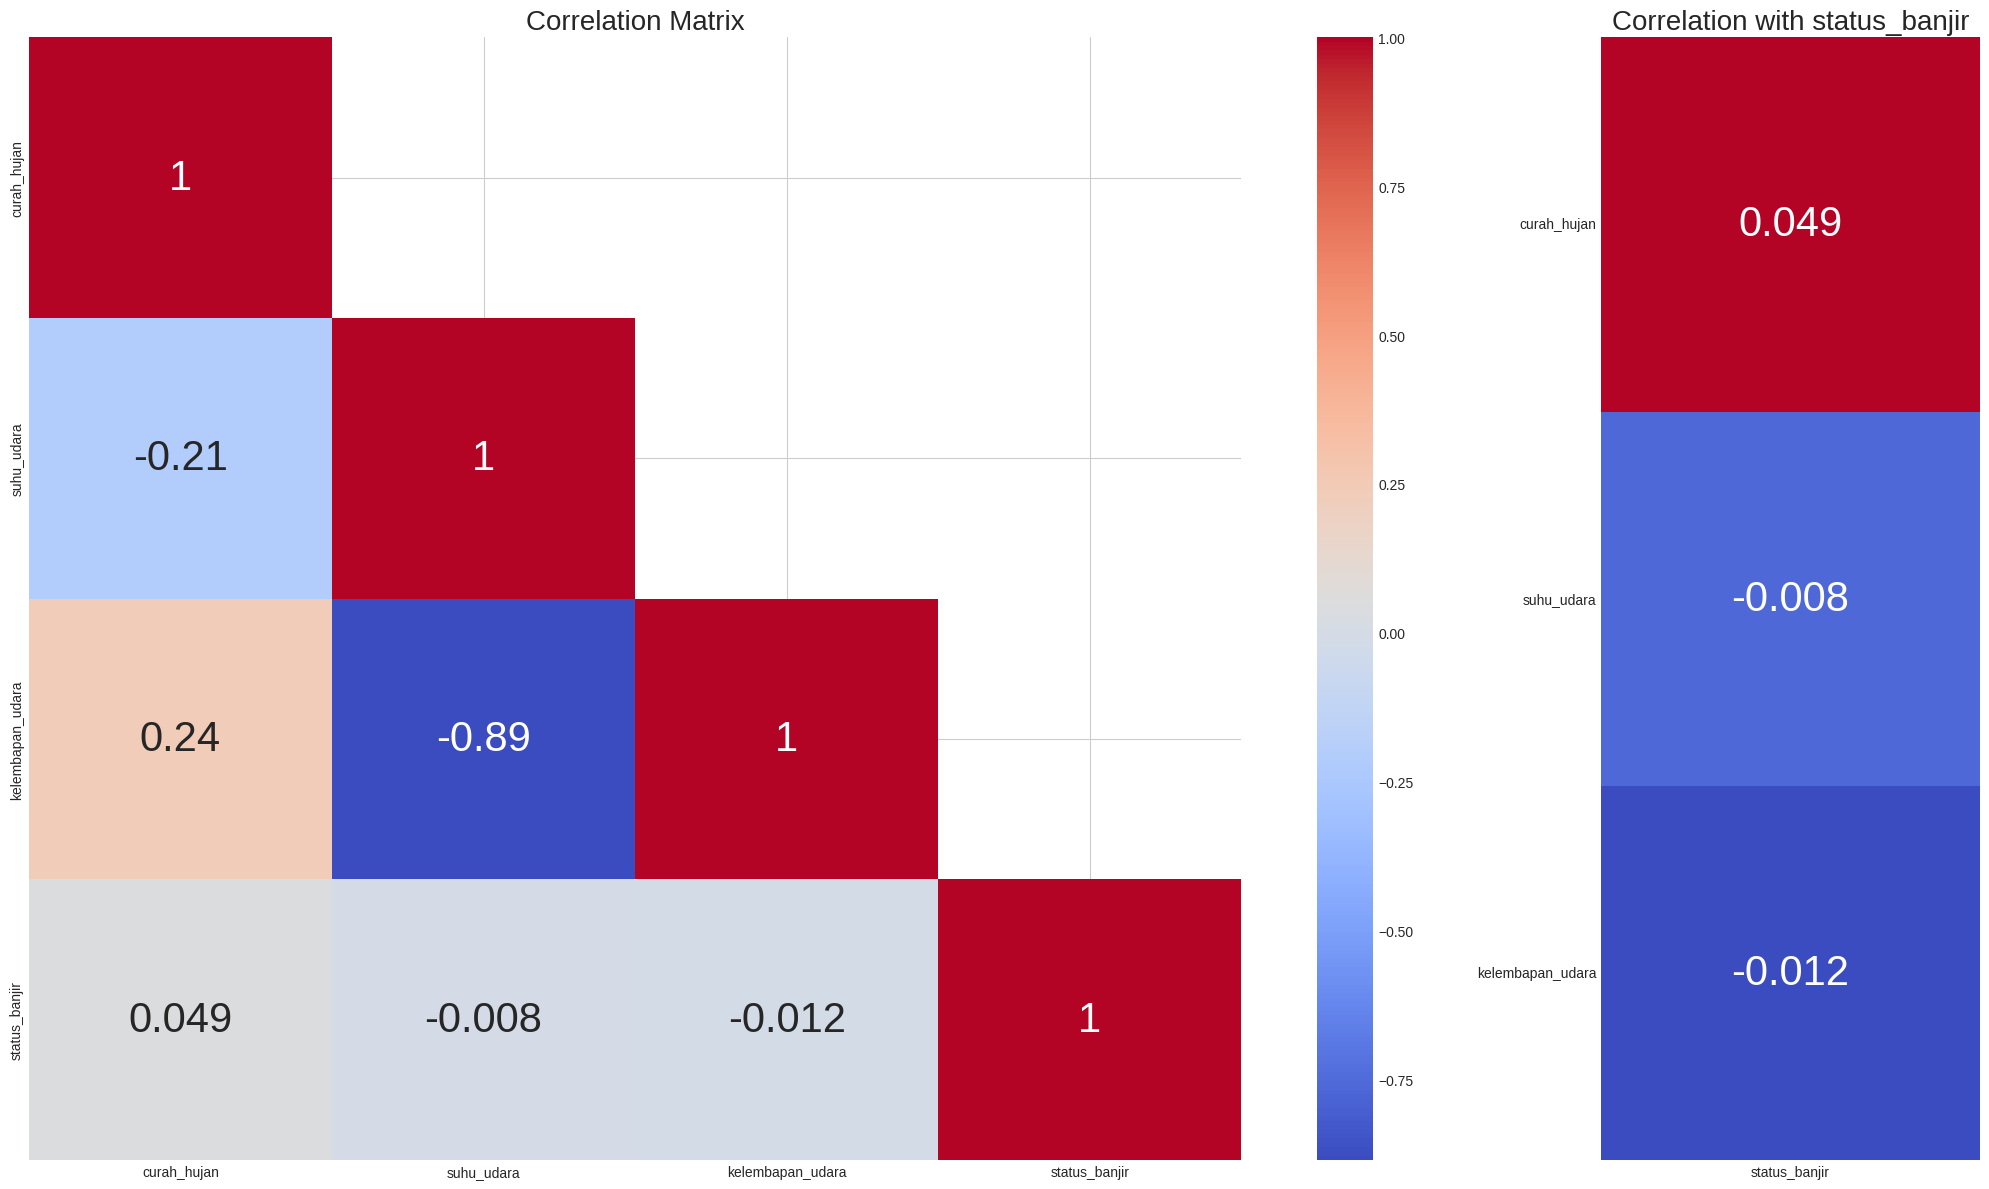

In [ ]:
# Correlation matrix
correlation_matrix = df.corr().round(3)

# Correlation with 'status_banjir'
status_banjir_corr = correlation_matrix[['status_banjir']].drop('status_banjir')

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 12), gridspec_kw={'width_ratios': [4, 1]})

# Heatmap for the entire correlation matrix
sns.heatmap(correlation_matrix, mask=np.triu(correlation_matrix, 1), annot=True, annot_kws={"size": 30}, cmap='coolwarm', ax=ax1)
ax1.set_title('Correlation Matrix', fontsize=20)

# Heatmap bar for 'status_banjir'
sns.heatmap(status_banjir_corr, annot=True, annot_kws={"size": 30}, cmap='coolwarm', cbar=False, ax=ax2)
ax2.set_title('Correlation with status_banjir', fontsize=20)
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

Berikut adalah penjelasan untuk heatmap korelasi ketiga parameter cuaca terhadap variabel status banjir:
- **Curah Hujan**: Nilai korelasi sebesar 0.049 menunjukkan adanya hubungan positif yang lemah antara curah hujan dan kejadian banjir.
- **Suhu Udara**: Nilai korelasi sebesar -0.008 menunjukkan adanya hubungan negatif yang sangat lemah antara suhu udara dan kejadian banjir.
- **Kelembapan Udara**: Nilai korelasi sebesar -0.012 menunjukkan adanya hubungan negatif yang sangat lemah antara kelembapan udara dan kejadian banjir.

### Pemisahan Fitur dan Target
Fitur (`curah_hujan`, `suhu_udara`, `kelembapan_udara`) dipisahkan dari target (`status_banjir`) untuk keperluan pemodelan.

In [ ]:
X = df.drop('status_banjir', axis=1)   # Variabel prediktor / fitur
y = df['status_banjir']                # Variabel target

### Penyeimbangan Kelas
Karena kelas `banjir` merupakan kelas minoritas, dilakukan penyeimbangan kelas menggunakan metode SMOTE (Synthetic Minority Over-sampling Technique) untuk meningkatkan jumlah sampel pada kelas minoritas.

In [ ]:
# Melakukan resampling data untuk mengatasi ketimpangan data
counter_before = Counter(y)
print('Before',counter_before)

#SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter_after = Counter(y)
print('After',counter_after)

Before Counter({0: 1600, 1: 43})
After Counter({0: 1600, 1: 1600})


In [ ]:
# Data untuk pie chart sebelum resampling
labels_before = list(counter_before.keys())
values_before = list(counter_before.values())

# Data untuk pie chart setelah resampling
labels_after = list(counter_after.keys())
values_after = list(counter_after.values())

# Keterangan Label Mapping
label_mapping = {'Tidak Banjir': 0, 'Banjir': 1}
label_mapping_str = ', '.join([f"{k}: {v}" for k, v in label_mapping.items()])

# Membuat subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Before Resampling', 'After Resampling'])

# Pie chart sebelum resampling
fig.add_trace(go.Pie(labels=labels_before, values=values_before, name='Before Resampling'), 1, 1)
fig.update_traces(textinfo='label+percent', hoverinfo='label+value')

# Pie chart setelah resampling
fig.add_trace(go.Pie(labels=labels_after, values=values_after, name='After Resampling'), 1, 2)
fig.update_traces(textinfo='label+percent', hoverinfo='label+value')

# Layout dan tampilan
fig.update_layout(title_text='Class Distribution Before and After SMOTE Resampling',
                  annotations=[dict(text=f"Label Mapping: {label_mapping_str}",
                                    showarrow=False, x=0.5, y=-0.15, font=dict(size=10))])

fig.show()

### Pembagian Data Train dan Test
Dataset dibagi menjadi data train dan test dengan proporsi 80% untuk train dan 20% untuk test. Pembagian ini dilakukan untuk memastikan model dapat diuji dengan data yang belum pernah dilihat sebelumnya.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengecek shape train_X, test_X, train_y, dan test_y
print("train_X (baris, kolom): ", X_train.shape)
print("test_X (baris, kolom): ", X_test.shape)
print("train_y (baris, kolom): ", y_train.shape)
print("test_y (baris, kolom): ", y_test.shape)

train_X (baris, kolom):  (2560, 3)
test_X (baris, kolom):  (640, 3)
train_y (baris, kolom):  (2560,)
test_y (baris, kolom):  (640,)


### Function

In [ ]:
# Create the confussion matrix
def make_confusion_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    categories = ['Tidak Banjir','Banjir']

    sns.heatmap(cm, annot=labels, fmt='', xticklabels=categories, yticklabels=categories)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
# Calculate the points in the ROC curve
def plot_roc_curve(y_test, y_pred):

    ''' Plot the ROC curve for the target labels and predictions'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
# Menampilkan nilai evaluasi dari model
def evaluate_model(model_name, test_y, y_pred):

    accuracy = accuracy_score(test_y, y_pred)
    precision = precision_score(test_y, y_pred)
    recall = recall_score(test_y, y_pred)
    f1 = f1_score(test_y, y_pred)
    roc_auc = roc_auc_score(test_y, y_pred)

    evaluation_data = {
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Recall': [recall],
        'Precision': [precision],
        'F1 Score': [f1],
        'AUC': [roc_auc]
    }

    evaluation_df = pd.DataFrame(evaluation_data)

    return evaluation_df

# Menyimpan hasil evaluasi model
resultsDict={}

In [ ]:
# Menampilkan plot feature importance
def plot_feature_importance(feature_importance, feature_names, title='Feature Importance', colorscale='viridis'):
    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame(list(zip(feature_names, feature_importance)),
                                         columns=['Feature', 'Importance'])

    # Sort DataFrame by Importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

    # Create a bar plot using Plotly with random colors
    fig = go.Figure(go.Bar(
        x=feature_importance_df['Importance'],
        y=feature_importance_df['Feature'],
        orientation='h',
        marker=dict(color=feature_importance_df['Importance'],
                    colorscale=colorscale, cmin=0,
                    cmax=max(feature_importance_df['Importance']),
                    colorbar=dict(title='Importance')),
    ))

    fig.update_layout(
        title=title,
        xaxis=dict(title='Importance'),
        yaxis=dict(title='Feature'),
        height=600,
        width=1000,
    )

    fig.show()

### CatBoost Model
Model CatBoost digunakan untuk pemodelan. Berikut adalah hasil evaluasi awal model:
- **Accuracy Score**: 0.94
- **F1 Score**: 0.94

In [ ]:
# Inisialisasi model catboost
cb_model = CatBoostClassifier(iterations=2000, eval_metric = "AUC", verbose=0)
cb_model.fit(X_train, y_train)

# Mendapatkan prediksi dari model yang telah dilatih
y_pred = cb_model.predict(X_test)

# Evaluasi Model
print("Analysis Model Catboost Classifier")
print("")
print("Analysis Metric Error Model Training")

target_names = label_encoder.classes_
print(classification_report(y_test, y_pred, target_names=target_names))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))

resultsDict['Catboost'] = evaluate_model("Catboost", y_test, y_pred)

Analysis Model Catboost Classifier

Analysis Metric Error Model Training
              precision    recall  f1-score   support

       Tidak       0.95      0.95      0.95       340
          Ya       0.94      0.94      0.94       300

    accuracy                           0.95       640
   macro avg       0.95      0.95      0.95       640
weighted avg       0.95      0.95      0.95       640

Confusion Matrix:
[[322  18]
 [ 17 283]]
Accuracy Score:  0.9453125
F1 Score:  0.9453177264696297


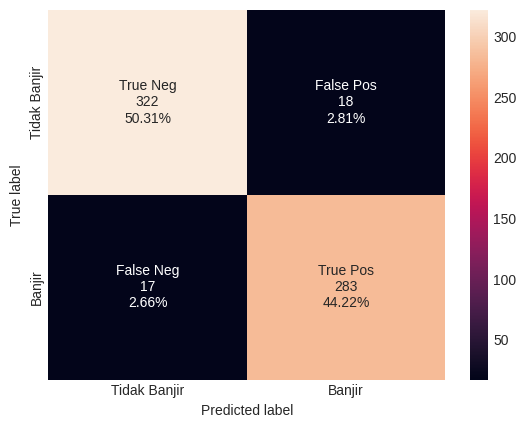

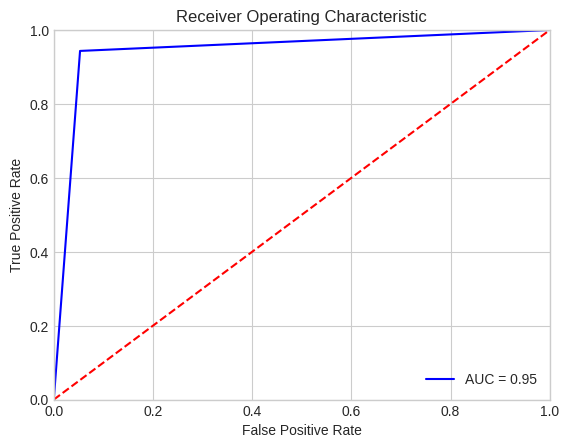

In [ ]:
# Visualisasi hasil kinerja model
make_confusion_matrix(y_test, y_pred)
print("")
plot_roc_curve(y_test, y_pred)

In [ ]:
# Visualisasi Feature Importance
feature_importance = cb_model.feature_importances_  # Example feature importance values
feature_names = df.columns  # Example feature names
title = "Feature Importance for CatBoost Classifier"
plot_feature_importance(feature_importance, feature_names, title=title)

Feature importance pada model CatBoost menunjukkan bahwa variabel `kelembapan_udara` memiliki pengaruh paling tinggi. Hal ini berbeda dengan analisis korelasi yang menunjukkan `curah_hujan` sebagai variabel paling berpengaruh. Perbedaan ini disebabkan oleh kemampuan model CatBoost untuk menangkap hubungan non-linear yang mungkin tidak terlihat dalam analisis korelasi sederhana.

### CatBoost Model With GridSearchCV (Hyperparameter Tuning)
Setelah dilakukan tuning hyperparameter menggunakan GridSearchCV, berikut adalah hasil evaluasi model yang telah dioptimalkan:
- **Accuracy Score**: 0.96
- **F1 Score**: 0.96

In [ ]:
skf = StratifiedKFold(n_splits = 3)

cb = CatBoostClassifier(boosting_type='Ordered',
                         one_hot_max_size = 6)

params = {'iterations': [2000],
          'depth': [4, 5, 6],
          'loss_function': ['Logloss', 'CrossEntropy'],
          'learning_rate': [0.1,0.03,0.01],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
          'eval_metric': ['AUC'],
          'logging_level':['Silent'],
          'random_seed': [42]
         }

cb_grid = GridSearchCV(estimator = cb,
                        param_grid = params,
                        scoring = 'roc_auc',
                        cv = skf,
                        n_jobs=-1,
                        verbose = 1)
cb_grid.fit(X_train, y_train)

print('Best score:', cb_grid.best_score_)
print('Best param:', cb_grid.best_params_)

best_cb = cb_grid.best_estimator_
print("Best model: ",best_cb)

y_pred = cb_grid.predict(X_test)

# Evaluasi Model
print("Analysis Model CatBoost GridSearch")
print("")
print("Analysis Metric Error Model Training")

target_names = label_encoder.classes_
print(classification_report(y_test, y_pred, target_names=target_names))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))

resultsDict['CatBoost GridSearch'] = evaluate_model("CatBoost GridSearch",
                                                    y_test, y_pred)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



Best score: 0.9887944960447115
Best param: {'depth': 5, 'eval_metric': 'AUC', 'iterations': 2000, 'l2_leaf_reg': 1e-19, 'leaf_estimation_iterations': 10, 'learning_rate': 0.1, 'logging_level': 'Silent', 'loss_function': 'Logloss', 'random_seed': 42}
Best model:  <catboost.core.CatBoostClassifier object at 0x7c2ef8c0e9e0>
Analysis Model CatBoost GridSearch

Analysis Metric Error Model Training
              precision    recall  f1-score   support

       Tidak       0.96      0.96      0.96       340
          Ya       0.96      0.96      0.96       300

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640

Confusion Matrix:
[[327  13]
 [ 12 288]]
Accuracy Score:  0.9609375
F1 Score:  0.9609412331925924


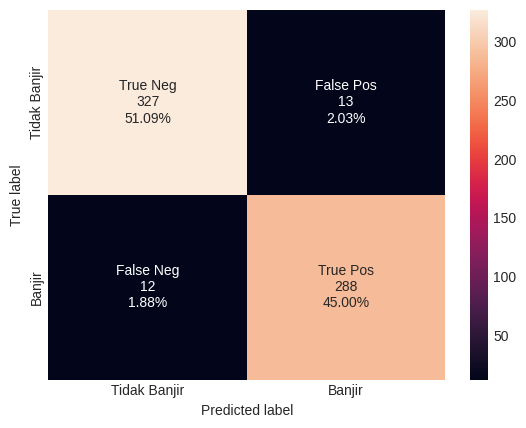

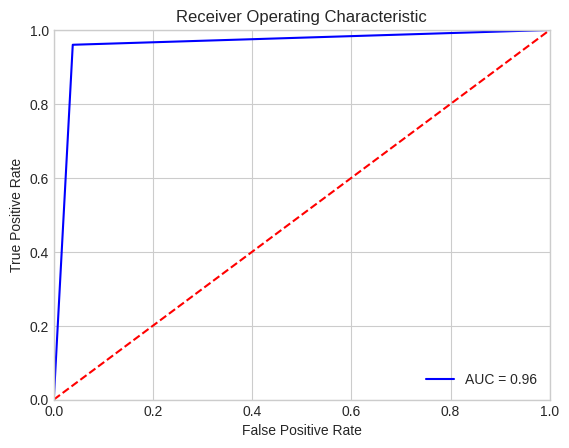

In [ ]:
# Visualisasi hasil kinerja model
make_confusion_matrix(y_test, y_pred)
print("")
plot_roc_curve(y_test, y_pred)

## Evaluation

In [ ]:
# Membuat DataFrame dari dictionary
results_df = pd.concat([pd.DataFrame(v).set_index('Model') for v
                        in resultsDict.values()], axis=0)

# Define a function to highlight maximum values for other columns
def highlight_min_max(col):
        is_max = col == col.max()    # Semakin besar nilainya semakin baik
        return ['background-color: #09b310' if v else '' for v in is_max]

# Apply the function to the entire DataFrame
styled_df = results_df.style.apply(highlight_min_max)

# Display the styled DataFrame
styled_df

Berdasarkan perbandingan metrik evaluasi antara model CatBoost sebelum dan sesudah tuning, ditemukan bahwa model CatBoost yang telah dioptimalkan memberikan kinerja yang lebih baik:
- **Accuracy**: 0.96, menunjukkan model memiliki tingkat akurasi yang sangat tinggi dalam memprediksi kejadian banjir.
- **Precision**: 0.96, menunjukkan model memiliki tingkat ketepatan yang sangat baik dalam mengidentifikasi kejadian banjir.
- **Recall**: 0.96, menunjukkan model mampu mendeteksi sebagian besar kejadian banjir dengan benar.
- **F1 Score**: 0.96, menunjukkan keseimbangan antara precision dan recall yang sangat baik.
- **AUC Score**: 0.96, menunjukkan model memiliki kemampuan yang sangat baik dalam membedakan antara kejadian banjir dan tidak-banjir.

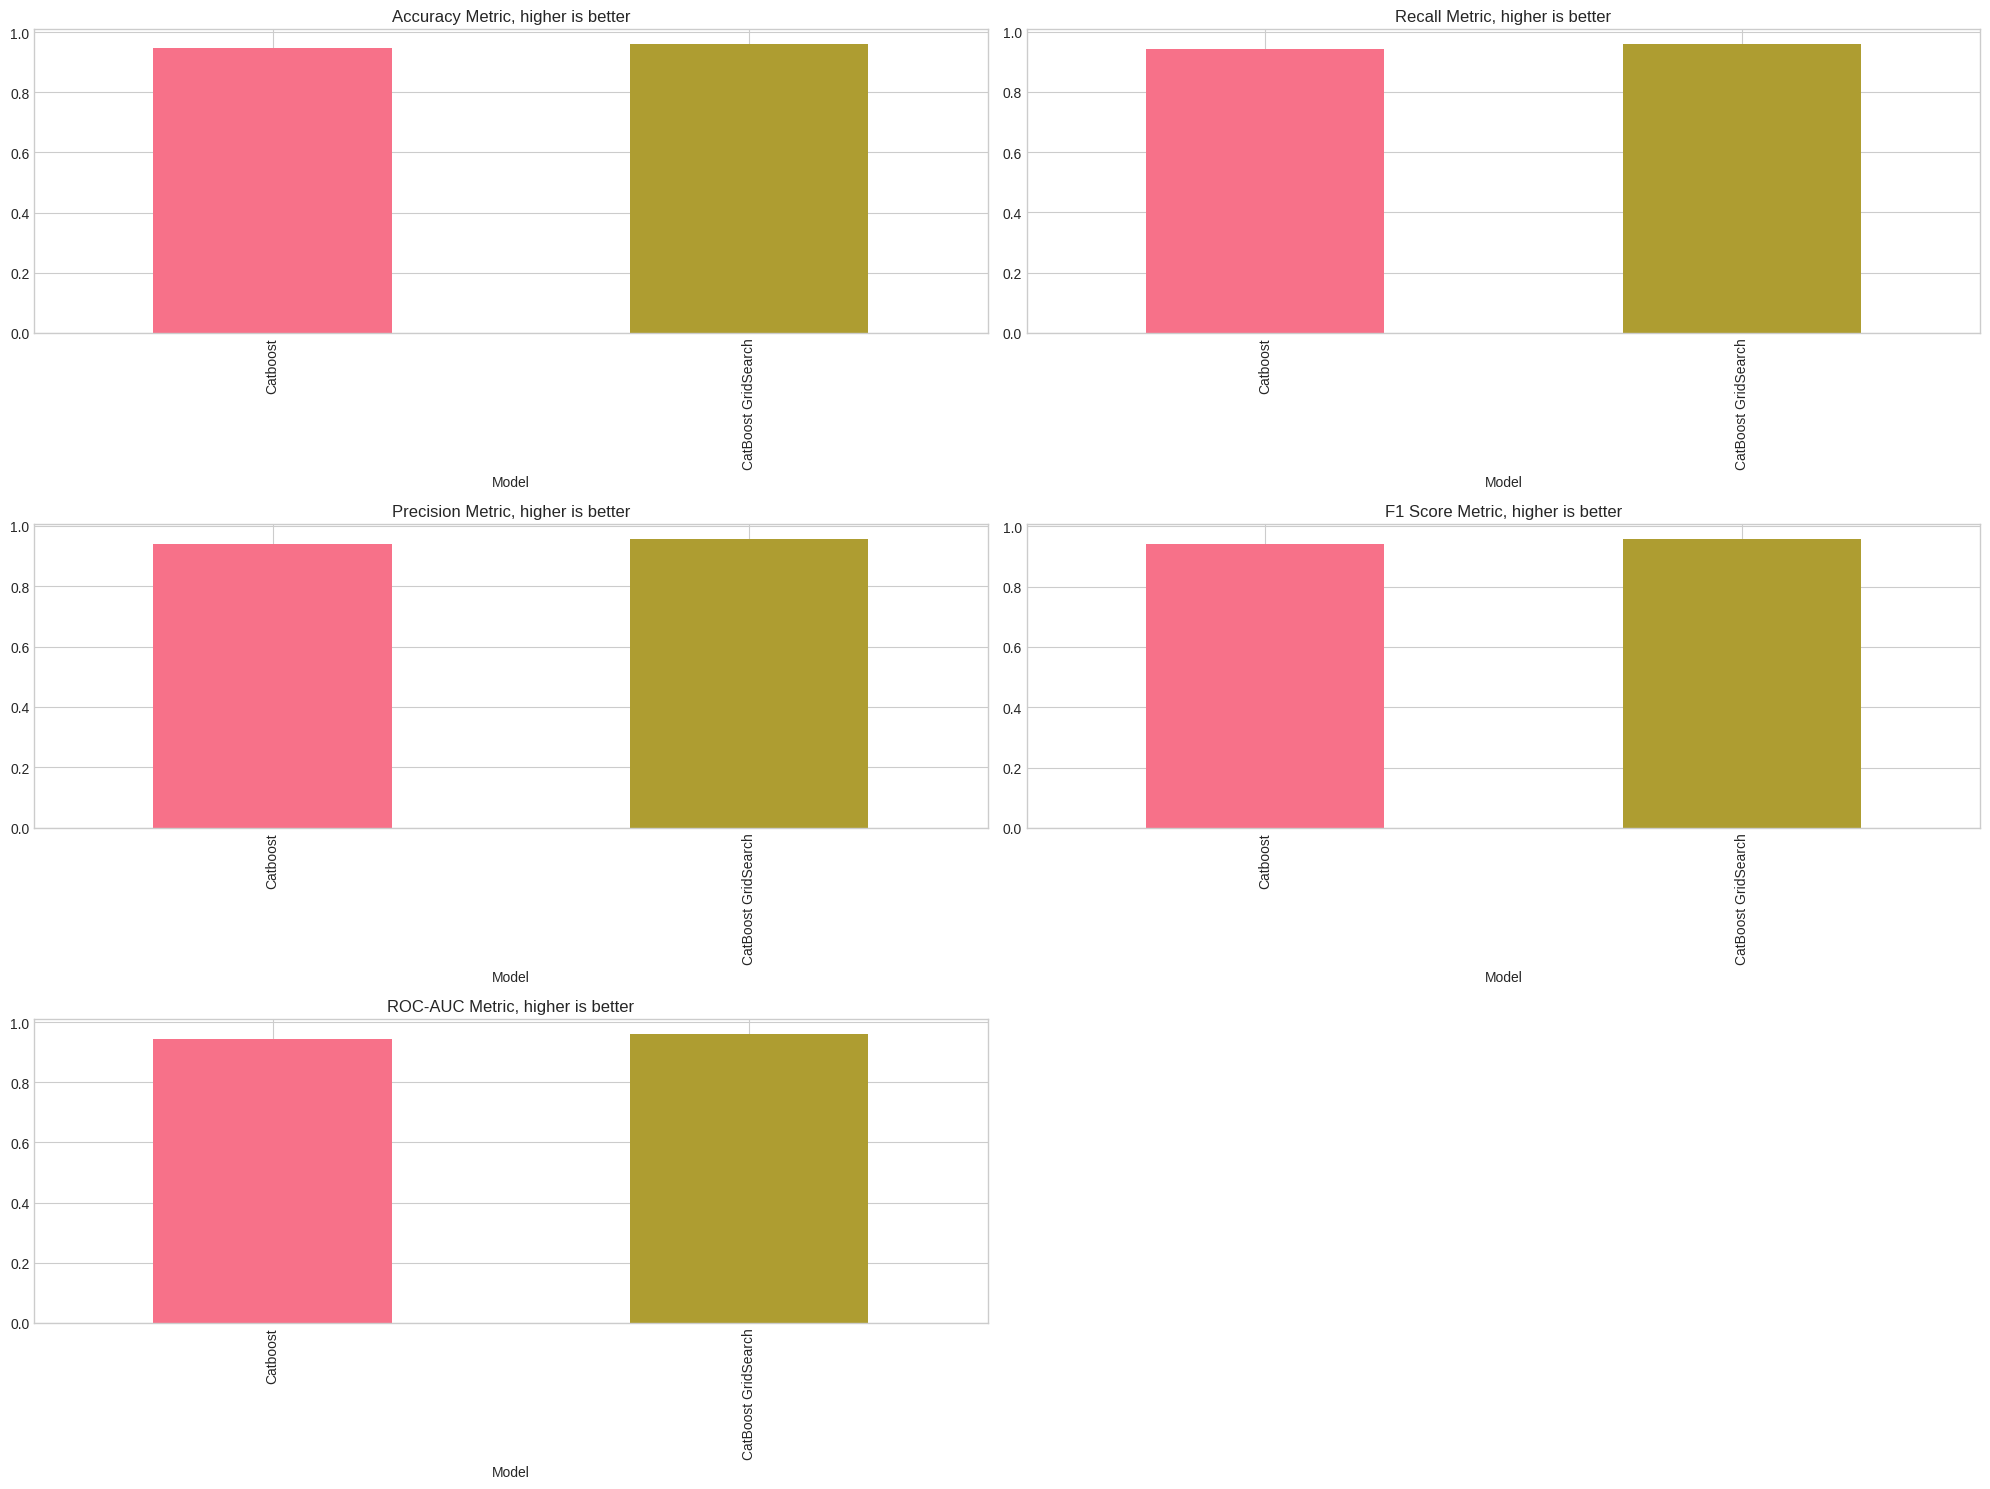

In [ ]:
def bar_metrics(results_df):
    df = results_df.copy()

    # Definisikan palet warna
    palette = sns.color_palette("husl", n_colors=len(df.columns))

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

    # Accuracy plot
    df.sort_values(by='Accuracy').plot(kind="bar", y='Accuracy',
                                       color=palette, ax=axes[0, 0],
                                       legend=False)
    axes[0, 0].set_title("Accuracy Metric, higher is better")

    # Recall plot
    df.sort_values(by='Recall').plot(kind="bar", y='Recall',
                                     color=palette, ax=axes[0, 1],
                                     legend=False)
    axes[0, 1].set_title("Recall Metric, higher is better")

    # Precision plot
    df.sort_values(by='Precision').plot(kind="bar", y='Precision',
                                        color=palette, ax=axes[1, 0],
                                        legend=False)
    axes[1, 0].set_title("Precision Metric, higher is better")

    # F1 Score plot
    df.sort_values(by='F1 Score').plot(kind="bar", y='F1 Score',
                                       color=palette, ax=axes[1, 1],
                                       legend=False)
    axes[1, 1].set_title("F1 Score Metric, higher is better")

    # ROC-AUC plot
    df.sort_values(by='ROC-AUC').plot(kind="bar", y='ROC-AUC',
                                      color=palette, ax=axes[2, 0],
                                      legend=False)
    axes[2, 0].set_title("ROC-AUC Metric, higher is better")

    # Hapus axis terakhir
    fig.delaxes(axes[2, 1])

    plt.tight_layout()
    plt.show()

# Panggil fungsi bar_metrics dengan DataFrame hasil evaluasi model Anda
bar_metrics(results_df)

Hasil evaluasi ini menegaskan bahwa model CatBoost yang telah di-tuning lebih unggul dalam semua metrik dibandingkan dengan model sebelum tuning, sehingga lebih andal untuk digunakan dalam prediksi banjir.

## Deployment
Setelah model berhasil dibangun dan dievaluasi, langkah selanjutnya adalah deployment untuk penggunaan prediksi di dunia nyata.

### Simpan Model
Model yang telah dioptimalkan akan disimpan untuk digunakan kembali tanpa perlu melatih ulang. Proses ini mencakup menyimpan model dalam format yang sesuai, misalnya dengan menggunakan `joblib` atau `pickle`.

In [ ]:
# Simpan model terbaik
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

model = cb_grid  # Model CatBoost GridSearch Classifier
filename= 'catboost_model.pkl'
save_model(model, filename)
print(f'Model saved to {filename}')

Model saved to cb_grid.pkl


### Prediksi Data Baru
Model yang telah disimpan dapat digunakan untuk memprediksi data baru. Langkah ini melibatkan pemuatan model yang telah disimpan dan penggunaan model tersebut untuk melakukan prediksi terhadap data cuaca yang baru.

In [ ]:
# Fungsi untuk memprediksi DataFrame menggunakan model yang telah dilatih
def predict_dataframe(dataframe, model_path):
    # Load model yang sudah disimpan dengan pickle
    with open(model_path, 'rb') as file:
        model = pickle.load(file)

    # Melakukan prediksi
    predictions = model.predict(dataframe)

    # Menambahkan kolom prediksi ke DataFrame asli
    dataframe['prediksi_status_banjir'] = predictions

    return dataframe

In [ ]:
# Define the number of data points to generate
num_data_points = 1000

# Generate random data for each feature
new_df = pd.DataFrame({
        "curah_hujan": np.random.uniform(0, 100, num_data_points),
        "suhu_udara": np.random.uniform(0, 40, num_data_points),
        "kelembapan_udara": np.random.uniform(0, 100, num_data_points),
})

# Path model yang telah Anda latih dan simpan sebelumnya
model_path = '/content/cb_grid.pkl'

# Memanggil fungsi predict_dataframe untuk memprediksi DataFrame
predictions_df = predict_dataframe(new_df, model_path)

# Menampilkan DataFrame dengan hasil prediksi
predictions_df.head()

curah_hujan  suhu_udara  kelembapan_udara  prediksi_status_banjir
0        91.36       27.66             88.92                       0
1         2.15        4.16              3.07                       0
2        76.55        3.94             81.20                       0
3        65.50        9.34             22.05                       0
4        46.52        8.81             57.23                       0

In [ ]:
check_data(predictions_df)

columns  null_val  unique_val   dtypes
0             curah_hujan         0        1000  float64
1              suhu_udara         0        1000  float64
2        kelembapan_udara         0        1000  float64
3  prediksi_status_banjir         0           2    int64

# D. Prediksi Cuaca (LSTM)
Selain memprediksi potensi terjadinya banjir, kita juga dapat melakukan prediksi cuaca dengan menggunakan algoritma Deep Learning. Metode yang digunakan untuk prediksi ini adalah forecast time series dengan model Long Short-Term Memory (LSTM). LSTM adalah jenis Recurrent Neural Network (RNN) yang dirancang khusus untuk menangani masalah time series dan data berurutan. Model ini memiliki kemampuan untuk mengingat informasi jangka panjang yang penting dalam data sekuensial, seperti pola cuaca dari waktu ke waktu.

### Langkah-Langkah
1. **Persiapan Data**
    - Mengambil data cuaca historis
    - Mengatur data dalam format time series
2. **Normalisasi Data**
    - Normalisasi fitur cuaca agar memiliki rentang yang sama untuk meningkatkan performa model
3. **Pemisahan Data Latih dan Uji**
    - Membagi data menjadi data latih dan uji untuk melatih model dan menguji performanya
4. **Pembentukan Dataset Berurutan**
    - Membentuk dataset berurutan untuk LSTM, dengan mengubah data menjadi windows yang dapat digunakan untuk prediksi
5. **Membangun dan Melatih Model LSTM**
    - Membangun arsitektur model LSTM dan melatihnya dengan data latih
6. **Evaluasi Model**
    - Mengevaluasi performa model dengan menggunakan data uji dan metrik evaluasi
7. **Prediksi dan Interpretasi**:
   - Menggunakan model terlatih untuk memprediksi data cuaca beberapa hari kedepan

## Import Library

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.8 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import numpy as np
import pandas as pd
from numpy import array
from numpy import hstack
import optuna
import os
import pickle
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import LSTM, GRU, Bidirectional, Dense, RepeatVector,TimeDistributed,Dropout, Flatten
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import Huber
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint

from keras.layers import Input
from tensorflow.keras.models import Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/df_cuaca_banjir_medan.csv")
df.head()

tanggal    tn    tx  tavg  rh_avg   rr   ss ddd_x ddd_car  ff_x ff_avg  \
0  2020-01-01  24.2  32.6  27.6    81.0  0.0  4.3   350      C    6.0      2   
1  2020-01-02  23.3  32.4  27.5    81.0  0.0  6.5   300      C    3.0      1   
2  2020-01-03  23.6  29.8  27.4    86.0  NaN  3.0   300      W    5.0      2   
3  2020-01-04  24.1  29.4  26.0    90.0  3.5  0.5   270      C    3.0      1   
4  2020-01-05  23.0  32.1  27.0    85.0  1.7  0.2   290      C    3.0      1   

       kejadian   kabupaten        provinsi  
0  Tidak Banjir  Kota Medan  Sumatera Utara  
1  Tidak Banjir  Kota Medan  Sumatera Utara  
2  Tidak Banjir  Kota Medan  Sumatera Utara  
3  Tidak Banjir  Kota Medan  Sumatera Utara  
4  Tidak Banjir  Kota Medan  Sumatera Utara

## Data Understanding
Pada tahap ini, kita akan memahami data cuaca historis yang akan digunakan untuk analisis dan pemodelan time series. Dataset berisikan tanggal, curah hujan, suhu udara rata-rata, dan kelembapan udara rata-rata. Memahami data ini penting untuk memastikan analisis yang akurat dan efektif.


In [ ]:
# List target kolom yang ingin digunakan
target_columns = ['tanggal', 'rr', 'tavg', 'rh_avg']
df = df[target_columns]

# Renaming the columns
df = df.rename(columns={
    'rr': 'curah_hujan',
    'tavg': 'suhu_udara',
    'rh_avg': 'kelembapan_udara',
})

features = ['curah_hujan', 'suhu_udara', 'kelembapan_udara']

df.head()

tanggal  curah_hujan  suhu_udara  kelembapan_udara
0  2020-01-01          0.0        27.6              81.0
1  2020-01-02          0.0        27.5              81.0
2  2020-01-03          NaN        27.4              86.0
3  2020-01-04          3.5        26.0              90.0
4  2020-01-05          1.7        27.0              85.0

## Data Preparation
Tahap ini mencakup persiapan data sebelum memasuki tahap analisis lebih lanjut dan pemodelan.

### Outlier Value
Untuk pemodelan time series, data yang mengandung outlier dapat mempengaruhi hasil analisis dan prediksi. Oleh karena itu, data yang mengandung outlier akan diubah menjadi nilai `NaN`.

In [ ]:
def handle_outliers_iqr(df, columns):
    for column_name in columns:
        if column_name in df.columns:
            Q1 = df[column_name].quantile(0.25)
            Q3 = df[column_name].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            df.loc[df[column_name] < lower_bound, column_name] = np.nan
            df.loc[df[column_name] > upper_bound, column_name] = np.nan
        else:
            print(f"Column '{column_name}' not found in DataFrame")

    return df

# Assuming df and features are already defined
df_model = handle_outliers_iqr(df, features)

df_model.head()

tanggal  curah_hujan  suhu_udara  kelembapan_udara
0  2020-01-01          0.0        27.6              81.0
1  2020-01-02          0.0        27.5              81.0
2  2020-01-03          NaN        27.4              86.0
3  2020-01-04          3.5        26.0              90.0
4  2020-01-05          1.7        27.0              85.0

### Missing Value
Setelah mengidentifikasi outlier dan mengubahnya menjadi `NaN`, langkah selanjutnya adalah menangani missing value. Metode yang digunakan adalah interpolasi linear untuk mengisi missing value agar data menjadi lebih lengkap dan kontinu.

In [ ]:
# Perform linear interpolation
df_model = df_model.interpolate(method='linear', limit_direction='forward', axis=0)

df_model.head()

tanggal  curah_hujan  suhu_udara  kelembapan_udara
0  2020-01-01         0.00        27.6              81.0
1  2020-01-02         0.00        27.5              81.0
2  2020-01-03         1.75        27.4              86.0
3  2020-01-04         3.50        26.0              90.0
4  2020-01-05         1.70        27.0              85.0

In [ ]:
def download_csv(df, filename):
  df.to_csv(filename, index=False)
  print(f"CSV file '{filename}' berhasil disimpan.")

download_csv(df_model, 'df_forecast.csv')

CSV file 'df_forecast.csv' berhasil disimpan.


## Exploratory Data Analysis (EDA)
Tahap ini melibatkan eksplorasi data untuk memahami pola, tren, dan karakteristik data cuaca.

### Decomposition Time Series
Analisis ini membantu dalam memahami komponen-komponen data time series:

1. **Observasi**: Data asli yang diamati.
2. **Trend**: Komponen yang menunjukkan tren jangka panjang dalam data.
3. **Seasonal**: Komponen yang menunjukkan pola musiman atau berulang.
4. **Residual**: Komponen yang menunjukkan noise atau variasi acak yang tidak dapat dijelaskan oleh trend atau seasonal.

In [ ]:
# Convert 'tanggal' column to datetime format
df['tanggal'] = pd.to_datetime(df['tanggal'])

# Set 'tanggal' column as the index
df.set_index('tanggal', inplace=True)

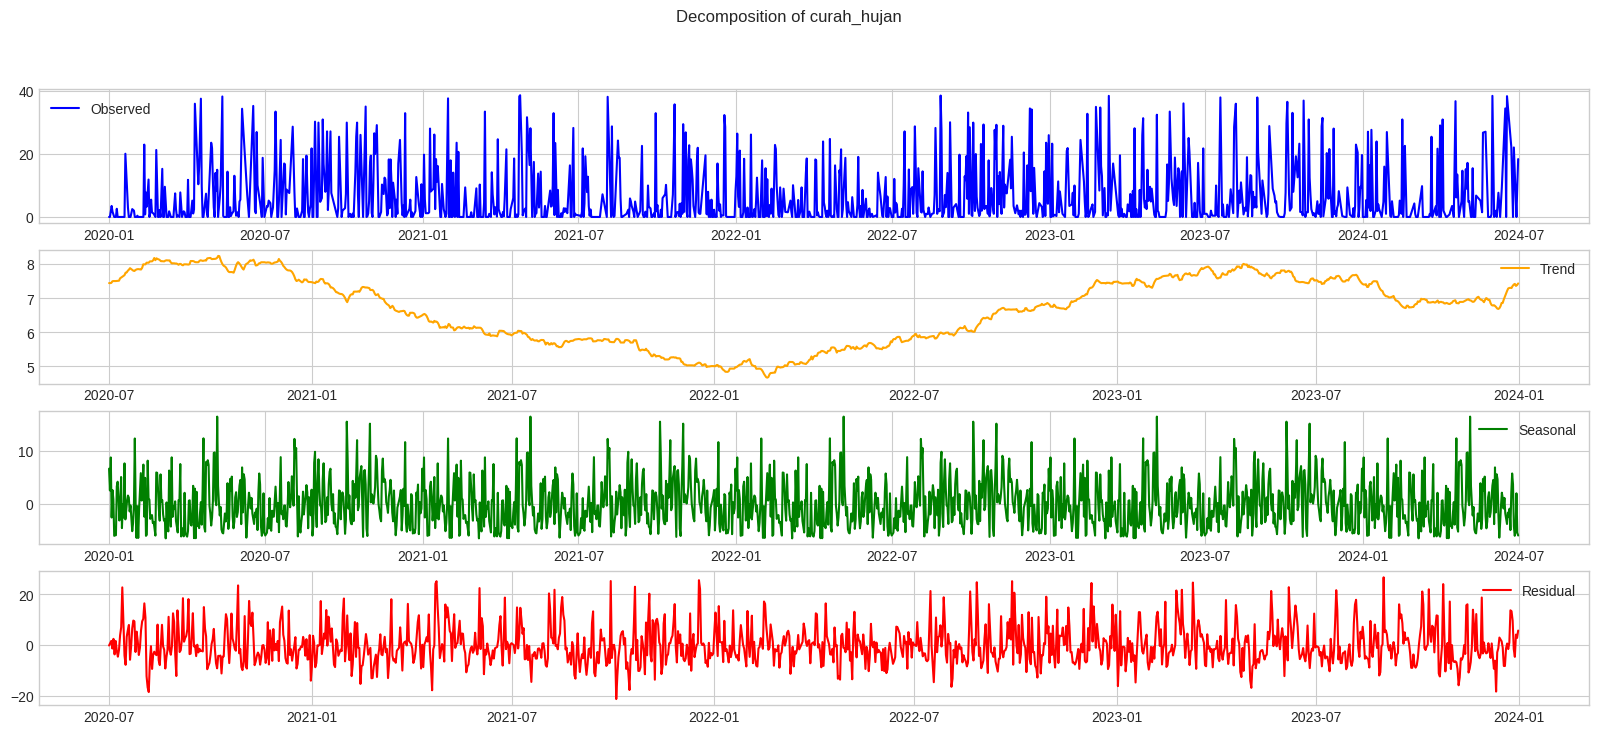

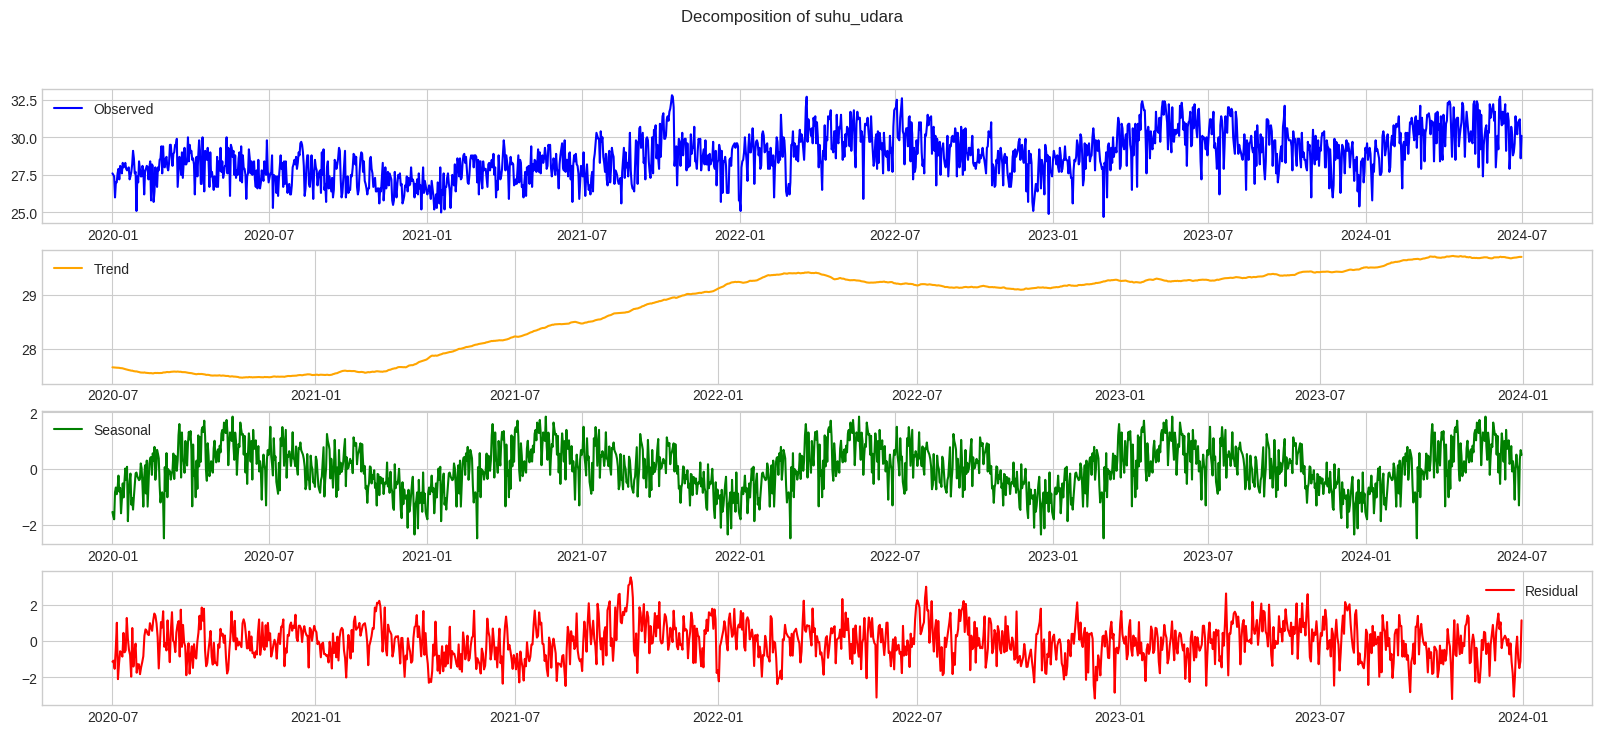

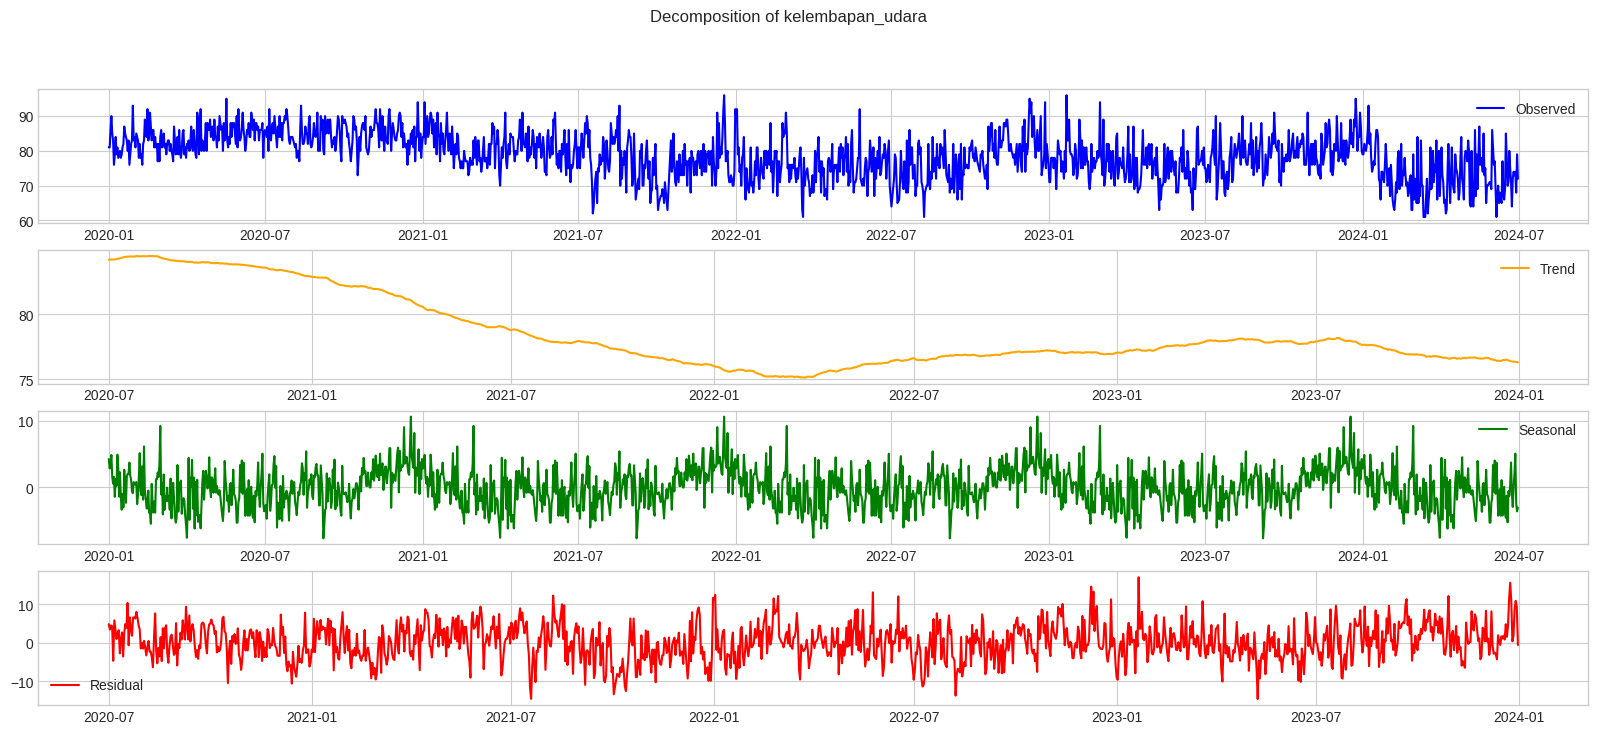

In [ ]:
# Loop melalui setiap kolom target dan lakukan decomposing
for feature in features:
    # Membaca data hujan dari data pelatihan
    train_column = df_model[feature]

    # Melakukan decomposing
    result = seasonal_decompose(train_column, model='additive', period=365)  # Sesuaikan dengan periode musiman yang sesuai

    # Plot hasil decomposing
    plt.figure(figsize=(20, 8))
    plt.subplot(4, 1, 1)
    plt.plot(result.observed, label='Observed', color='blue')
    plt.legend()
    plt.subplot(4, 1, 2)
    plt.plot(result.trend, label='Trend', color='orange')
    plt.legend()
    plt.subplot(4, 1, 3)
    plt.plot(result.seasonal, label='Seasonal', color='green')
    plt.legend()
    plt.subplot(4, 1, 4)
    plt.plot(result.resid, label='Residual', color='red')
    plt.legend()
    plt.suptitle(f'Decomposition of {feature}')

    plt.show()

### Stationary Test
Untuk memastikan data time series stasioner, kita menggunakan metode ADF (Augmented Dickey-Fuller) Test. Data stasioner penting untuk pemodelan time series yang akurat.

ADF Test for curah_hujan:
ADF Statistic: -27.818799754946703
p-value: 0.0
Critical Values:
1%: -3.4343387651403106
5%: -2.8633018108486343
10%: -2.5677079480625067


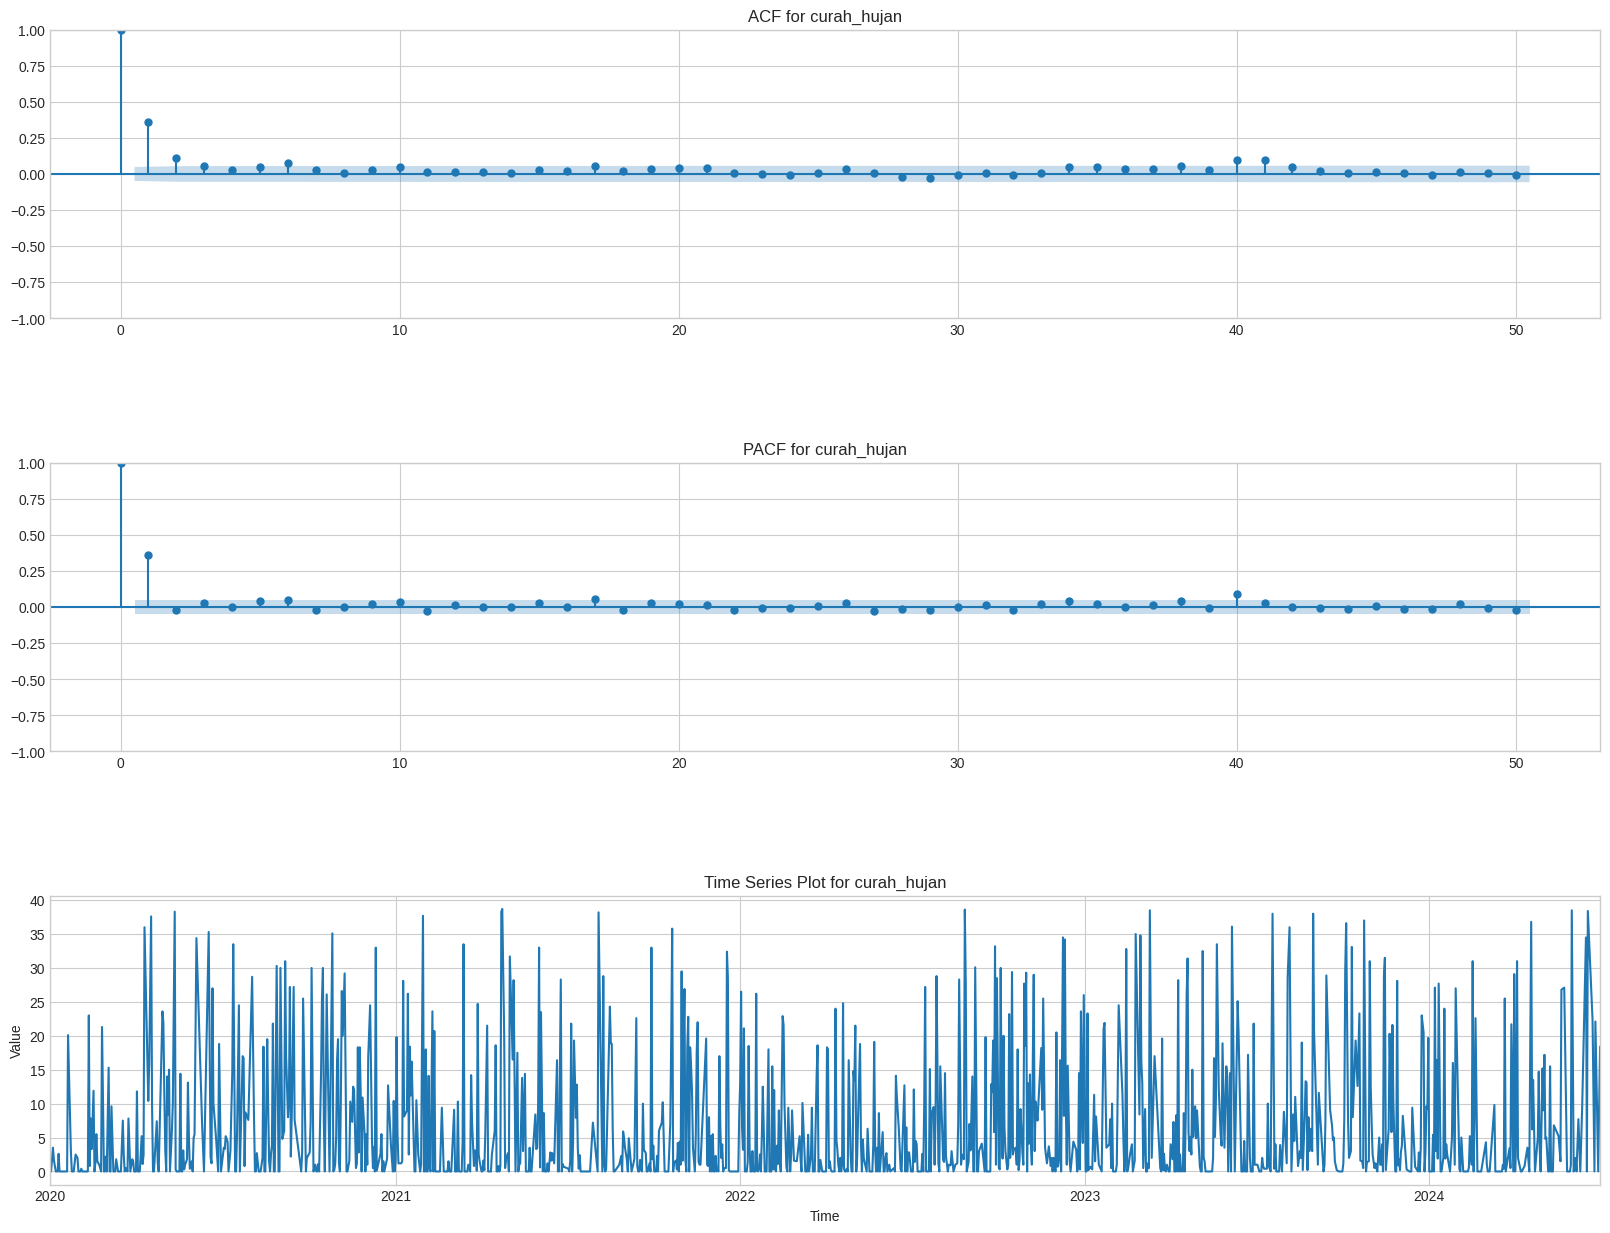

ADF Test for suhu_udara:
ADF Statistic: -3.2948108465684034
p-value: 0.015112029221840998
Critical Values:
1%: -3.434378077206262
5%: -2.8633191630261203
10%: -2.5677171879165286


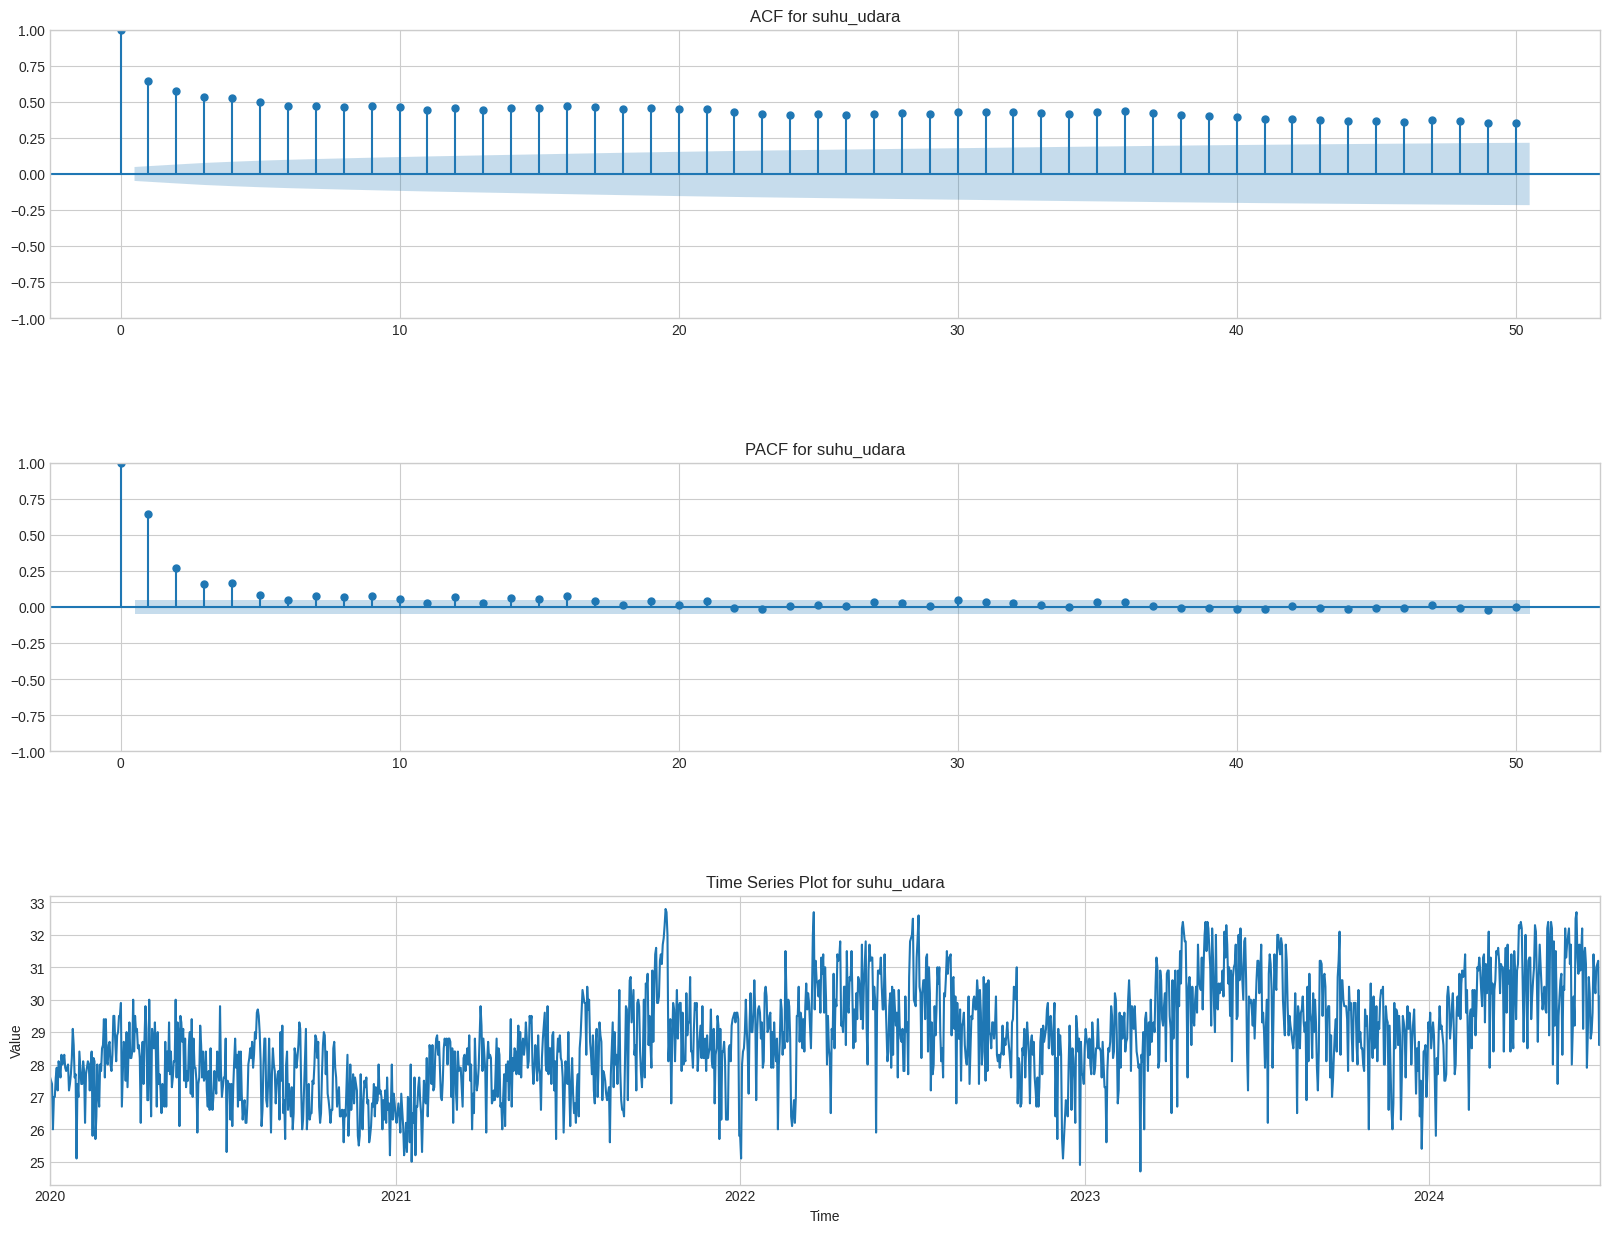

ADF Test for kelembapan_udara:
ADF Statistic: -3.7288576864599743
p-value: 0.003725076688064935
Critical Values:
1%: -3.4343755975140455
5%: -2.8633180685073194
10%: -2.5677166050955584


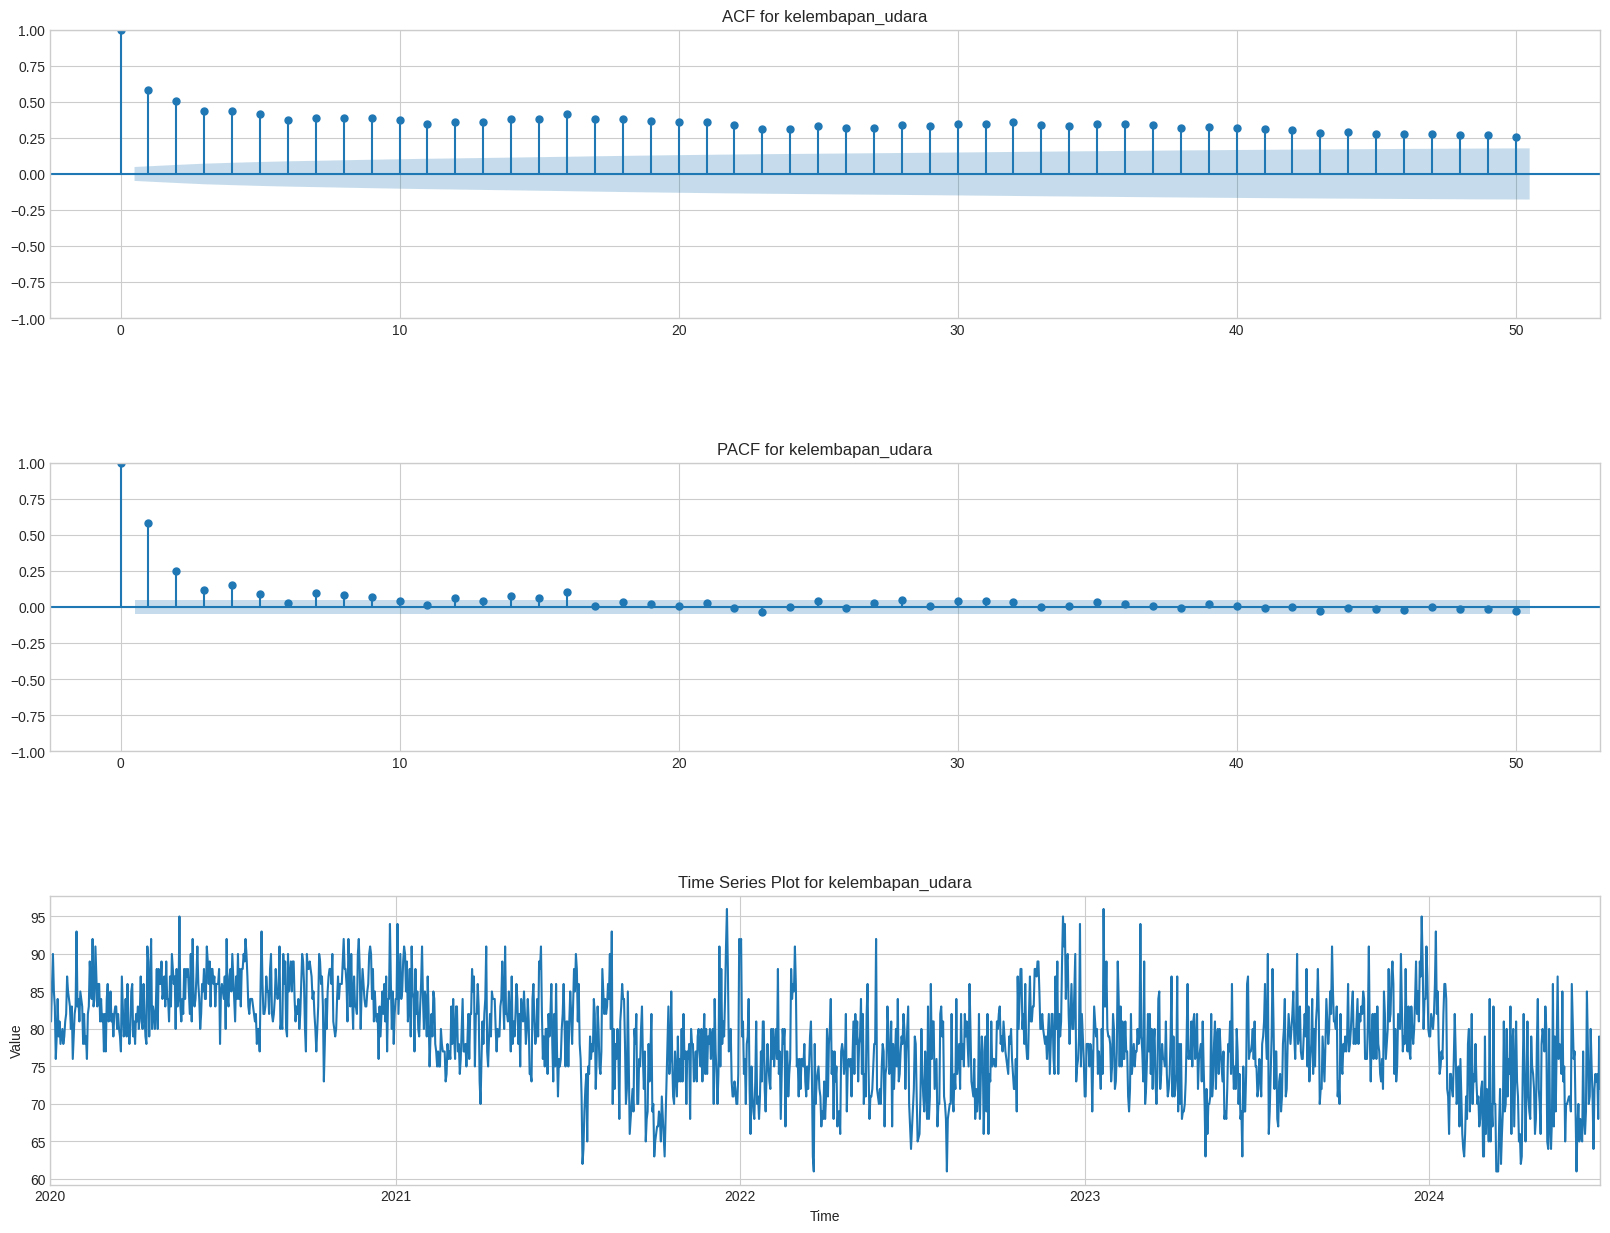

In [ ]:
# Mengecek Kestasioneran Data

# Loop through each target feature
for feature in features:
    # Check for stationarity using Augmented Dickey-Fuller test
    result = adfuller(df_model[feature], autolag='AIC')
    print(f'ADF Test for {feature}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')

    # Create subplots with space between them
    fig, axes = plt.subplots(3, 1, figsize=(20, 15))
    plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between subplots

    # Plot ACF and PACF to identify seasonality
    plot_acf(df_model[feature], lags=50, ax=axes[0])
    plot_pacf(df_model[feature], lags=50, ax=axes[1])
    axes[0].set_title(f'ACF for {feature}')
    axes[1].set_title(f'PACF for {feature}')

    # Visualize the time series to identify trends
    df_model[feature].plot(ax=axes[2])
    axes[2].set_title(f'Time Series Plot for {feature}')
    axes[2].set_xlabel('Time')
    axes[2].set_ylabel('Value')

    plt.show()

1. **Curah Hujan:** Nilai ADF Statistic jauh lebih kecil dari nilai kritis pada tingkat signifikansi 1%, 5%, dan 10%. p-value sangat kecil (0.0). Ini menunjukkan bahwa data curah hujan stasioner dan tidak memiliki unit root.
2. **Suhu Udara:**Nilai ADF Statistic lebih kecil dari nilai kritis pada tingkat signifikansi 5% dan 10%, namun lebih besar dari nilai kritis pada tingkat signifikansi 1%. p-value (0.015) lebih kecil dari 0.05. Ini menunjukkan bahwa data suhu udara stasioner pada tingkat signifikansi 5% dan 10%.
3. **Kelembapan Udara:**Nilai ADF Statistic lebih kecil dari nilai kritis pada tingkat signifikansi 1%, 5%, dan 10%. p-value (0.0037) lebih kecil dari 0.05. Ini menunjukkan bahwa data kelembapan udara stasioner pada semua tingkat signifikansi.



## Modelling
Pada tahap ini, kita akan melakukan pemodelan untuk memprediksi cuaca menggunakan LSTM (Long Short-Term Memory).

### Feature Scaling
Agar semua fitur berada dalam skala yang sama dan mempercepat konvergensi model, kita akan menggunakan metode `MinMaxScaler`. Metode ini akan mengubah nilai fitur menjadi rentang 0 hingga 1.

In [ ]:
# ensure all data is float
values = df_model.values
values = values.astype('float32')
values

array([[ 0.  , 27.6 , 81.  ],
       [ 0.  , 27.5 , 81.  ],
       [ 1.75, 27.4 , 86.  ],
       ...,
       [ 0.  , 31.2 , 68.  ],
       [10.  , 28.6 , 79.  ],
       [18.4 , 30.1 , 72.  ]], dtype=float32)

In [ ]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)
scaled_values

array([[0.        , 0.3580246 , 0.57142866],
       [0.        , 0.34567904, 0.57142866],
       [0.04521964, 0.33333325, 0.71428573],
       ...,
       [0.        , 0.80246925, 0.20000005],
       [0.25839794, 0.48148155, 0.5142857 ],
       [0.47545218, 0.66666675, 0.31428587]], dtype=float32)

### Pemisahan Data Train dan Test
Dataset akan dibagi menjadi dua bagian: 80% untuk data pelatihan (train) dan 20% untuk data pengujian (test). Pembagian ini memastikan bahwa model dapat dilatih dengan cukup data dan diuji untuk mengevaluasi performanya.

In [ ]:
# Membagi data dengan test size 0.2 dan tanpa shuffle
df_train, df_test = train_test_split(df_model, test_size=0.2, shuffle=False)

print('Data for train:', df_train.shape)
print('\nData for test:', df_test.shape)

Data for train: (1314, 3)

Data for test: (329, 3)


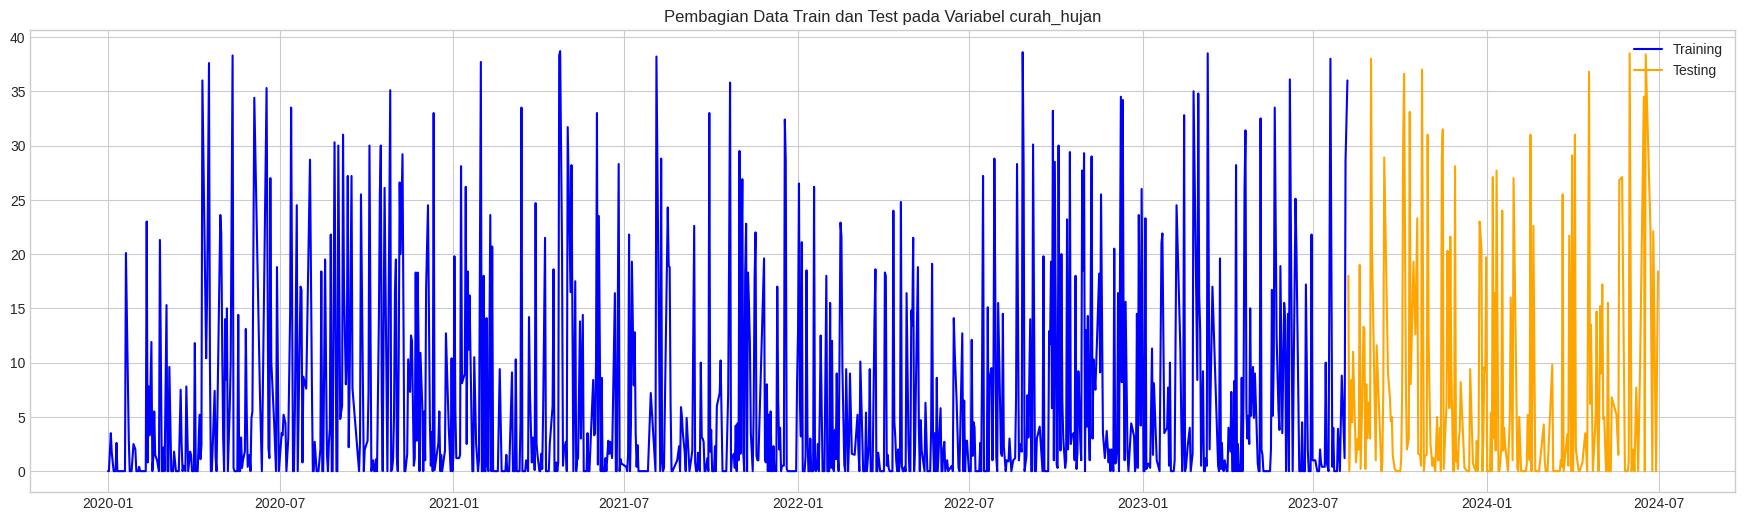

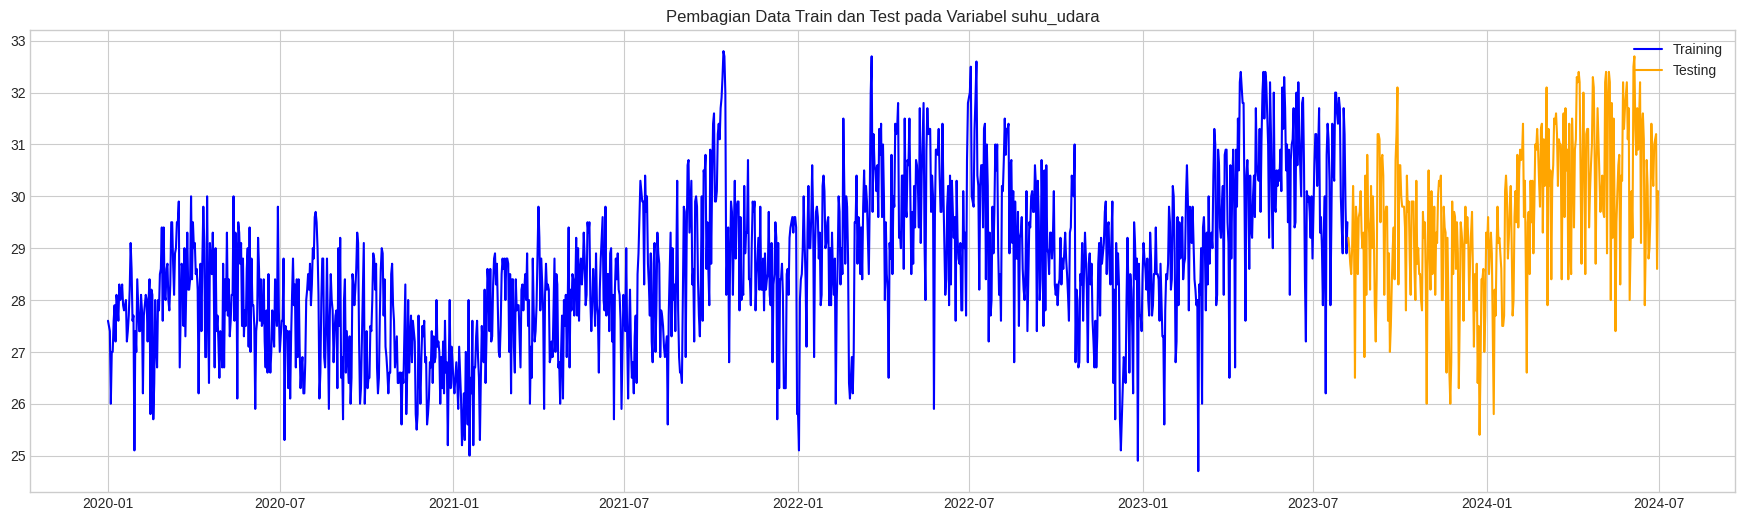

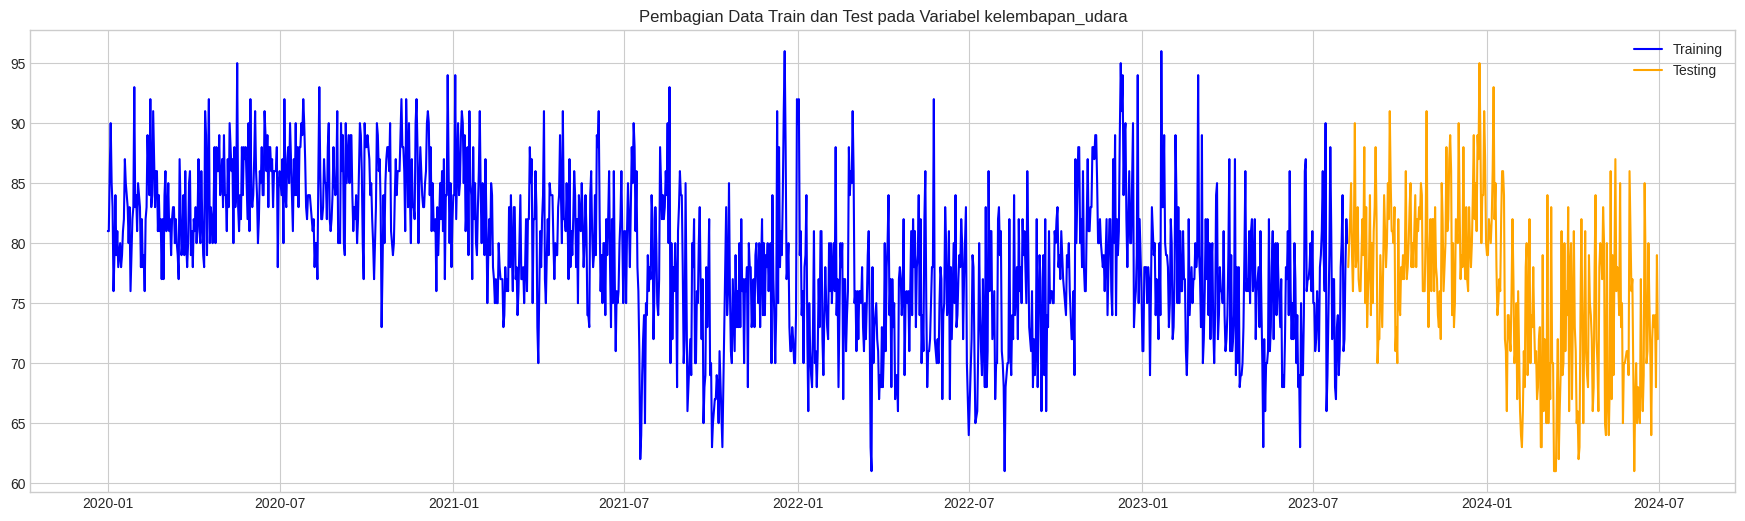

In [ ]:
for feature in features:
    plt.figure(figsize=(22,6))
    # Plot df_train in blue
    plt.plot(df_train.index, df_train[feature], label='Training', color='blue')
    # Plot df_test in orange
    plt.plot(df_test.index, df_test[feature], label='Testing', color='orange')
    plt.title(f'Pembagian Data Train dan Test pada Variabel {feature}')
    plt.legend(loc='upper right')  # Add legend

### Pembuatan Sequence Window
Untuk memodelkan data time series, kita akan membuat jendela urutan (sequence window) menggunakan metode `series_to_supervised`. Metode ini akan mengubah data time series menjadi format yang dapat digunakan oleh model LSTM, di mana kita menggunakan data dari 3 hari sebelumnya untuk memprediksi 1 hari selanjutnya.

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
n_days = 3
n_features = df_model.shape[1]

# frame as supervised learning
reframed = series_to_supervised(scaled_values, n_days, 1)
print(reframed.shape)
reframed.head()

(1640, 12)


var1(t-3)  var2(t-3)  var3(t-3)  var1(t-2)  var2(t-2)  var3(t-2)  \
3       0.00       0.36       0.57       0.00       0.35       0.57   
4       0.00       0.35       0.57       0.05       0.33       0.71   
5       0.05       0.33       0.71       0.09       0.16       0.83   
6       0.09       0.16       0.83       0.04       0.28       0.69   
7       0.04       0.28       0.69       0.02       0.28       0.63   

   var1(t-1)  var2(t-1)  var3(t-1)  var1(t)  var2(t)  var3(t)  
3       0.05       0.33       0.71     0.09     0.16     0.83  
4       0.09       0.16       0.83     0.04     0.28     0.69  
5       0.04       0.28       0.69     0.02     0.28     0.63  
6       0.02       0.28       0.63     0.00     0.36     0.43  
7       0.00       0.36       0.43     0.00     0.40     0.51

In [ ]:
values = reframed.values

# Membagi data dengan test size 0.2 dan tanpa shuffle
train, test = train_test_split(values, test_size=0.2, shuffle=False)

# Ambil index dari dataframe reframed dan bagi sesuai dengan data train dan test
date_reframed = df_model.index[reframed.index]
date_train = date_reframed[:len(train)]
date_test = date_reframed[len(train):]

# Cetak hasil pembagian untuk memastikan
print("Tanggal data train:", date_train)
print("Tanggal data test:", date_test)

Tanggal data train: DatetimeIndex(['2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11',
               '2020-01-12', '2020-01-13',
               ...
               '2023-07-29', '2023-07-30', '2023-07-31', '2023-08-01',
               '2023-08-02', '2023-08-03', '2023-08-04', '2023-08-05',
               '2023-08-06', '2023-08-07'],
              dtype='datetime64[ns]', name='tanggal', length=1312, freq=None)
Tanggal data test: DatetimeIndex(['2023-08-08', '2023-08-09', '2023-08-10', '2023-08-11',
               '2023-08-12', '2023-08-13', '2023-08-14', '2023-08-15',
               '2023-08-16', '2023-08-17',
               ...
               '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24',
               '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28',
               '2024-06-29', '2024-06-30'],
              dtype='datetime64[ns]', name='tanggal', length=328, freq=None)


In [ ]:
# split feature and target
n_obs = n_days * n_features #30
train_X, train_y = train[:, :n_obs], train[:, -n_features:]
test_X, test_y = test[:, :n_obs], test[:, -n_features:]

# reshape input to 3D (samples, timesteps, features)
X_train = train_X.reshape((train_X.shape[0], n_days, n_features))
X_test = test_X.reshape((test_X.shape[0], n_days, n_features))
y_train = train_y
y_test = test_y

print('Total features:', n_features)
print('Total train data (X_train):', X_train.shape)
print('Total test data (X_test):', X_test.shape)
print('Total validation train data (y_train):', y_train.shape)
print('Total validation test data (y_test):', y_test.shape)

Total features: 3
Total train data (X_train): (1312, 3, 3)
Total test data (X_test): (328, 3, 3)
Total validation train data (y_train): (1312, 3)
Total validation test data (y_test): (328, 3)


In [ ]:
# Look at the x_train structure
print('Data input structure for training')
print(X_train[0])

print('\nData output structure for validation')
print(y_train[0])

Data input structure for training
[[0.         0.3580246  0.57142866]
 [0.         0.34567904 0.57142866]
 [0.04521964 0.33333325 0.71428573]]

Data output structure for validation
[0.09043927 0.16049385 0.82857144]


### Pemodelan
Pada tahap ini, kita akan membangun model LSTM dengan parameter yang sesuai untuk data time series kita. Kombinasi parameter seperti jumlah neuron, jumlah lapisan LSTM, dan fungsi aktivasi akan diuji untuk mendapatkan performa terbaik.

#### Model 1

In [ ]:
# Define model
model1 = Sequential()
model1.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(Dropout(0.3)) # Dropout regularisation
model1.add(LSTM(10, return_sequences=False))
model1.add(Dropout(0.3)) # Dropout regularisation
model1.add(Flatten())
model1.add(Dense(64, activation="relu"))
model1.add(Dense(16, activation="relu"))
model1.add(Dense(n_features))

optimizer = Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Menampilkan ringkasan model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             10800     
                                                                 
 dropout (Dropout)           (None, 3, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 16)                1

Epoch 1/200
41/41 [==============================] - ETA: 0s - loss: 0.1186 - mae: 0.2800
Epoch 1: val_loss improved from inf to 0.05863, saving model to best_model.h5
41/41 [==============================] - 15s 103ms/step - loss: 0.1186 - mae: 0.2800 - val_loss: 0.0586 - val_mae: 0.2047 - lr: 0.0010
Epoch 2/200
40/41 [============================>.] - ETA: 0s - loss: 0.0496 - mae: 0.1832
Epoch 2: val_loss improved from 0.05863 to 0.05220, saving model to best_model.h5
41/41 [==============================] - 1s 16ms/step - loss: 0.0500 - mae: 0.1837 - val_loss: 0.0522 - val_mae: 0.1809 - lr: 0.0010
Epoch 3/200
38/41 [==========================>...] - ETA: 0s - loss: 0.0409 - mae: 0.1594
Epoch 3: val_loss improved from 0.05220 to 0.05028, saving model to best_model.h5
41/41 [==============================] - 1s 19ms/step - loss: 0.0424 - mae: 0.1628 - val_loss: 0.0503 - val_mae: 0.1777 - lr: 0.0010
Epoch 4/200
40/41 [============================>.] - ETA: 0s - loss: 0.0413 - mae: 0.16

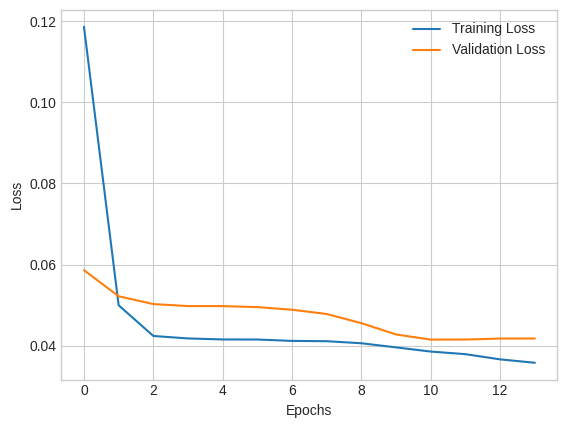

In [ ]:
def train_model(model, X_train, y_train, X_test, y_test,
                learning_rate=0.001, batch_size=32, epochs=100,
                patience=3, filepath='best_model.h5'):

    # Define learning rate scheduler
    def scheduler(epoch, lr):
        if epoch < 10:
            return lr
        else:
            return lr* tf.math.exp(-0.1)   # Decay learning rate more aggressively

    lr_scheduler = LearningRateScheduler(scheduler)
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    checkpointer = ModelCheckpoint(filepath=filepath, verbose=1, save_best_only=True)

    # Fit the model
    history = model.fit(X_train, y_train, epochs=epochs,
                        batch_size=batch_size, validation_data=(X_test, y_test),
                        callbacks=[lr_scheduler, early_stopping, checkpointer],
                        verbose=1, shuffle=False)

    # Evaluate the model
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss}')

    # Plot training history
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return history, test_loss

# Train the model
history1, test_loss1 = train_model(model1, X_train, y_train, X_test, y_test)

#### Model 2

Model: "sequential_104"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_208 (LSTM)             (None, 3, 200)            163200    
                                                                 
 dropout_208 (Dropout)       (None, 3, 200)            0         
                                                                 
 lstm_209 (LSTM)             (None, 100)               120400    
                                                                 
 dropout_209 (Dropout)       (None, 100)               0         
                                                                 
 dense_208 (Dense)           (None, 64)                6464      
                                                                 
 dense_209 (Dense)           (None, 3)                 195       
                                                                 
Total params: 290259 (1.11 MB)
Trainable params: 290

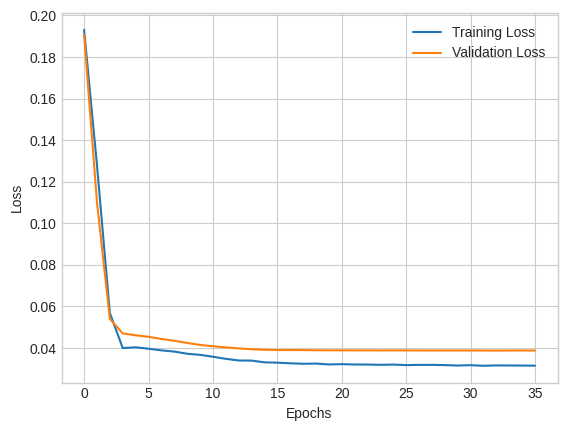

In [ ]:
# Define model
model2 = Sequential()
model2.add(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(Dropout(0.1)) # Dropout regularisation
model2.add(LSTM(100, return_sequences=False))
model2.add(Dropout(0.1)) # Dropout regularisation
model2.add(Dense(64, activation="relu"))
model2.add(Dense(n_features))

optimizer = Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Menampilkan ringkasan model
model2.summary()

# Train the model
history2, test_loss2 = train_model(model2, X_train, y_train, X_test, y_test)

#### Model 3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 3, 400)            326400    
 al)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 3, 400)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               400800    
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 603       
                                                                 
Total params: 727803 (2.78 MB)
Trainable params: 72780

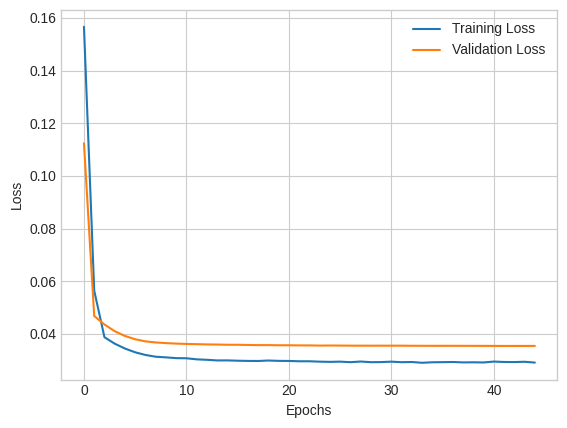

In [ ]:
# Define model
model3 = Sequential()
model3.add(Bidirectional(LSTM(200, return_sequences=True),
                         input_shape=(X_train.shape[1], X_train.shape[2])))
model3.add(Dropout(0.2))  # Dropout regularization
model3.add(Bidirectional(LSTM(100, return_sequences=False)))
model3.add(Dropout(0.2))  # Dropout regularization
model3.add(Dense(n_features))

optimizer = Adam(learning_rate=0.0001)
model3.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Menampilkan ringkasan model
model3.summary()

# Train the model
history3, test_loss3 = train_model(model3, X_train, y_train, X_test, y_test)

#### Hyperparameter Tuning
Optimasi model LSTM akan dilakukan menggunakan Optuna, sebuah framework untuk melakukan hyperparameter tuning secara otomatis. Optuna akan mencoba berbagai kombinasi hyperparameter dan memilih yang terbaik berdasarkan kriteria performa yang ditentukan.

In [ ]:
# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    lstm_units = trial.suggest_int('lstm_units', 10, 200)
    dense_units = trial.suggest_int('dense_units', 10, 200)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
    recurrent_dropout_rate = trial.suggest_uniform('recurrent_dropout_rate',
                                                   0.0, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    epochs = trial.suggest_int('epochs', 20, 100)
    batch_size = trial.suggest_int('batch_size', 16, 128)

    # Define the model
    model = Sequential()
    model.add(LSTM(lstm_units, activation='relu', dropout=dropout_rate,
                   recurrent_dropout=recurrent_dropout_rate,
                   return_sequences=True,
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(lstm_units, activation='relu',
                   dropout=dropout_rate,
                   recurrent_dropout=recurrent_dropout_rate))
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(n_features))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5,
                                   restore_best_weights=True)

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
              validation_data=(X_test, y_test), callbacks=[early_stopping],
              verbose=0, shuffle=False)

    # Evaluate the model
    loss = model.evaluate(X_test, y_test, verbose=0)
    return loss

# Create an Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)  # Number of trials can be adjusted

# Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

[I 2024-07-28 00:58:52,684] A new study created in memory with name: no-name-e991b844-195e-4516-a401-69f6dca5dae0
[I 2024-07-28 00:59:11,630] Trial 0 finished with value: 0.049178145825862885 and parameters: {'lstm_units': 83, 'dense_units': 138, 'dropout_rate': 0.27482330706142777, 'recurrent_dropout_rate': 0.0009812193892055898, 'learning_rate': 9.64163854530714e-05, 'epochs': 39, 'batch_size': 125}. Best is trial 0 with value: 0.049178145825862885.
[I 2024-07-28 00:59:39,568] Trial 1 finished with value: 0.03638527914881706 and parameters: {'lstm_units': 71, 'dense_units': 20, 'dropout_rate': 0.08945210259422387, 'recurrent_dropout_rate': 0.1246203728704095, 'learning_rate': 0.0017775031359592104, 'epochs': 29, 'batch_size': 35}. Best is trial 1 with value: 0.03638527914881706.
[I 2024-07-28 00:59:50,719] Trial 2 finished with value: 0.04679834470152855 and parameters: {'lstm_units': 115, 'dense_units': 18, 'dropout_rate': 0.36662116630725905, 'recurrent_dropout_rate': 0.15346746299

Best hyperparameters:  {'lstm_units': 78, 'dense_units': 103, 'dropout_rate': 8.623267699505062e-05, 'recurrent_dropout_rate': 0.48618682944569175, 'learning_rate': 0.001621306470249375, 'epochs': 100, 'batch_size': 127}


Epoch 1/100
11/11 [==============================] - 8s 148ms/step - loss: 0.1785 - mae: 0.3490 - val_loss: 0.1276 - val_mae: 0.2885
Epoch 2/100
11/11 [==============================] - 0s 43ms/step - loss: 0.0639 - mae: 0.2027 - val_loss: 0.0602 - val_mae: 0.2007
Epoch 3/100
11/11 [==============================] - 0s 46ms/step - loss: 0.0461 - mae: 0.1688 - val_loss: 0.0555 - val_mae: 0.1800
Epoch 4/100
11/11 [==============================] - 1s 47ms/step - loss: 0.0417 - mae: 0.1587 - val_loss: 0.0487 - val_mae: 0.1738
Epoch 5/100
11/11 [==============================] - 1s 47ms/step - loss: 0.0401 - mae: 0.1607 - val_loss: 0.0470 - val_mae: 0.1697
Epoch 6/100
11/11 [==============================] - 1s 48ms/step - loss: 0.0386 - mae: 0.1546 - val_loss: 0.0447 - val_mae: 0.1634
Epoch 7/100
11/11 [==============================] - 0s 46ms/step - loss: 0.0380 - mae: 0.1544 - val_loss: 0.0430 - val_mae: 0.1610
Epoch 8/100
11/11 [==============================] - 1s 49ms/step - loss: 0

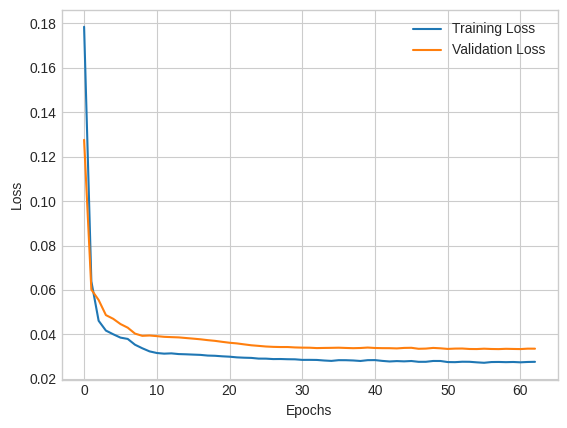

In [ ]:
# Train the final model with the best hyperparameters
best_params = study.best_params

tuned_model = Sequential()
tuned_model.add(LSTM(best_params['lstm_units'], activation='relu',
                     dropout=best_params['dropout_rate'],
                     recurrent_dropout=best_params['recurrent_dropout_rate'],
                     return_sequences=True, input_shape=(X_train.shape[1],
                                                         X_train.shape[2])))
tuned_model.add(Dropout(best_params['dropout_rate']))
tuned_model.add(LSTM(best_params['lstm_units'], activation='relu',
                      dropout=best_params['dropout_rate'],
                      recurrent_dropout=best_params['recurrent_dropout_rate']))
tuned_model.add(Dropout(best_params['dropout_rate']))
tuned_model.add(Dense(best_params['dense_units'], activation='relu'))
tuned_model.add(Dense(n_features))

# Compile the model
optimizer = Adam(learning_rate=best_params['learning_rate'])
tuned_model.compile(optimizer=optimizer, loss='mean_squared_error',
                    metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5,
                               restore_best_weights=True)

# Train the model
history = tuned_model.fit(X_train, y_train, epochs=best_params['epochs'],
                          batch_size=best_params['batch_size'],
                          validation_data=(X_test, y_test),
                          callbacks=[early_stopping], shuffle=False)

# Evaluate the model
test_loss = tuned_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Function

In [ ]:
def inverse_transform_and_plot(y_true, y_pred, scaler, features):
    """
    Inverse transforms the predictions and actual values, and plots them for each feature.

    Parameters:
    y_true (np.array): Actual values
    y_pred (np.array): Predicted values
    scaler (sklearn.preprocessing.StandardScaler): Scaler used for normalization
    features (list): List of feature names
    """
    inv_pred = scaler.inverse_transform(y_pred)
    inv_true = scaler.inverse_transform(y_true)

    for i in range(len(features)):
        plt.figure(figsize=(20, 8))
        plt.plot(inv_true[:, i], label='Actual')
        plt.plot(inv_pred[:, i], label='Predicted')
        plt.title(f'Actual vs Predicted for {features[i]}')
        plt.xlabel('Time')
        plt.ylabel(features[i])
        plt.legend()
        plt.show()

    return inv_true, inv_pred

In [ ]:
def create_predictions_dataframe(y_true, y_pred, features):
    """
    Creates a DataFrame with actual and predicted values for each feature.

    Parameters:
    y_true (np.array): Actual values
    y_pred (np.array): Predicted values
    features (list): List of feature names

    Returns:
    pd.DataFrame: DataFrame with actual and predicted values
    """
    df_final = pd.DataFrame()

    for i, feature in enumerate(features):
        df_final[f'{feature}'] = y_true[:, i]
        df_final[f'{feature}_pred'] = np.round(y_pred[:, i], 3)

    return df_final

In [ ]:
def calculate_metrics(y_true, y_pred, features):
    metrics = {
        'feature': [],
        'MAE': [],
        'R2': [],
        'RMSE': [],
        'MAPE': []
    }

    for i, feature in enumerate(features):
        actual = y_true[:, i].flatten()
        predicted = y_pred[:, i].flatten()

        mae = mean_absolute_error(actual, predicted)
        r2 = r2_score(actual, predicted)
        rmse = np.sqrt(mean_squared_error(actual, predicted))
        mape = np.mean(np.abs((actual - predicted) / actual)) * 100

        metrics['feature'].append(feature)
        metrics['MAE'].append(mae)
        metrics['R2'].append(r2)
        metrics['RMSE'].append(rmse)
        metrics['MAPE'].append(mape)

    return pd.DataFrame(metrics)

## Evaluation
Pada tahap ini, kita akan mengevaluasi performa model dengan menggunakan data uji. Prediksi yang dihasilkan oleh model akan didenormalisasi kembali ke skala aslinya agar hasilnya dapat diinterpretasikan dengan benar.

11/11 [==============================] - 1s 6ms/step


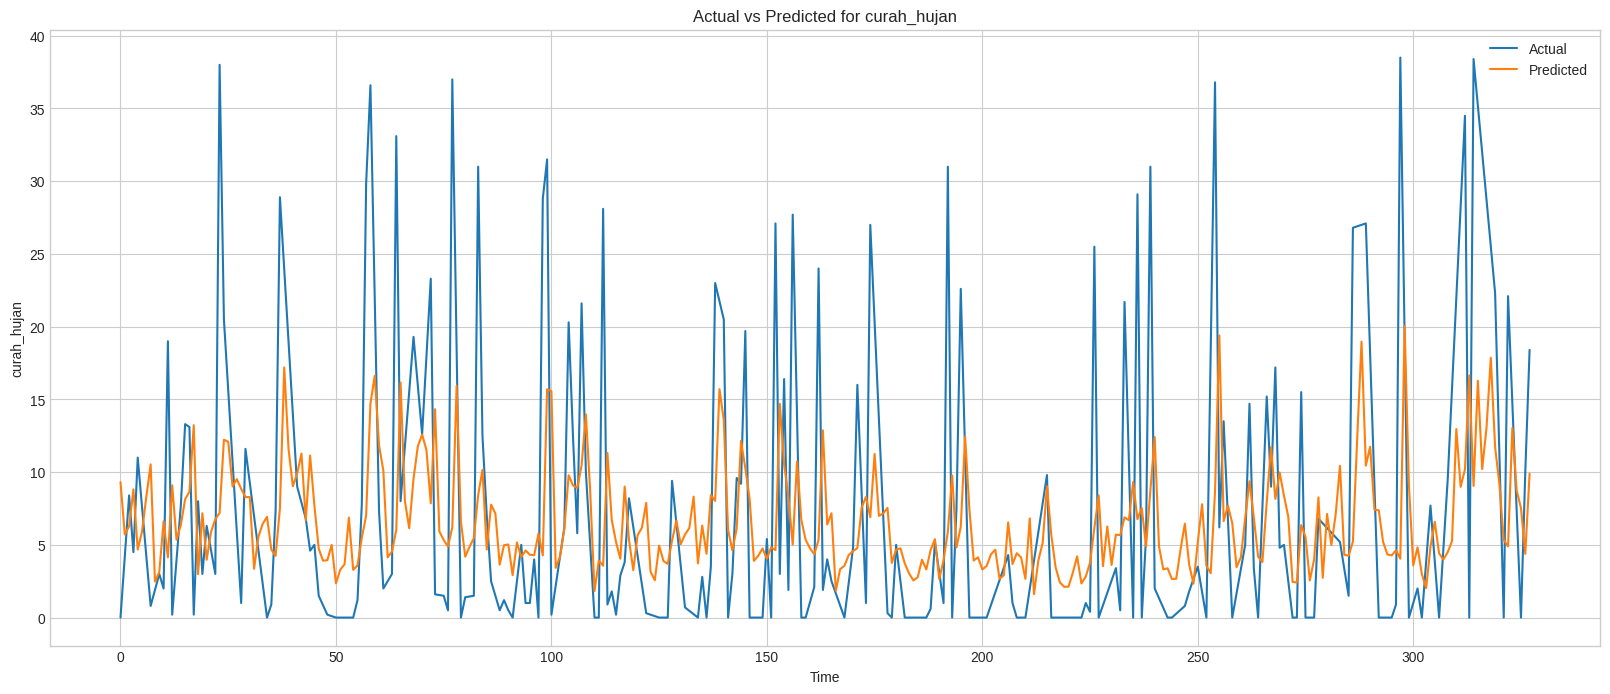

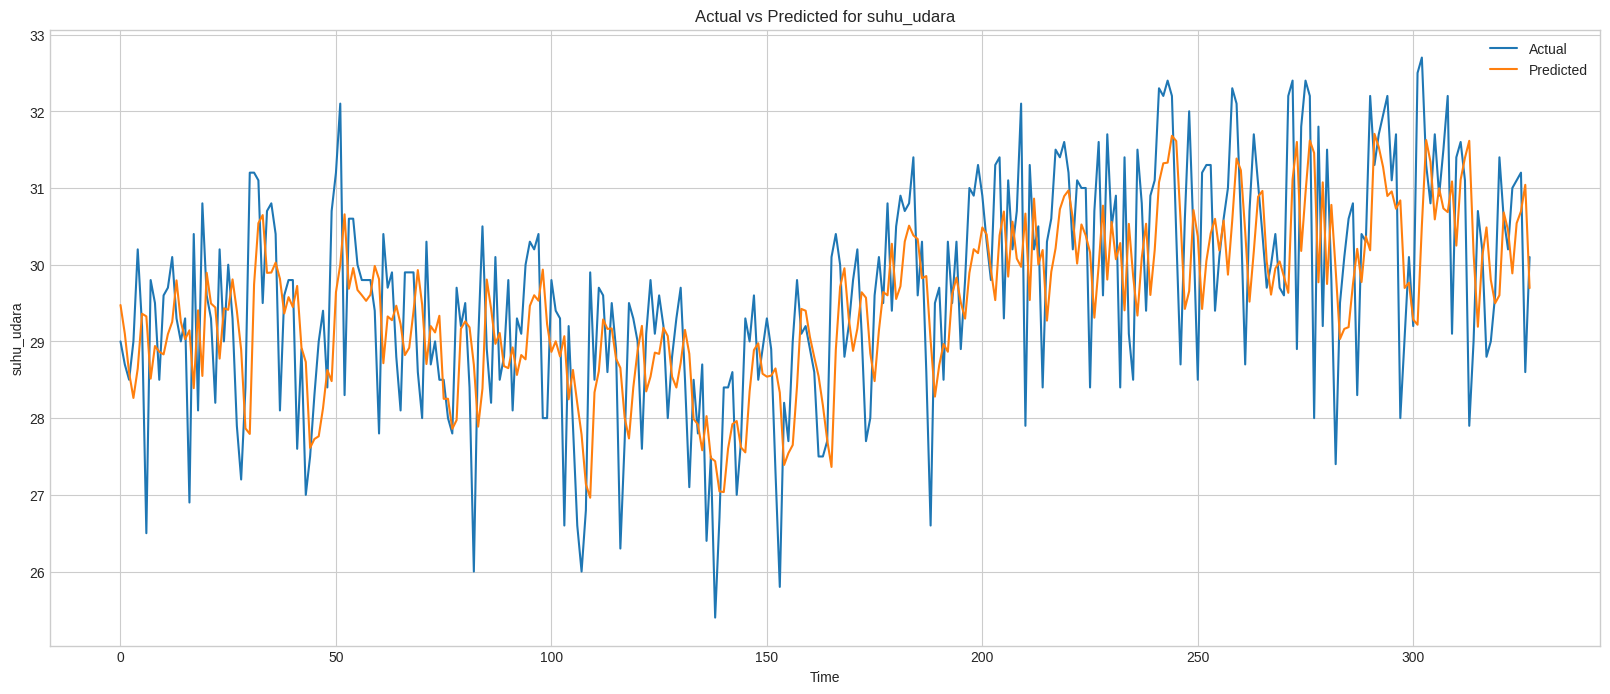

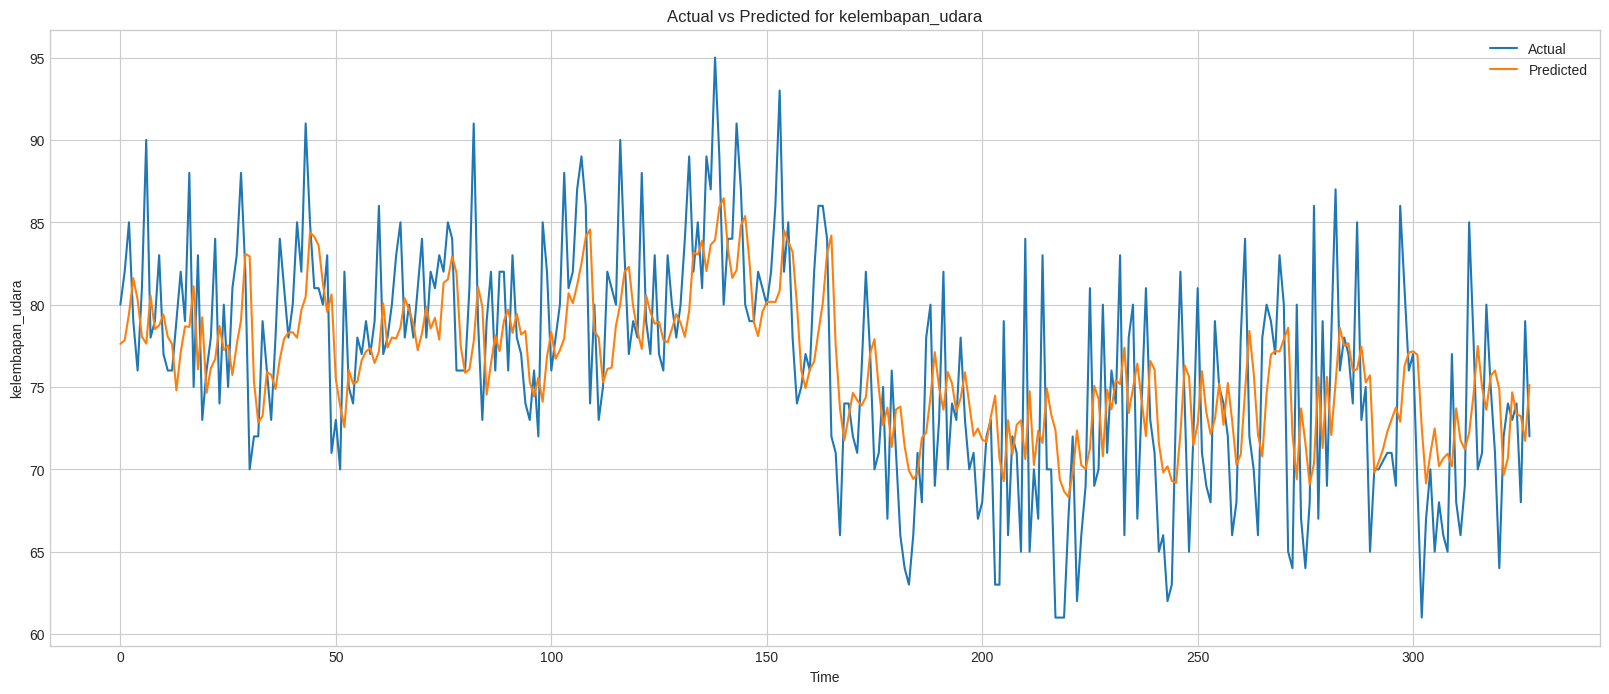

In [ ]:
# Predict on test data
y_pred = tuned_model.predict(X_test)

# Inverse transform and plot predictions
y_test_inverse, y_hat_inverse = inverse_transform_and_plot(y_test, y_pred,
                                                           scaler, features)

In [ ]:
# Create DataFrame with actual and predicted values
predictions_df = create_predictions_dataframe(y_test_inverse, y_hat_inverse, features)
predictions_df.head(10)

curah_hujan  curah_hujan_pred  suhu_udara  suhu_udara_pred  \
0         0.00              9.31       29.00            29.47   
1         4.20              5.71       28.70            29.10   
2         8.40              6.27       28.50            28.59   
3         4.50              8.82       29.00            28.26   
4        11.00              4.68       30.20            28.65   
5         7.60              5.92       29.20            29.36   
6         4.20              8.32       26.50            29.33   
7         0.80             10.53       29.80            28.51   
8         1.90              2.48       29.50            28.94   
9         3.00              3.13       28.50            28.86   

   kelembapan_udara  kelembapan_udara_pred  
0             80.00                  77.61  
1             82.00                  77.84  
2             85.00                  79.44  
3             79.00                  81.60  
4             76.00                  80.31  
5             81.00                  78.05  
6             90.00                  77.64  
7             78.00                  80.55  
8             79.00                  78.52  
9             83.00                  78.74

Hasil evaluasi model diukur menggunakan beberapa metrik berikut:

- **MAE (Mean Absolute Error)**: Rata-rata kesalahan absolut antara nilai prediksi dan nilai aktual.
- **R² (Coefficient of Determination)**: Mengukur seberapa baik model menjelaskan variabilitas data. Nilai R² berkisar antara 0 dan 1, dengan nilai yang lebih tinggi menunjukkan model yang lebih baik.
- **RMSE (Root Mean Squared Error)**: Akar dari rata-rata kesalahan kuadrat. Metrik ini memberikan penalti lebih besar untuk kesalahan yang lebih besar.
- **MAPE (Mean Absolute Percentage Error)**: Rata-rata kesalahan absolut dalam bentuk persentase.

In [ ]:
# Calculate and display metrics
metrics_df = calculate_metrics(y_test_inverse, y_hat_inverse, features)
metrics_df

<ipython-input-30-d0df063cf879>:28: RuntimeWarning:

divide by zero encountered in divide



feature  MAE   R2  RMSE  MAPE
0       curah_hujan 6.10 0.18  8.73   inf
1        suhu_udara 1.00 0.24  1.24  3.38
2  kelembapan_udara 4.53 0.32  5.64  6.00

1. **Curah Hujan:** Model memiliki performa yang rendah dalam memprediksi curah hujan, yang ditunjukkan oleh nilai MAE dan RMSE yang tinggi serta nilai R² yang rendah. Nilai MAPE adalah infinity karena terdapat nilai aktual yang sangat kecil atau nol, yang menyebabkan pembagian dengan nol dalam perhitungan persentase kesalahan.
2. **Suhu Udara:** Model menunjukkan performa yang lebih baik dalam memprediksi suhu udara dibandingkan dengan curah hujan. Nilai MAE dan RMSE lebih rendah, dan nilai MAPE sebesar 3.33% menunjukkan bahwa kesalahan prediksi rata-rata relatif kecil. Nilai R² sebesar 0.25 menunjukkan bahwa model mampu menjelaskan sebagian variabilitas dalam data suhu udara.
3. **Kelembapan Udara:** Model memiliki performa yang cukup baik dalam memprediksi kelembapan udara, dengan MAE dan RMSE yang moderat. Nilai MAPE sebesar 6.23% menunjukkan bahwa kesalahan prediksi rata-rata berada dalam kisaran yang dapat diterima. Nilai R² sebesar 0.30 menunjukkan bahwa model mampu menjelaskan sebagian besar variabilitas dalam data kelembapan udara.

### Hasil Forecast
Setelah melakukan evaluasi, hasil prediksi untuk data uji menunjukkan performa yang bervariasi tergantung pada variabel yang diprediksi. Model menunjukkan performa yang lebih baik dalam memprediksi suhu udara dan kelembapan udara dibandingkan dengan curah hujan. Performa model dapat ditingkatkan lebih lanjut dengan melakukan tuning hyperparameter yang lebih mendalam dan mempertimbangkan metode pemodelan alternatif.

In [ ]:
def plot_feature_predictions(df_train, df_test, predictions_df, features):
    """
    Plots training data, test data, and predictions for each feature.

    Parameters:
    df_train (pd.DataFrame): DataFrame containing the training data
    df_test (pd.DataFrame): DataFrame containing the test data
    predictions_df (pd.DataFrame): DataFrame containing the predicted data
    features (list): List of feature names
    """
    for feature in features:
        # Create traces for training, test, and predicted data
        trace_train = go.Scatter(x=df_train.index, y=df_train[feature],
                                 mode='lines', name='Training Data',
                                 line=dict(color='blue'))
        trace_test = go.Scatter(x=df_test.index, y=df_test[feature],
                                mode='lines', name='Test Data',
                                line=dict(color='green'))
        trace_pred = go.Scatter(x=predictions_df.index,
                                y=predictions_df[f'{feature}_pred'],
                                mode='lines', name='Predicted Data',
                                line=dict(color='red'))

        # Create figure layout
        layout = go.Layout(title=f'{feature} Data: Training, Test, and Predictions',
                           xaxis=dict(title='Tanggal'),
                           yaxis=dict(title='Value'),
                           legend=dict(x=0.1, y=1.1, orientation='h'),
                           plot_bgcolor='rgba(0,0,0,0)')  # transparent plot background

        # Create figure object
        fig = go.Figure(data=[trace_train, trace_test, trace_pred], layout=layout)

        # Show plot (you can also use pyo.plot() to save as HTML or use plotly's online mode)
        fig.show()

In [ ]:
# Ensure predictions DataFrame index matches df_test index
predictions_df.index = df_test.index[:predictions_df.shape[0]]

# Plot feature predictions
plot_feature_predictions(df_train, df_test, predictions_df, features)

## Deployment
Setelah model selesai dilatih dan dievaluasi, langkah berikutnya adalah mendeploy model agar dapat digunakan untuk prediksi di masa mendatang.

### Simpan Model
Pada tahap ini, model yang telah dilatih akan disimpan ke dalam file sehingga dapat digunakan kembali tanpa perlu melatih ulang. Penyimpanan model dilakukan dengan menggunakan library seperti `joblib` atau `pickle`. Ini akan memudahkan dalam proses deployment dan integrasi dengan dashboard interaktif nantinya.

In [ ]:
# Fungsi untuk menyimpan model ke dalam file pickle
def save_model_to_pickle(model, filename):
    model.save(filename)  # Menggunakan metode save dari Keras untuk menyimpan model ke file HDF5

# Menyimpan model ke dalam file HDF5
model_filename = 'lstm_model.h5'
save_model_to_pickle(tuned_model, model_filename)
print(f'Model saved to {model_filename}')

Model saved to lstm_model.h5


In [ ]:
model_filename = "/content/lstm_model.h5"

# Jika ingin memuat kembali model LSTM dari file HDF5
def load_model_from_file(filename):
    return load_model(filename)

# Load model
loaded_model = load_model_from_file(model_filename)
print('Model loaded successfully')
loaded_model.summary()

Model loaded successfully
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 200)            163200    
                                                                 
 dropout_2 (Dropout)         (None, 3, 200)            0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               120400    
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                6464      
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 290259 (1.11 M

### Prediksi Hari Selanjutnya
Model yang telah disimpan dapat digunakan untuk memprediksi data cuaca hari kedepan, membantu dalam perencanaan dan pengambilan keputusan terkait kondisi cuaca di masa mendatang.

In [ ]:
# Load model LSTM yang telah disimpan sebelumnya
model_filename = "/content/lstm_model.h5"
loaded_model = load_model(model_filename)

# Data uji (pastikan data uji sudah diinisialisasi sebelumnya)
test_data = df_model.values
test_data = test_data.astype('float32')

# Inisialisasi scaler dan transformasi data uji
scaler = MinMaxScaler(feature_range=(0, 1))
test_data_scaled = scaler.fit_transform(test_data)

# Inisialisasi jumlah langkah masukan dan keluaran yang sesuai dengan model LSTM Anda
n_days = 3  # Sesuaikan dengan jumlah langkah masukan yang digunakan saat pelatihan
n_features = test_data.shape[1]

# Memanggil series_to_supervised untuk membagi data uji
test_data_supervised = series_to_supervised(test_data_scaled, n_days, 1)

# Ambil hanya kolom input untuk prediksi
test_data_sequences = test_data_supervised.values[:, :n_days*n_features]

# Prediksi dengan model LSTM
forecast = []

# Melakukan prediksi untuk n hari ke depan
n_forecast_days = 30 # Jumlah hari yang ingin diprediksi
for i in range(n_forecast_days):
    # Ambil urutan data untuk prediksi
    seq = test_data_sequences[i].reshape((1, n_days, n_features))

    # Prediksi hari berikutnya
    predicted = loaded_model.predict(seq)

    # Simpan hasil prediksi
    forecast.append(predicted[0])

# Mengonversi daftar hasil prediksi menjadi array numpy
forecast_array = np.array(forecast)

# Inverse transform hasil prediksi agar kembali ke skala aslinya
forecast_inverse = scaler.inverse_transform(forecast_array)
forecast_inverse = np.abs(forecast_inverse)

# Mengubah hasil prediksi menjadi DataFrame
date_range = pd.date_range(start=df_model.index[-1],
                           periods=n_forecast_days + 1)
forecast_df = pd.DataFrame(forecast_inverse, index=date_range[1:],
                           columns=df_model.columns)

1/1 [==============================] - 0s 22ms/step


In [ ]:
for feature in features:
    # Membuat subplot untuk interaktivitas yang lebih baik
    fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

    # Plot data historis (train)
    fig.add_trace(go.Scatter(x=df_train.index, y=df_train[feature],
                             mode='lines', name='Data Training',
                             line=dict(color='green')),
                   row=1, col=1)

    # Plot data historis (test)
    fig.add_trace(go.Scatter(x=df_test.index, y=df_test[feature],
                             mode='lines', name='Data Test',
                             line=dict(color='orange')),
                  row=1, col=1)

    # Plot data peramalan
    fig.add_trace(go.Scatter(x=forecast_df.index, y=forecast_df[feature],
                             mode='lines', name='Data Peramalan',
                             line=dict(color='blue')),
                  row=1, col=1)

    # Menambahkan garis koneksi antara df_train dan df_test
    if not df_train.empty and not df_test.empty:
        fig.add_trace(go.Scatter(x=[df_train.index[-1], df_test.index[0]],
                                 y=[df_train[feature].iloc[-1],
                                    df_test[feature].iloc[0]],
                                 mode='lines', line=dict(color='orange'),
                                 showlegend=False), row=1, col=1)

    # Menambahkan garis koneksi antara df_test dan forecast_df
    if not df_test.empty and not forecast_df.empty:
        fig.add_trace(go.Scatter(x=[df_test.index[-1], forecast_df.index[0]],
                                 y=[df_test[feature].iloc[-1],
                                    forecast_df[feature].iloc[0]],
                                 mode='lines', line=dict(color='blue'),
                                 showlegend=False), row=1, col=1)

    # Mengatur layout untuk lebih informatif
    fig.update_layout(
        title=f'Peramalan {feature} untuk {n_forecast_days} ke depan',
        # xaxis_title='Tanggal',
        yaxis_title=feature,
        legend=dict(x=0, y=1, traceorder='normal',orientation='h'),
        autosize=False,
        width=1200,
        height=400
    )

    # Tampilkan plot
    fig.show()

# E. Dashboard Interaktif

Setelah berhasil mengembangkan model terbaik dengan menggunakan CatBoost untuk prediksi banjir dan LSTM untuk prediksi cuaca, langkah berikutnya adalah mengimplementasikan hasil penelitian ini ke dalam sebuah dashboard interaktif. Dashboard ini bertujuan untuk memberikan informasi prediksi cuaca dan potensi banjir di Kota Medan.

### Tujuan Dashboard
Dashboard interaktif ini dirancang tidak hanya untuk menampilkan hasil prediksi yang akurat, tetapi juga untuk mempermudah pengguna, termasuk masyarakat umum dan aparat setempat, dalam mengakses informasi penting. Dengan adanya dashboard ini, diharapkan:
- **Prediksi Cuaca**: Masyarakat dapat melihat prakiraan cuaca harian yang dihasilkan oleh model LSTM.
- **Potensi Banjir**: Informasi mengenai potensi banjir berdasarkan prediksi model CatBoost, membantu dalam mengambil tindakan preventif.

### Fitur Dashboard
Dashboard interaktif ini dilengkapi dengan berbagai fitur, antara lain:
- **Prediksi Cuaca Harian**: Menampilkan prakiraan cuaca seperti curah hujan, suhu udara, dan kelembapan udara untuk hari-hari mendatang.
- **Prediksi Potensi Banjir**: Menyediakan informasi mengenai kemungkinan terjadinya banjir, memungkinkan aparat setempat untuk mengambil langkah-langkah mitigasi.
- **Visualisasi Data**: Grafik dan chart yang membantu dalam memahami tren dan pola cuaca serta potensi banjir.
- **User-Friendly Interface**: Antarmuka yang mudah digunakan untuk semua kalangan.

### Akses Dashboard
Dashboard ini dibuat menggunakan library Streamlit yang memungkinkan pembuatan aplikasi web interaktif dengan mudah. Berikut adalah link untuk mengakses dashboard yang telah dibuat:

[Dashboard Interaktif Prediksi Cuaca dan Banjir Kota Medan](https://prediksi-cuaca-dan-banjir-kota-medan.streamlit.app/)

Dengan adanya dashboard ini, diharapkan masyarakat Kota Medan dapat lebih siap dalam menghadapi kondisi cuaca yang berubah-ubah dan mengantisipasi potensi banjir dengan lebih baik.


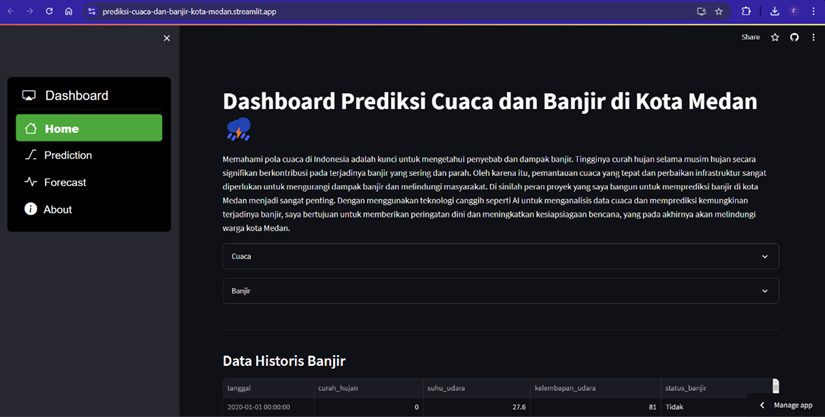